In [1]:
from replica_processor import *

Welcome to JupyROOT 6.24/06


# x_train_df2

In [2]:
df = pd.read_csv('x_train_df2.csv', dtype={'x':'int8','y':'int8','ftag_id':'int8','occ':'float32','hist_type':'int8','hist_id':'int16','quality':'int8','occ_0to1':'float32','occ_zscore':'float32','occ_robust':'float32'})
df

paths   x   y     occ  \
0         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   0     0.0   
1         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   1     0.0   
2         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   2  2454.0   
3         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   3     0.0   
4         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   4     0.0   
...                                                     ...  ..  ..     ...   
27593275  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  60     0.0   
27593276  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  61     0.0   
27593277  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  62     0.0   
27593278  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  63    78.0   
27593279  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  64     0.0   

          ftag_id  hist_type  hist_id  quality  occ_0to1  occ_zscore  \
0               0          2        2        0  0.000000   -0.163700   
1               0          2        2        0  0.000000   -0.163700   
2               0          2        2        1  0.032756   -0.161290   
3               0          2        2        0  0.000000   -0.163700   
4               0          2        2        0  0.000000   -0.163700   
...           ...        ...      ...      ...       ...         ...   
27593275       84         17      233        0  0.000000   -0.090706   
27593276       84         17      233        0  0.000000   -0.090706   
27593277       84         17      233        0  0.000000   -0.090706   
27593278       84         17      233        1  0.006434   -0.090692   
27593279       84         17      233        0  0.000000   -0.090706   

          occ_robust  
0          -0.449285  
1          -0.449285  
2           0.021687  
3          -0.449285  
4          -0.449285  
...              ...  
27593275   -0.170740  
27593276   -0.170740  
27593277   -0.170740  
27593278    0.036157  
27593279   -0.170740  

[27593280 rows x 11 columns]

In [41]:
len(df['ftag_id'].unique())

83

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27593280 entries, 0 to 27593279
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   paths       object 
 1   x           int8   
 2   y           int8   
 3   occ         float32
 4   ftag_id     int8   
 5   hist_type   int8   
 6   hist_id     int16  
 7   quality     int8   
 8   occ_0to1    float32
 9   occ_zscore  float32
 10  occ_robust  float32
dtypes: float32(4), int16(1), int8(5), object(1)
memory usage: 815.8+ MB


In [4]:
df.describe()

x             y           occ       ftag_id     hist_type  \
count  2.759328e+07  2.759328e+07  2.759328e+07  2.759328e+07  2.759328e+07   
mean   4.900000e+01  3.200000e+01  3.513458e+05  6.003521e+01  8.570196e+00   
std    2.857738e+01  1.876166e+01  4.777640e+06  2.248246e+01  5.219949e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.400000e+01  1.600000e+01  1.814348e+00  5.100000e+01  4.000000e+00   
50%    4.900000e+01  3.200000e+01  5.624604e+01  6.200000e+01  9.000000e+00   
75%    7.400000e+01  4.800000e+01  4.299000e+03  7.800000e+01  1.300000e+01   
max    9.800000e+01  6.400000e+01  9.518093e+08  9.000000e+01  1.700000e+01   

            hist_id       quality      occ_0to1    occ_zscore    occ_robust  
count  2.759328e+07  2.759328e+07  2.759328e+07  2.759328e+07  2.703155e+07  
mean   8.902029e+01  2.207865e-01  1.976098e-01 -1.336704e-03           inf  
std    8.470341e+01  4.147768e-01  2.963107e-01  9.745470e-01           NaN  
min    0.000000e+00  0.000000e+00  0.000000e+00 -3.010843e-01 -2.174239e+01  
25%    2.000000e+01  0.000000e+00  4.572837e-04 -9.176583e-02 -1.919782e-01  
50%    6.300000e+01  0.000000e+00  2.227067e-02 -8.214516e-02  0.000000e+00  
75%    1.350000e+02  0.000000e+00  3.032966e-01 -7.413140e-02  6.144496e-01  
max    4.130000e+02  1.000000e+00  1.000000e+00  1.453943e+02           inf

seems to be an issue with robust, at least on the dataset level...what about the histogram level?

In [26]:
def input_heatmap(df,ftag_id,hist_id):
    tmp = df[df['ftag_id']==ftag_id]
    tmp = tmp[tmp['hist_id']==hist_id]
    sns.heatmap( tmp.pivot_table(index='y',columns='x',values='occ') )

<IPython.core.display.Javascript object>

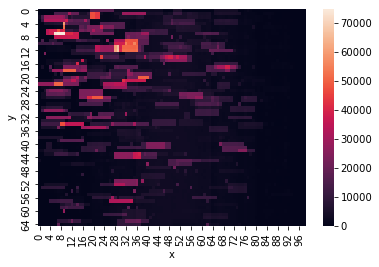

In [8]:
input_heatmap(df,0,2)

In [6]:
tmp = df[df['ftag_id']==0]
tmp = tmp[tmp['hist_id']==2]
tmp.describe()

x            y           occ  ftag_id  hist_type  hist_id  \
count  6435.000000  6435.000000   6435.000000   6435.0     6435.0   6435.0   
mean     49.000000    32.000000   5438.001953      0.0        2.0      2.0   
std      28.579601    18.763121   8609.872070      0.0        0.0      0.0   
min       0.000000     0.000000      0.000000      0.0        2.0      2.0   
25%      24.000000    16.000000    623.000000      0.0        2.0      2.0   
50%      49.000000    32.000000   2341.000000      0.0        2.0      2.0   
75%      74.000000    48.000000   5833.500000      0.0        2.0      2.0   
max      98.000000    64.000000  74917.000000      0.0        2.0      2.0   

           quality     occ_0to1   occ_zscore   occ_robust  
count  6435.000000  6435.000000  6435.000000  6435.000000  
mean      0.457498     0.072587    -0.158358     0.594377  
std       0.498229     0.114925     0.008458     1.652408  
min       0.000000     0.000000    -0.163700    -0.449285  
25%       0.000000     0.008316    -0.163088    -0.329719  
50%       0.000000     0.031248    -0.161401     0.000000  
75%       1.000000     0.077866    -0.157970     0.670281  
max       1.000000     1.000000    -0.090102    13.928798

robust looks better now. although it probably didnt turn out correctly based on presvious

In [10]:
for col in df.columns:
    if col!='paths':
        print('Column:',col)
        display(df[col].value_counts())

Column: x


0     278720
74    278720
72    278720
71    278720
70    278720
       ...  
30    278720
29    278720
28    278720
27    278720
98    278720
Name: x, Length: 99, dtype: int64

Column: y


0     424512
33    424512
35    424512
36    424512
37    424512
       ...  
27    424512
28    424512
29    424512
30    424512
64    424512
Name: y, Length: 65, dtype: int64

Column: occ


0.000000     6507550
1.000000       75347
2.000000       43611
3.000000       33563
4.000000       27351
              ...   
50.365597          1
82.713181          1
28.764223          1
29.646978          1
3.809722           1
Name: occ, Length: 10094572, dtype: int64

Column: ftag_id


82    1782495
62    1550835
80    1396395
57    1241955
74    1010295
       ...   
64      77220
20      77220
67      77220
42      77220
19      77220
Name: ftag_id, Length: 83, dtype: int64

Column: hist_type


15    1634490
9     1608750
17    1602315
16    1595880
5     1537965
1     1537965
2     1537965
3     1531530
11    1531530
7     1525095
13    1525095
14    1525095
8     1518660
0     1518660
12    1480050
4     1467180
10    1460745
6     1454310
Name: hist_type, dtype: int64

Column: hist_id


1      392535
0      386100
14     386100
17     379665
6      373230
        ...  
361      6435
362      6435
364      6435
365      6435
413      6435
Name: hist_id, Length: 393, dtype: int64

Column: quality


0    21501056
1     6092224
Name: quality, dtype: int64

Column: occ_0to1


0.000000    6507550
0.333333       6303
0.250000       5261
1.000000       5203
0.111111       5107
             ...   
0.059074          1
0.001568          1
0.008682          1
0.501242          1
0.020197          1
Name: occ_0to1, Length: 15271693, dtype: int64

Column: occ_zscore


-0.086135    363983
-0.078523    341904
-0.082145    309706
-0.083331    263887
-0.080196    219826
              ...  
-0.219124         1
-0.075804         1
 0.282699         1
-0.090998         1
 1.173792         1
Name: occ_zscore, Length: 5142385, dtype: int64

Column: occ_robust


 0.000000     339018
 1.000000      23611
 inf           17423
 0.500000      11453
-0.957336       9333
               ...  
 14.317623         1
-0.285570          1
 0.449422          1
 0.011780          1
-0.190719          1
Name: occ_robust, Length: 16153905, dtype: int64

<IPython.core.display.Javascript object>

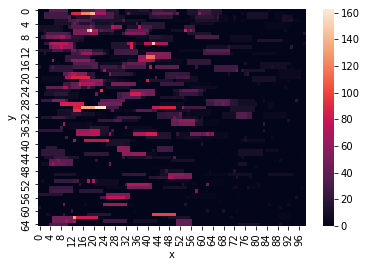

In [11]:
input_heatmap(df,7,9)

In [12]:
# How many histograms do we have that are invalid (all occ values are 0 as in above heatmap) for the test set
cnt=0
for ftag in df['ftag_id'].unique():
    tmp = df[df['ftag_id']==ftag]
    for histid in tmp[tmp['ftag_id']==ftag]['hist_id'].unique():
        tmp2 = tmp[tmp['hist_id']==histid]
        if len(tmp2['occ'].value_counts().values)==1:
            cnt+=1
cnt

69

These are a problem. They have been identified, they just need to be separated histwise from the main dataset.

In [13]:
# 110 to remove, from these hists
# How many histograms do we have that are invalid (all occ values are 0) for the test set
cnt=0
for ftag in df['ftag_id'].unique():
    tmp = df[df['ftag_id']==ftag]
    for histid in tmp[tmp['ftag_id']==ftag]['hist_id'].unique():
        cnt+=1
cnt

4288

4288-69=4219 hists for the training set

In [15]:
tmp

paths   x   y   occ  \
26582985  run_359872/CaloMonitoring/ClusterMon/CaloCalTo...   0   0   0.0   
26582986  run_359872/CaloMonitoring/ClusterMon/CaloCalTo...   0   1   0.0   
26582987  run_359872/CaloMonitoring/ClusterMon/CaloCalTo...   0   2   0.0   
26582988  run_359872/CaloMonitoring/ClusterMon/CaloCalTo...   0   3   0.0   
26582989  run_359872/CaloMonitoring/ClusterMon/CaloCalTo...   0   4   0.0   
...                                                     ...  ..  ..   ...   
27593275  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  60   0.0   
27593276  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  61   0.0   
27593277  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  62   0.0   
27593278  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  63  78.0   
27593279  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  64   0.0   

          ftag_id  hist_type  hist_id  quality  occ_0to1  occ_zscore  \
26582985       84          0        0        0  0.000000   -0.090706   
26582986       84          0        0        0  0.000000   -0.090706   
26582987       84          0        0        0  0.000000   -0.090706   
26582988       84          0        0        0  0.000000   -0.090706   
26582989       84          0        0        0  0.000000   -0.090706   
...           ...        ...      ...      ...       ...         ...   
27593275       84         17      233        0  0.000000   -0.090706   
27593276       84         17      233        0  0.000000   -0.090706   
27593277       84         17      233        0  0.000000   -0.090706   
27593278       84         17      233        1  0.006434   -0.090692   
27593279       84         17      233        0  0.000000   -0.090706   

          occ_robust  
26582985   -0.519885  
26582986   -0.519885  
26582987   -0.519885  
26582988   -0.519885  
26582989   -0.519885  
...              ...  
27593275   -0.170740  
27593276   -0.170740  
27593277   -0.170740  
27593278    0.036157  
27593279   -0.170740  

[1010295 rows x 11 columns]

<IPython.core.display.Javascript object>

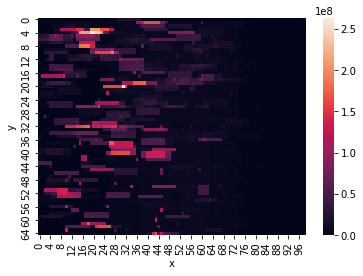

In [25]:
input_heatmap(tmp,84,0)

In [7]:
tmp = df[df['ftag_id']==0]
tmp = tmp[tmp['hist_id']==2]
tmp.describe()

x            y           occ  ftag_id  hist_type  hist_id  \
count  6435.000000  6435.000000   6435.000000   6435.0     6435.0   6435.0   
mean     49.000000    32.000000   5438.001953      0.0        2.0      2.0   
std      28.579601    18.763121   8609.872070      0.0        0.0      0.0   
min       0.000000     0.000000      0.000000      0.0        2.0      2.0   
25%      24.000000    16.000000    623.000000      0.0        2.0      2.0   
50%      49.000000    32.000000   2341.000000      0.0        2.0      2.0   
75%      74.000000    48.000000   5833.500000      0.0        2.0      2.0   
max      98.000000    64.000000  74917.000000      0.0        2.0      2.0   

           quality     occ_0to1   occ_zscore   occ_robust  
count  6435.000000  6435.000000  6435.000000  6435.000000  
mean      0.457498     0.072587    -0.158358     0.594377  
std       0.498229     0.114925     0.008458     1.652408  
min       0.000000     0.000000    -0.163700    -0.449285  
25%       0.000000     0.008316    -0.163088    -0.329719  
50%       0.000000     0.031248    -0.161401     0.000000  
75%       1.000000     0.077866    -0.157970     0.670281  
max       1.000000     1.000000    -0.090102    13.928798

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='x', ylabel='y'>

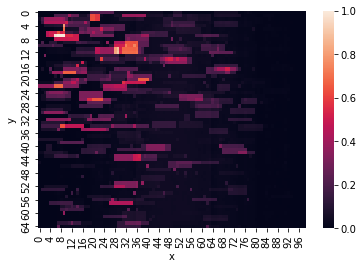

In [8]:
sns.heatmap( tmp.pivot_table(index='y',columns='x',values='occ_0to1'))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='x', ylabel='y'>

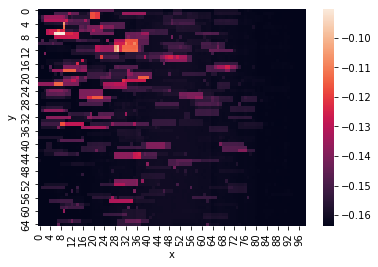

In [9]:
sns.heatmap( tmp.pivot_table(index='y',columns='x',values='occ_zscore'))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='x', ylabel='y'>

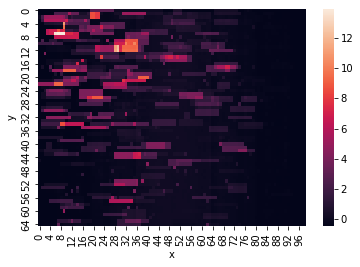

In [10]:
sns.heatmap( tmp.pivot_table(index='y',columns='x',values='occ_robust'))

strip 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

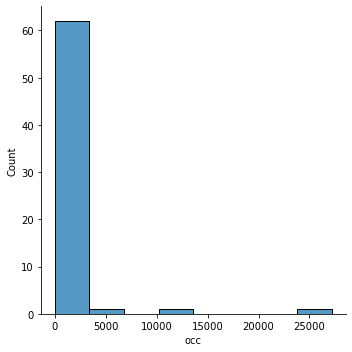

strip 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

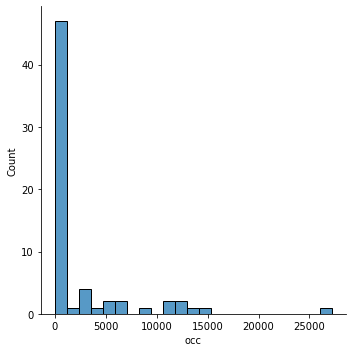

strip 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

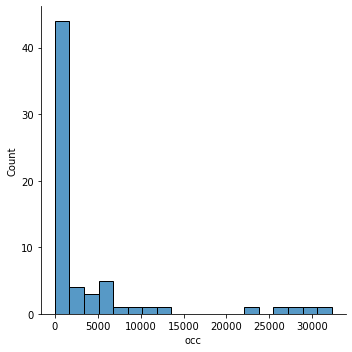

strip 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

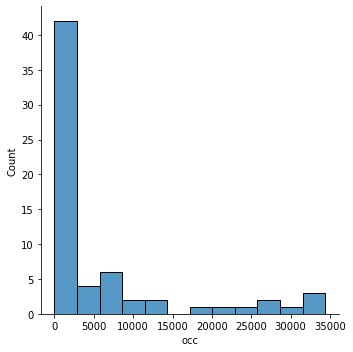

strip 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

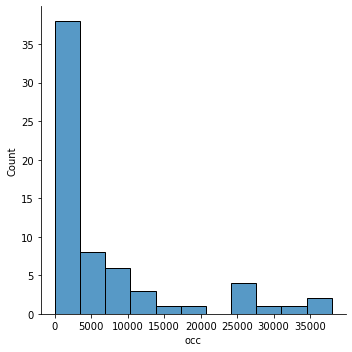

strip 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

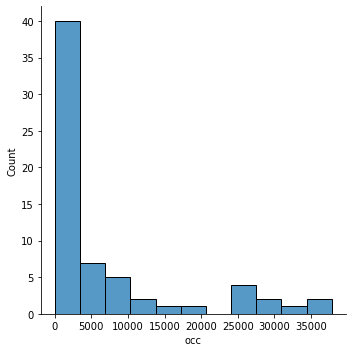

strip 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

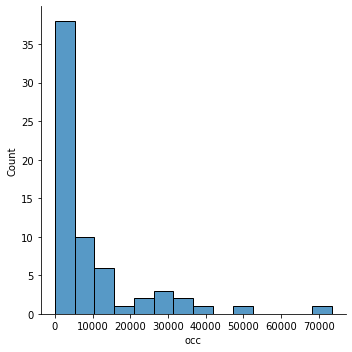

strip 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

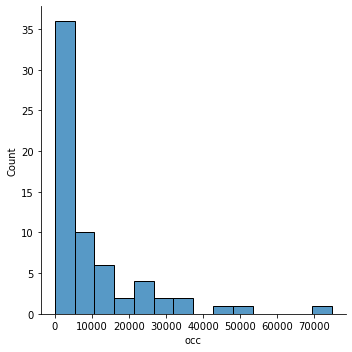

strip 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

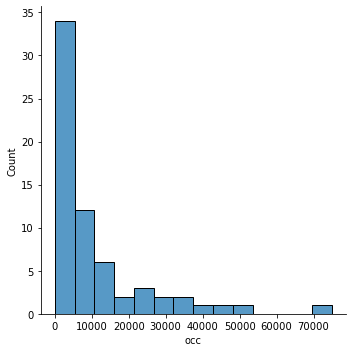

strip 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

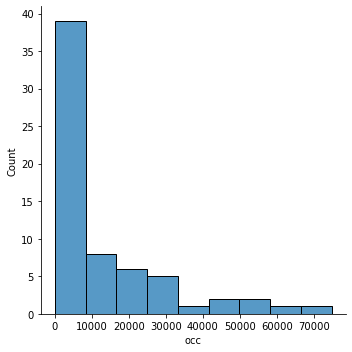

strip 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

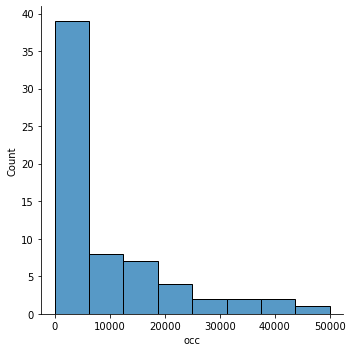

strip 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

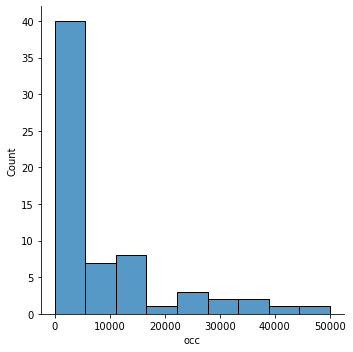

strip 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

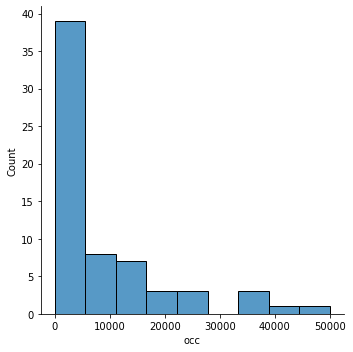

strip 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

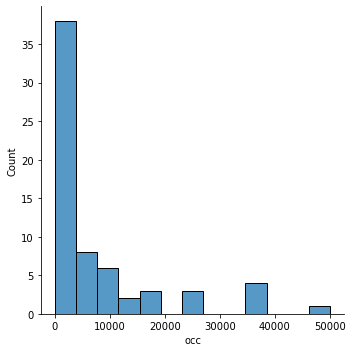

strip 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

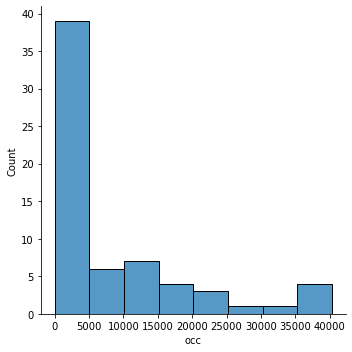

strip 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

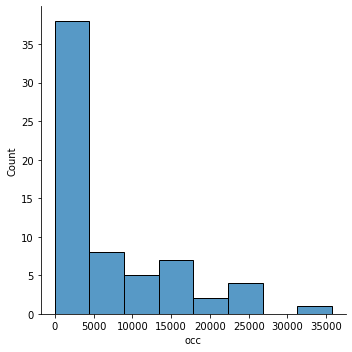

strip 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

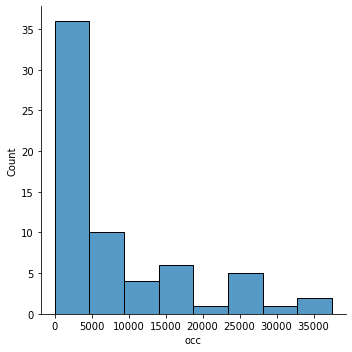

strip 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

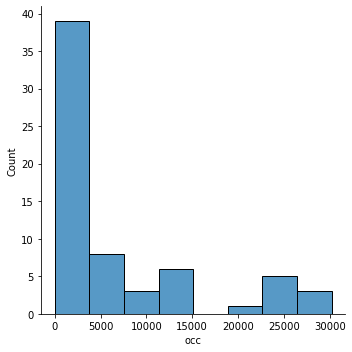

strip 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

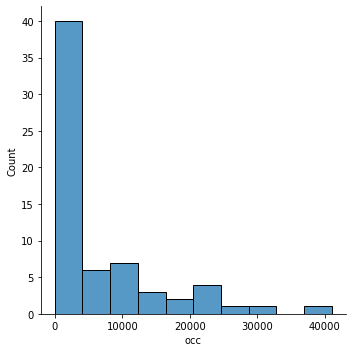

strip 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

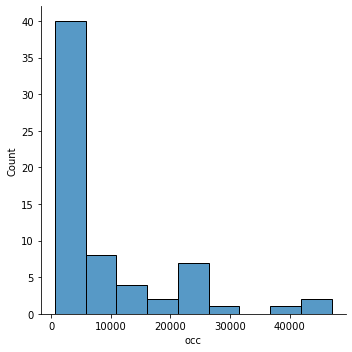

strip 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

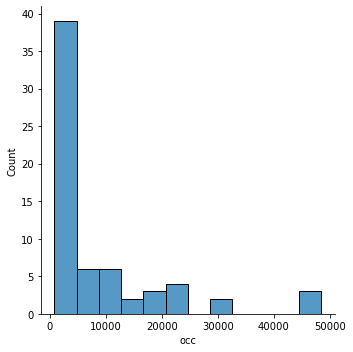

strip 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

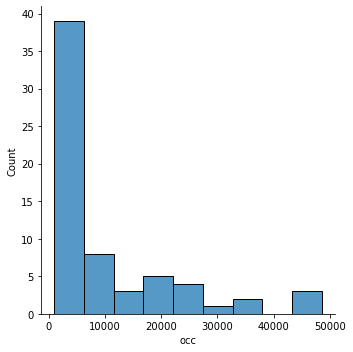

strip 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

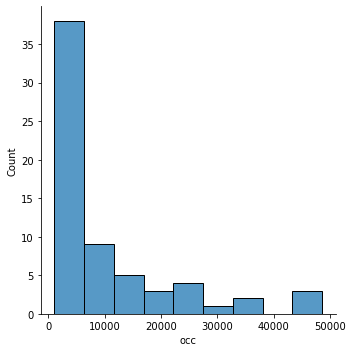

strip 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

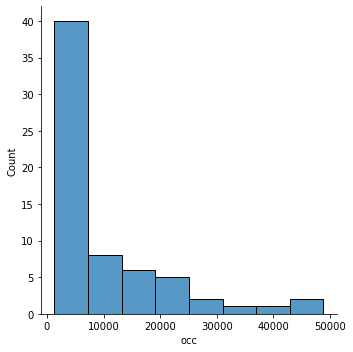

strip 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

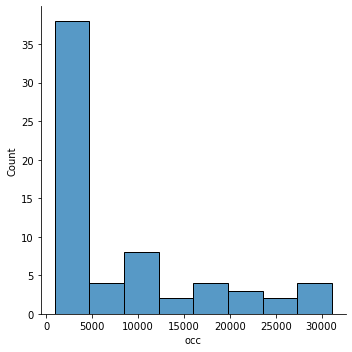

strip 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

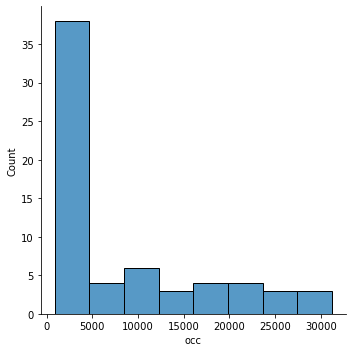

strip 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

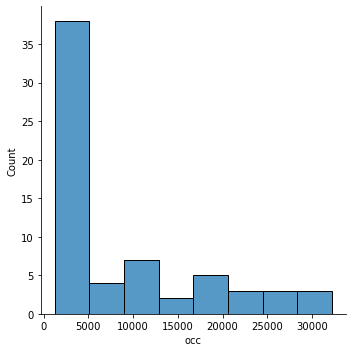

strip 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

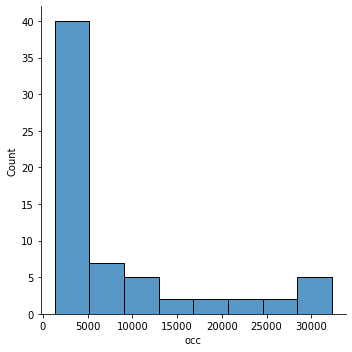

strip 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

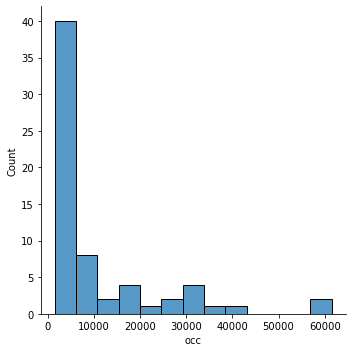

strip 29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

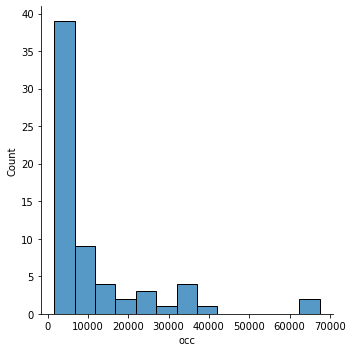

strip 30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

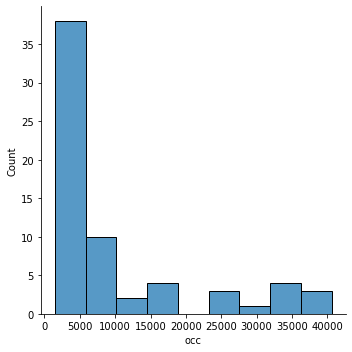

strip 31


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

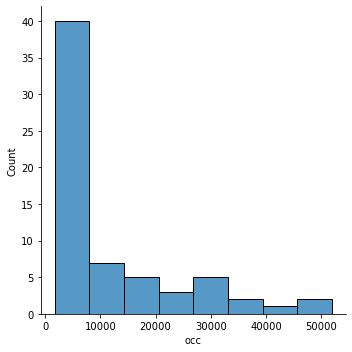

strip 32


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

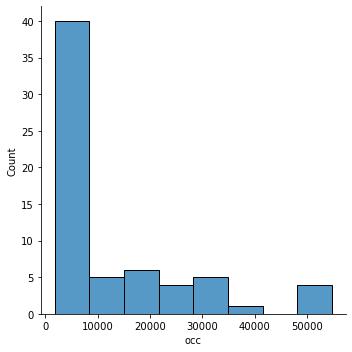

strip 33


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

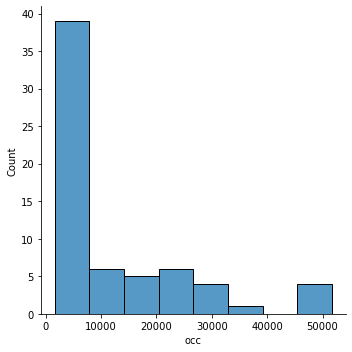

strip 34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

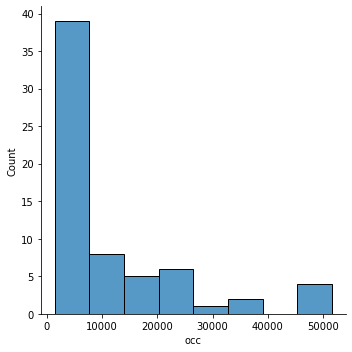

strip 35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

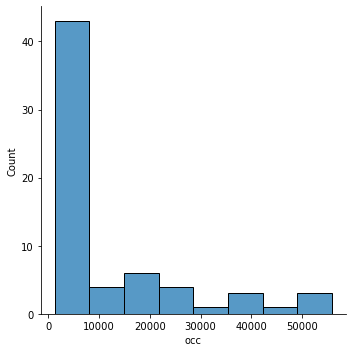

strip 36


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

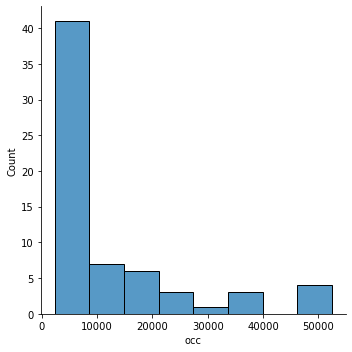

strip 37


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

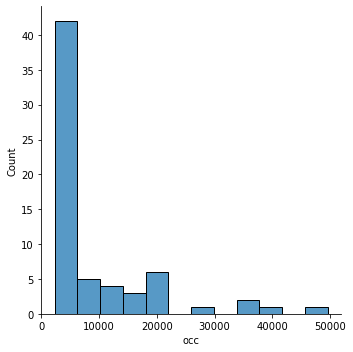

strip 38


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

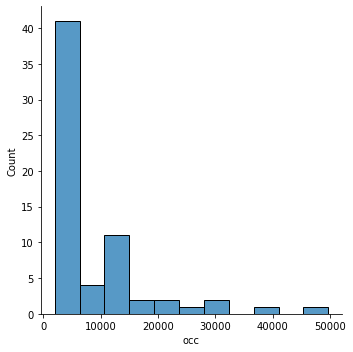

strip 39


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

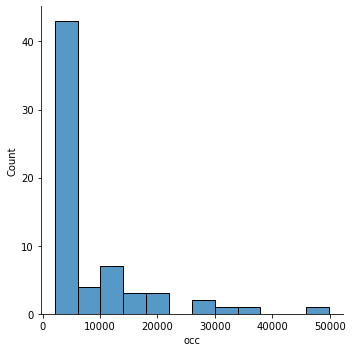

strip 40


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

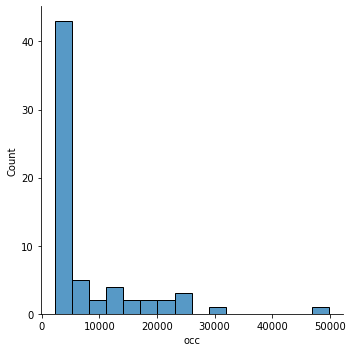

strip 41


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

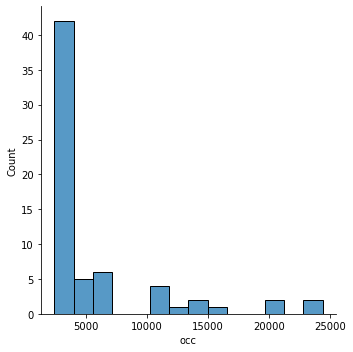

strip 42


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

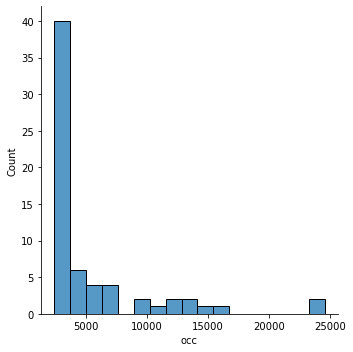

strip 43


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

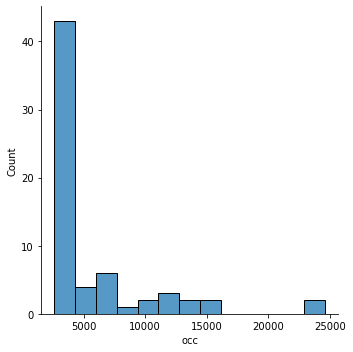

strip 44


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

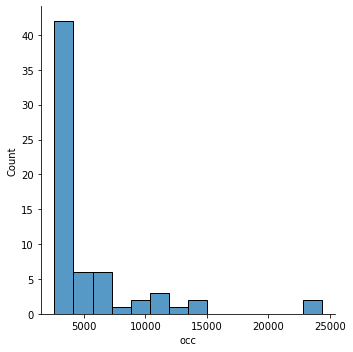

strip 45


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

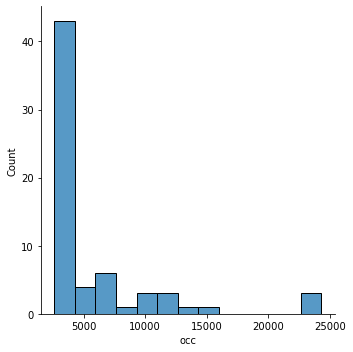

strip 46


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

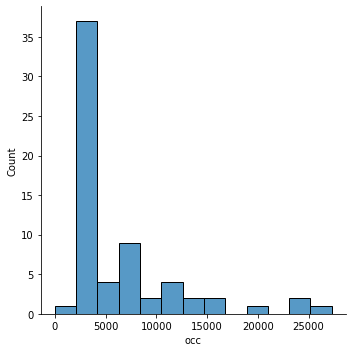

strip 47


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

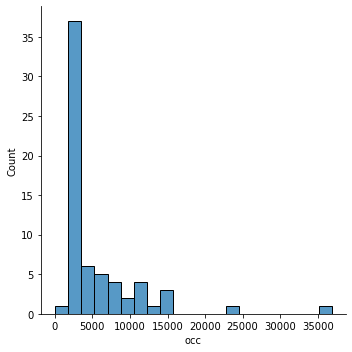

strip 48


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

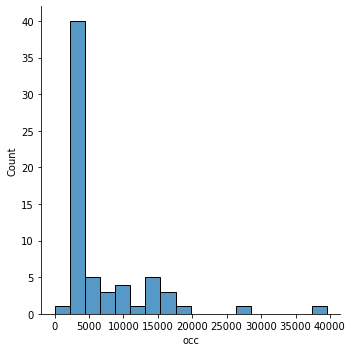

strip 49


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

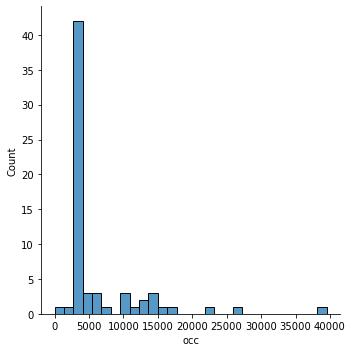

strip 50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

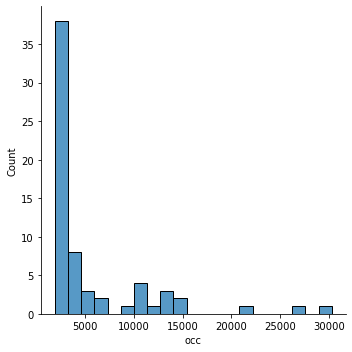

strip 51


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

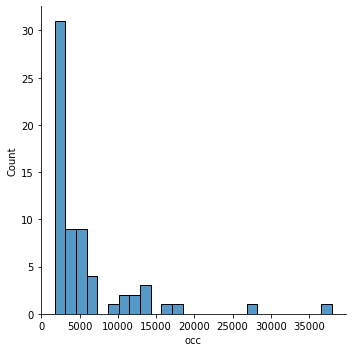

strip 52


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

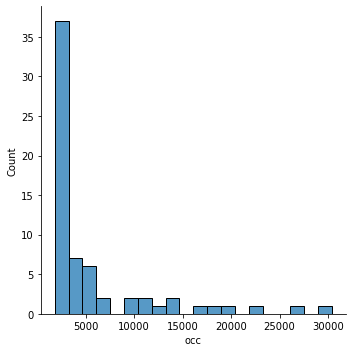

strip 53


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

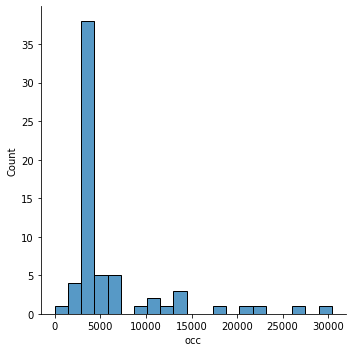

strip 54


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

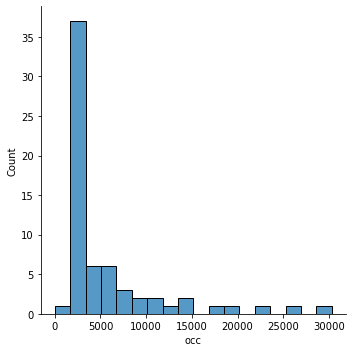

strip 55


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

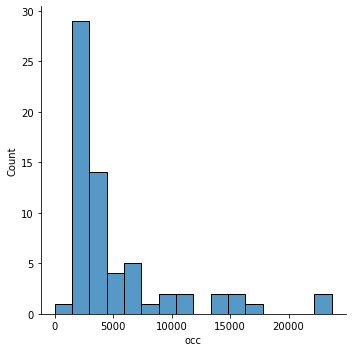

strip 56


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

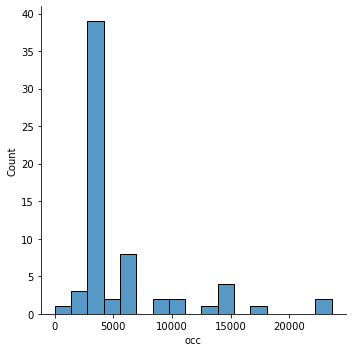

strip 57


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

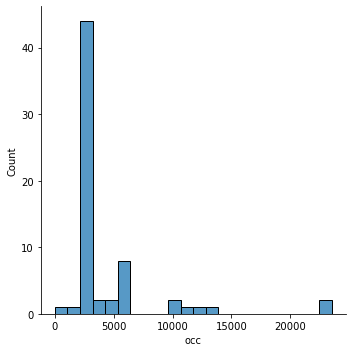

strip 58


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

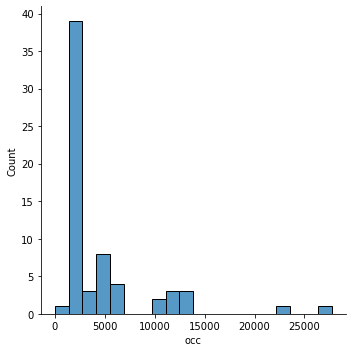

strip 59


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

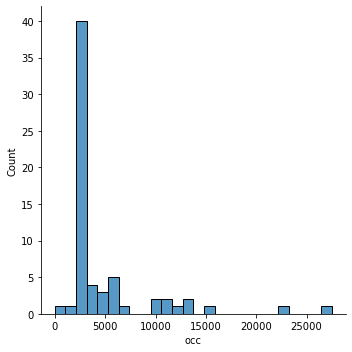

strip 60


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

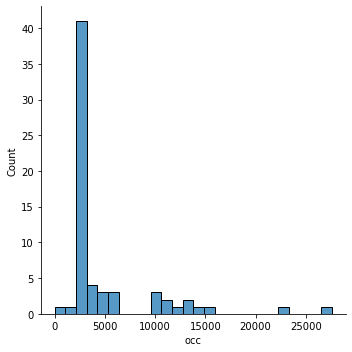

strip 61


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

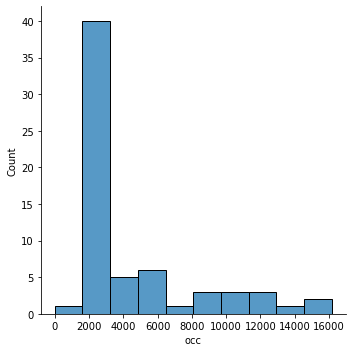

strip 62


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

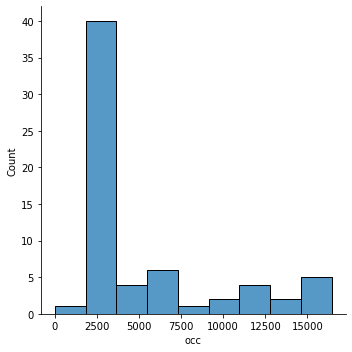

strip 63


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

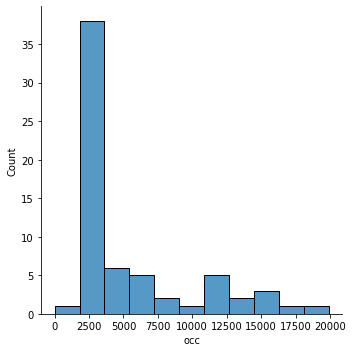

strip 64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

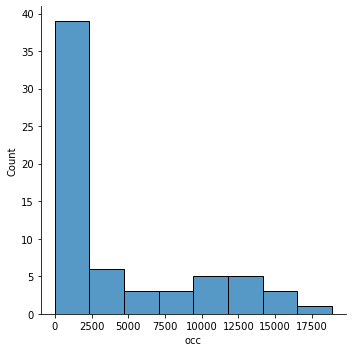

strip 65


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

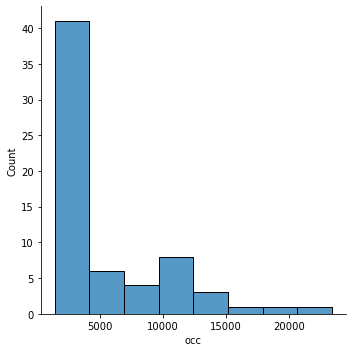

strip 66


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

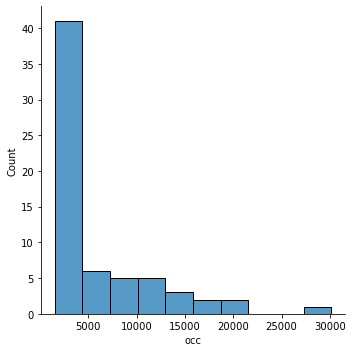

strip 67


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

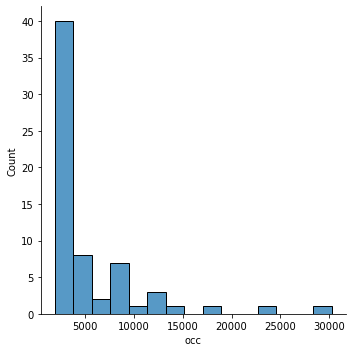

strip 68


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

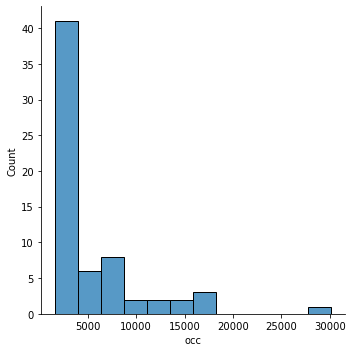

strip 69


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

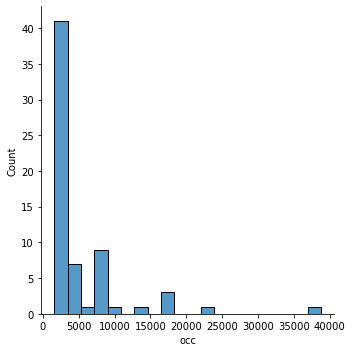

strip 70


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

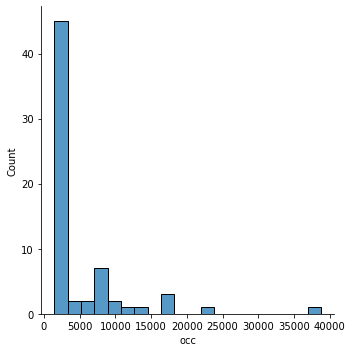

strip 71


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

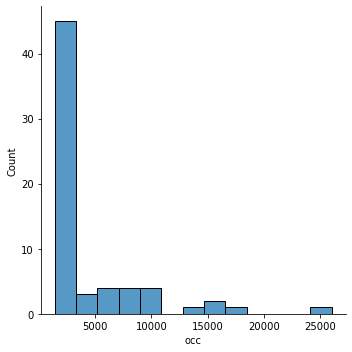

strip 72


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

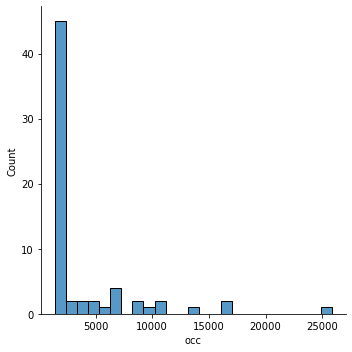

strip 73


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

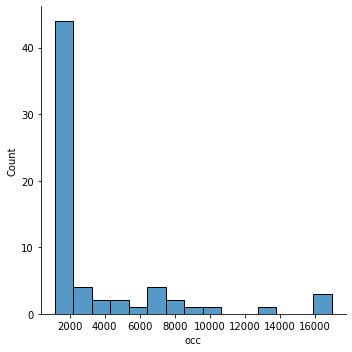

strip 74


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

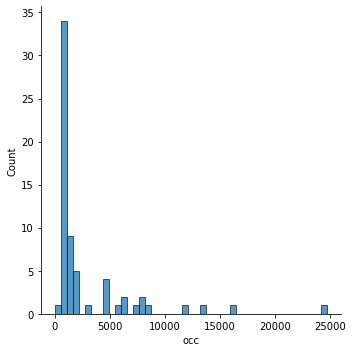

strip 75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

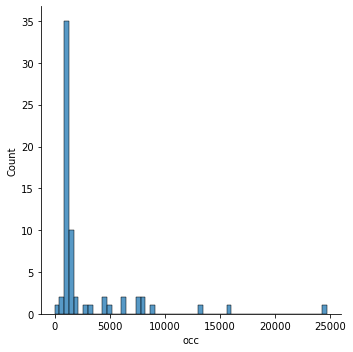

strip 76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

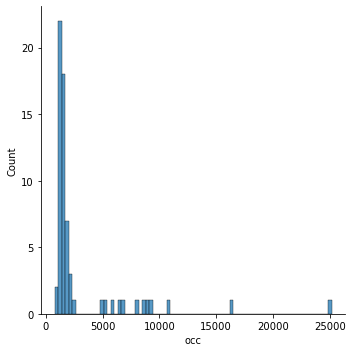

strip 77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

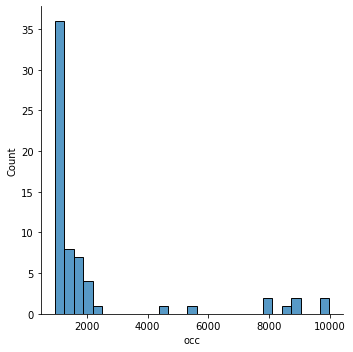

strip 78


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

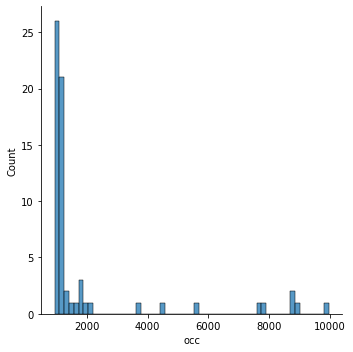

strip 79


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

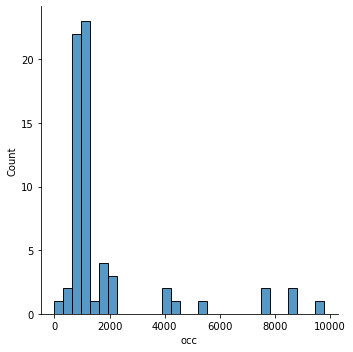

strip 80


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

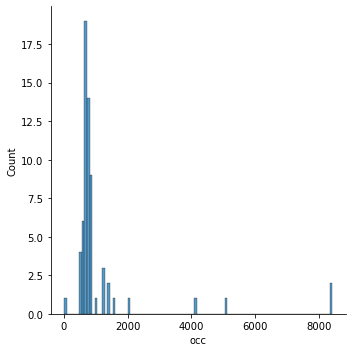

strip 81


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

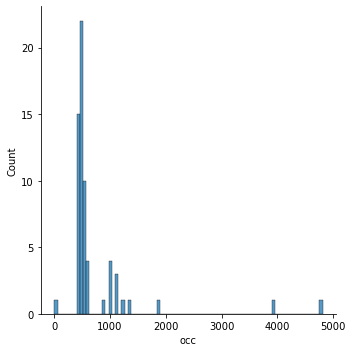

strip 82


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

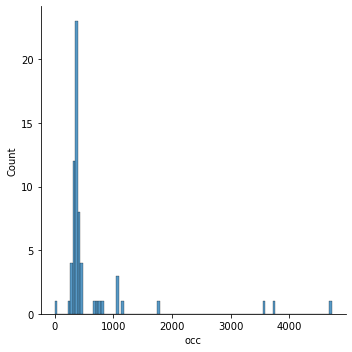

strip 83


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

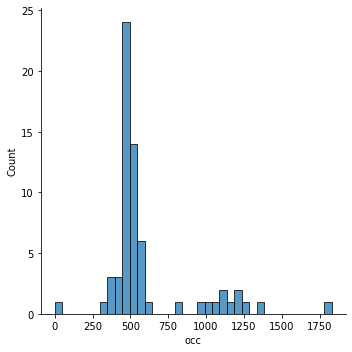

strip 84


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

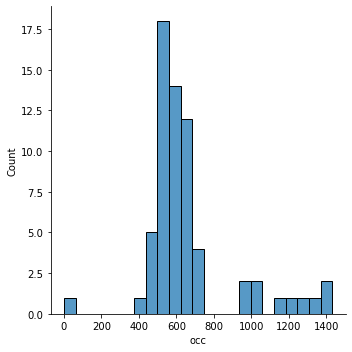

strip 85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

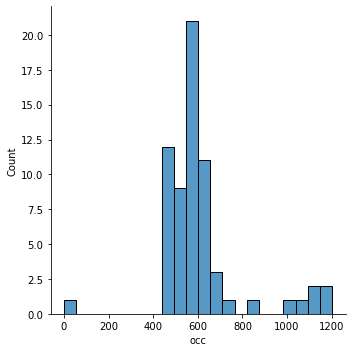

strip 86


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

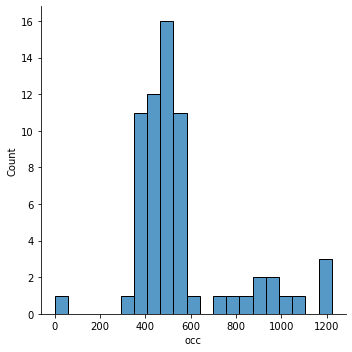

strip 87


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

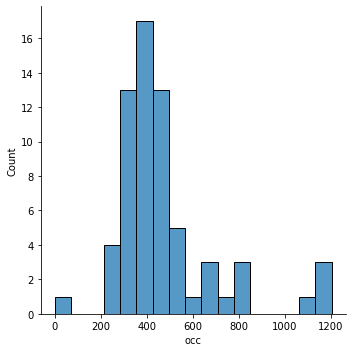

strip 88


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

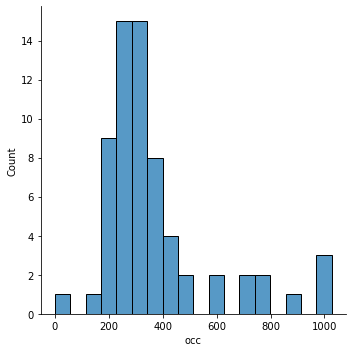

strip 89


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

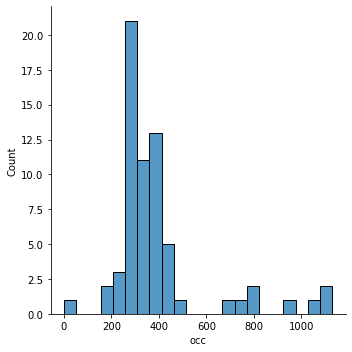

strip 90


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

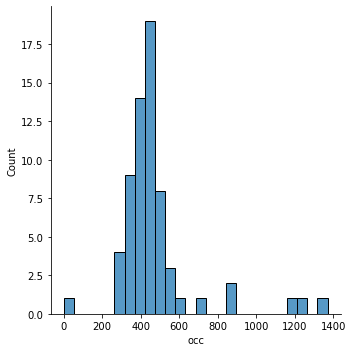

strip 91


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

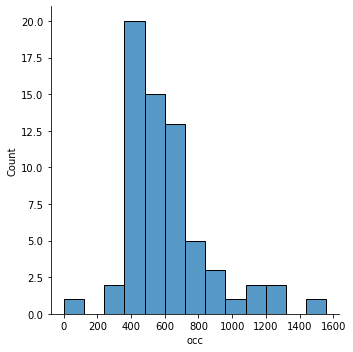

strip 92


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

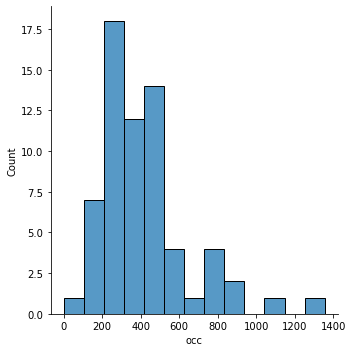

strip 93


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

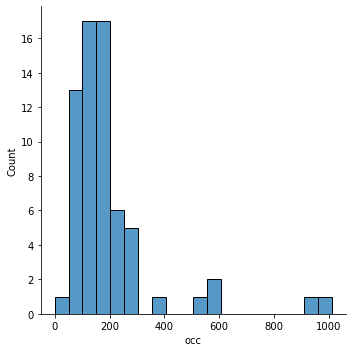

strip 94


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

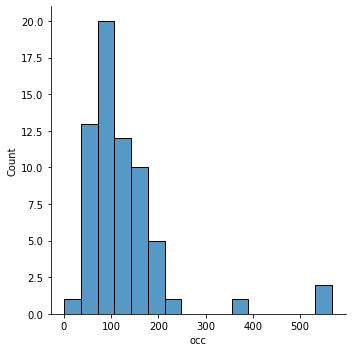

strip 95


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

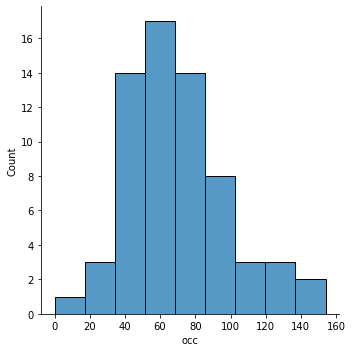

strip 96


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

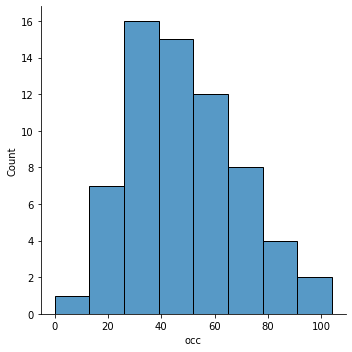

strip 97


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

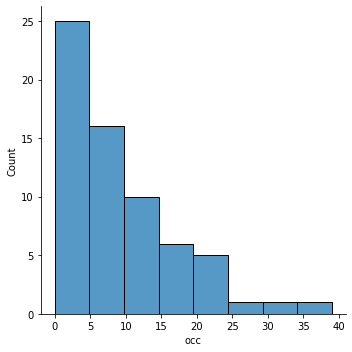

strip 98


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

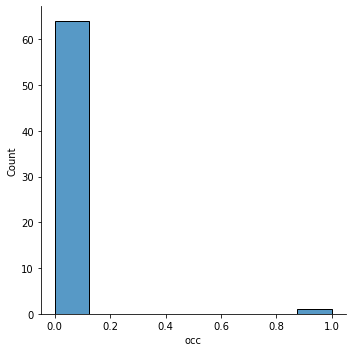

In [11]:
for x in range(99):
    print('strip',x)
    sns.displot(tmp[tmp['x']==x]['occ'])
    plt.show()

0 0


<IPython.core.display.Javascript object>

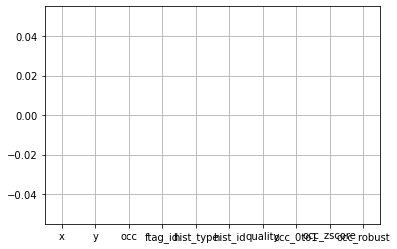

0 1


<IPython.core.display.Javascript object>

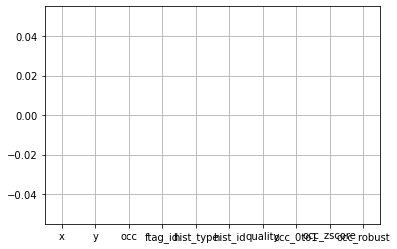

0 2


<IPython.core.display.Javascript object>

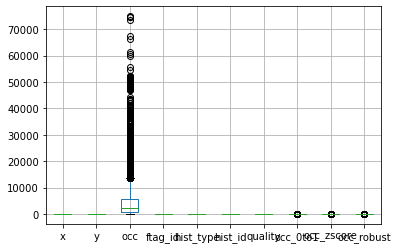

0 3


<IPython.core.display.Javascript object>

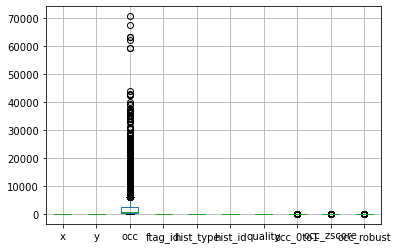

0 4


<IPython.core.display.Javascript object>

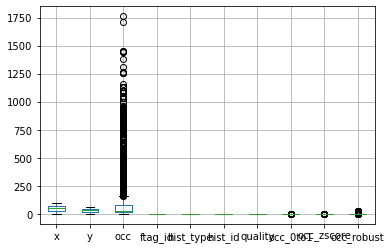

0 5


<IPython.core.display.Javascript object>

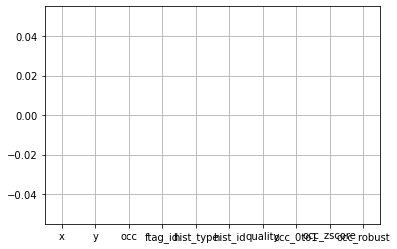

0 6


<IPython.core.display.Javascript object>

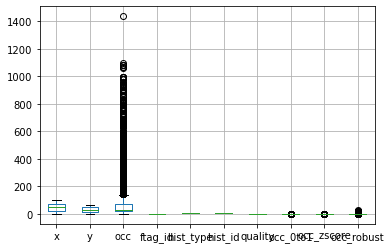

0 7


<IPython.core.display.Javascript object>

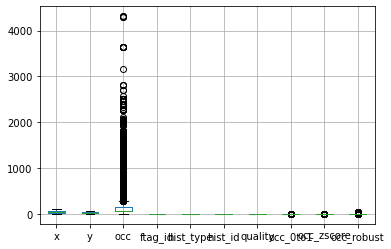

0 8


<IPython.core.display.Javascript object>

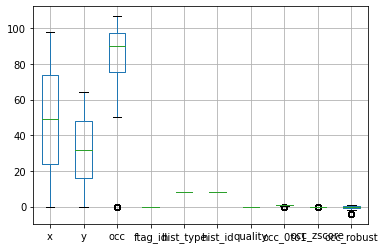

0 9


<IPython.core.display.Javascript object>

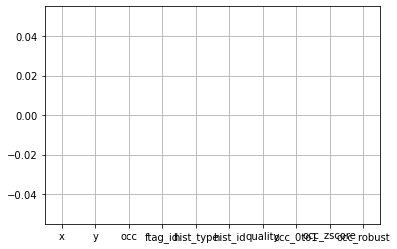

0 10


<IPython.core.display.Javascript object>

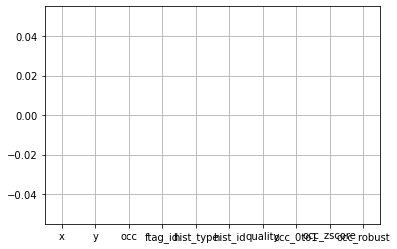

0 11


<IPython.core.display.Javascript object>

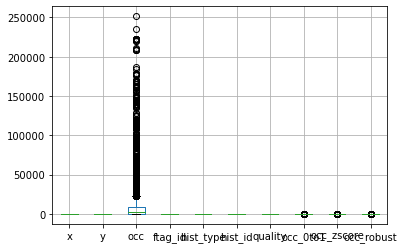

0 12


<IPython.core.display.Javascript object>

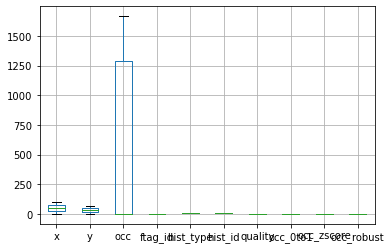

0 13


<IPython.core.display.Javascript object>

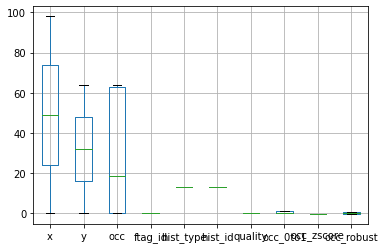

0 14


<IPython.core.display.Javascript object>

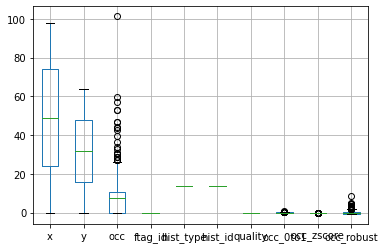

0 15


<IPython.core.display.Javascript object>

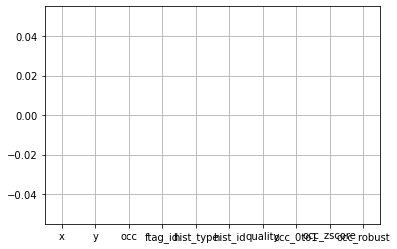

0 16


<IPython.core.display.Javascript object>

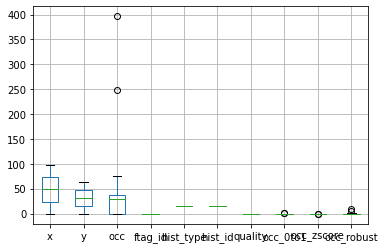

0 17


<IPython.core.display.Javascript object>

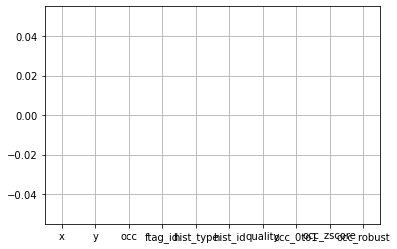

0 18


<IPython.core.display.Javascript object>

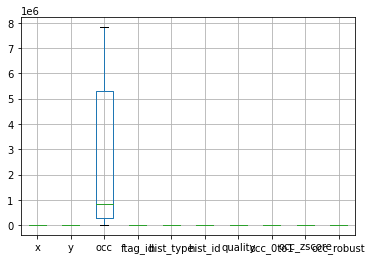

0 19


<IPython.core.display.Javascript object>

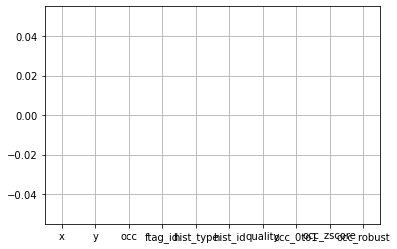

0 20


<IPython.core.display.Javascript object>

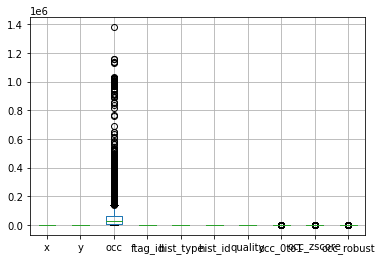

0 21


<IPython.core.display.Javascript object>

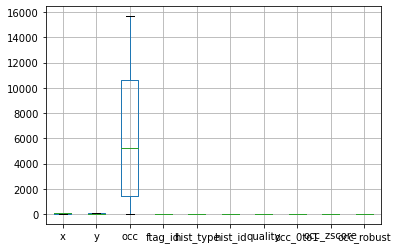

0 22


<IPython.core.display.Javascript object>

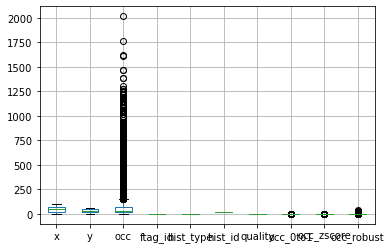

0 23


<IPython.core.display.Javascript object>

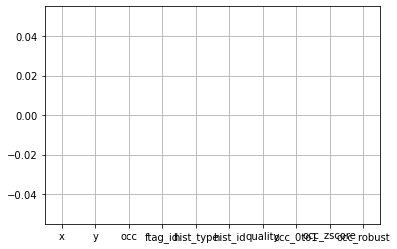

0 24


<IPython.core.display.Javascript object>

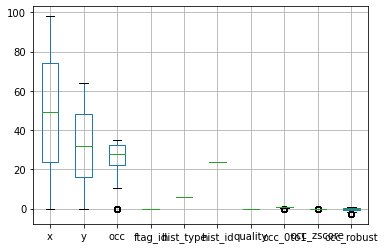

0 25


<IPython.core.display.Javascript object>

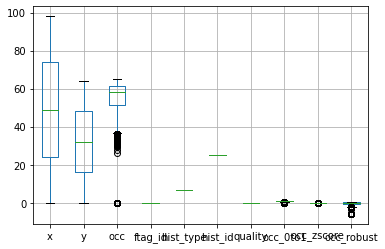

0 26


<IPython.core.display.Javascript object>

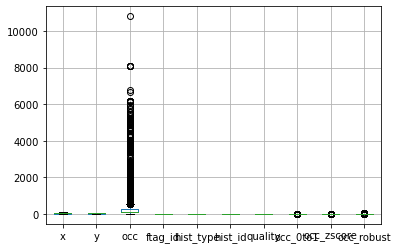

0 27


<IPython.core.display.Javascript object>

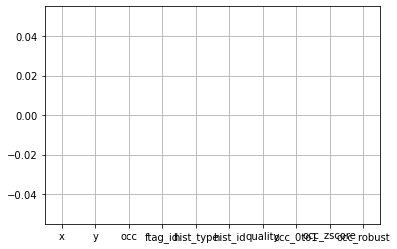

0 28


<IPython.core.display.Javascript object>

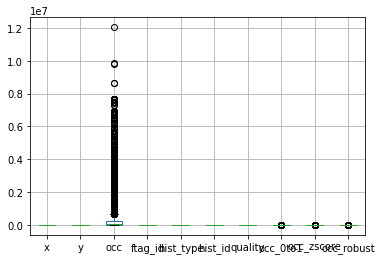

0 29


<IPython.core.display.Javascript object>

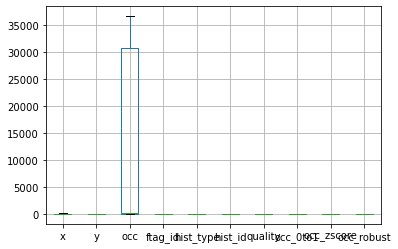

0 30


<IPython.core.display.Javascript object>

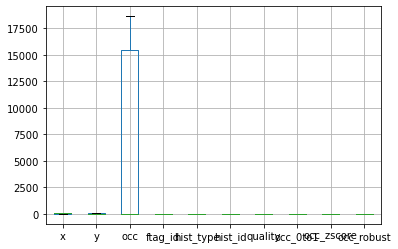

0 31


<IPython.core.display.Javascript object>

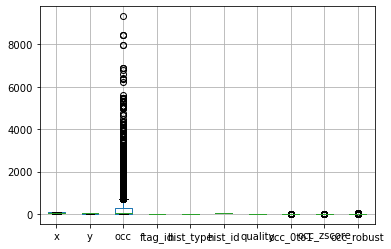

0 32


<IPython.core.display.Javascript object>

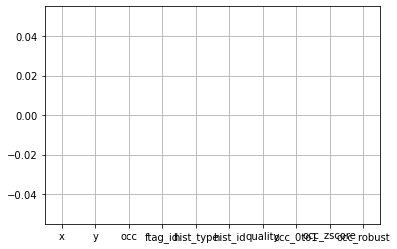

0 33


<IPython.core.display.Javascript object>

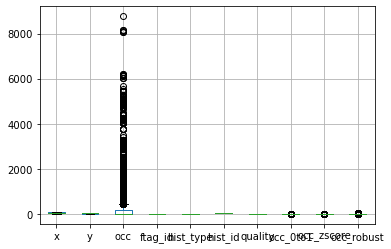

0 34


<IPython.core.display.Javascript object>

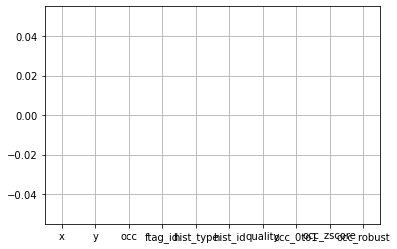

1 0


<IPython.core.display.Javascript object>

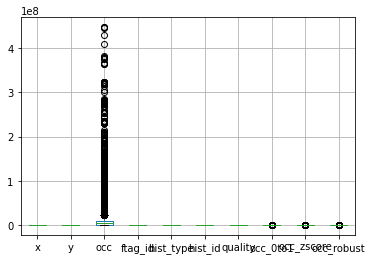

1 1


<IPython.core.display.Javascript object>

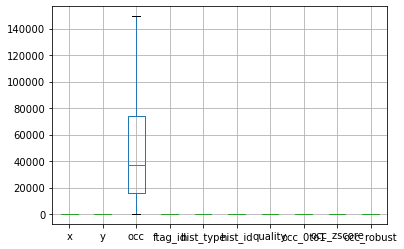

1 2


<IPython.core.display.Javascript object>

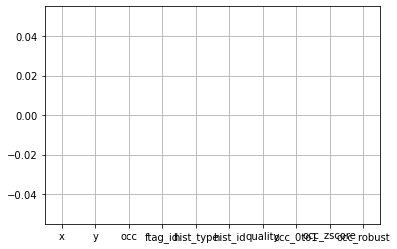

1 3


<IPython.core.display.Javascript object>

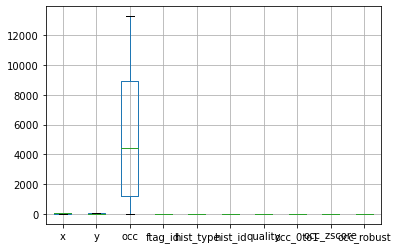

1 4


<IPython.core.display.Javascript object>

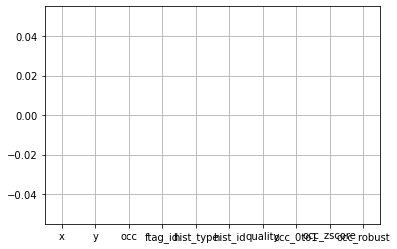

1 5


<IPython.core.display.Javascript object>

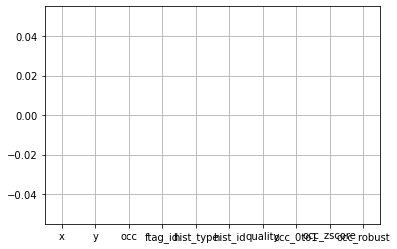

1 6


<IPython.core.display.Javascript object>

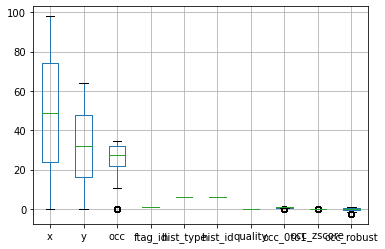

1 7


<IPython.core.display.Javascript object>

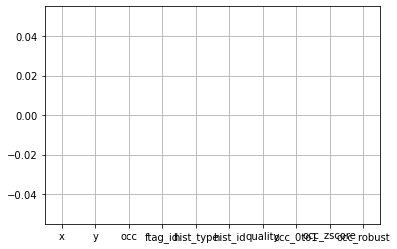

1 8


<IPython.core.display.Javascript object>

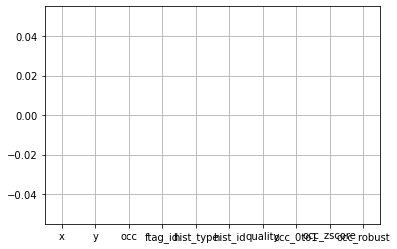

1 9


<IPython.core.display.Javascript object>

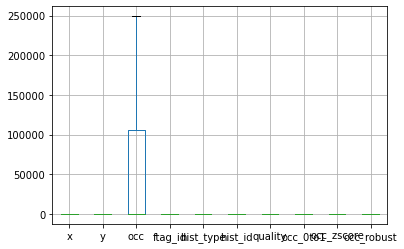

1 10


<IPython.core.display.Javascript object>

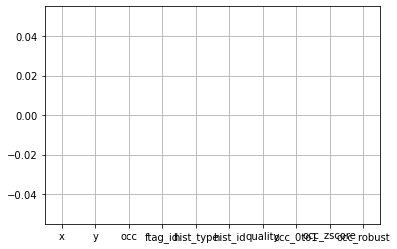

1 11


<IPython.core.display.Javascript object>

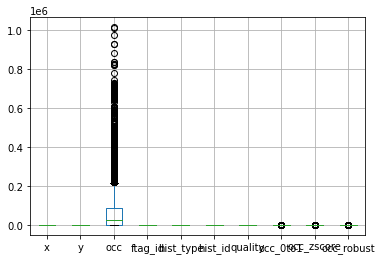

1 12


<IPython.core.display.Javascript object>

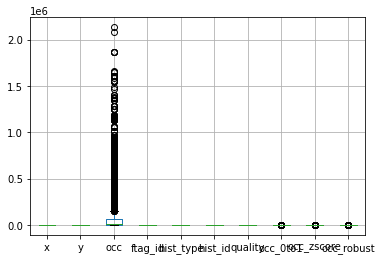

1 13


<IPython.core.display.Javascript object>

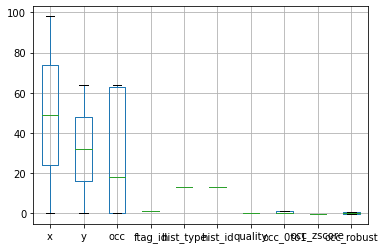

1 14


<IPython.core.display.Javascript object>

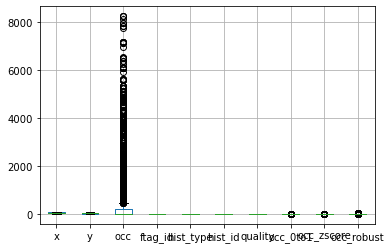

1 15


<IPython.core.display.Javascript object>

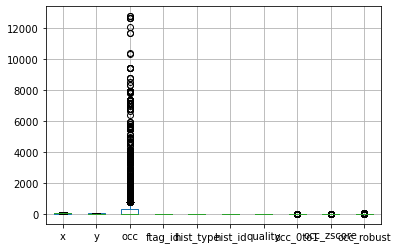

1 16


<IPython.core.display.Javascript object>

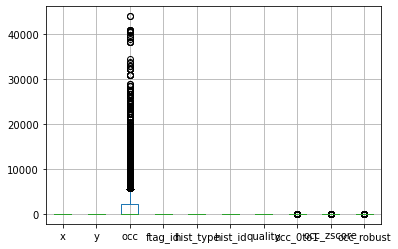

1 17


<IPython.core.display.Javascript object>

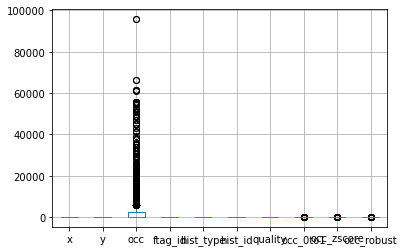

1 18


<IPython.core.display.Javascript object>

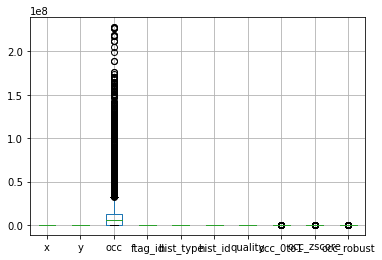

1 19


<IPython.core.display.Javascript object>

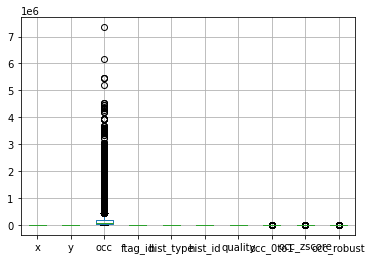

1 20


<IPython.core.display.Javascript object>

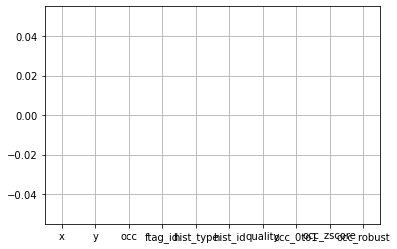

1 21


<IPython.core.display.Javascript object>

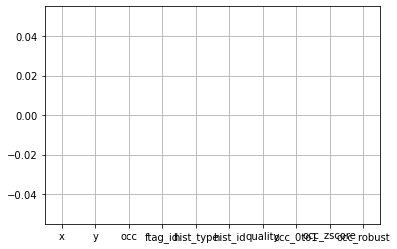

1 22


<IPython.core.display.Javascript object>

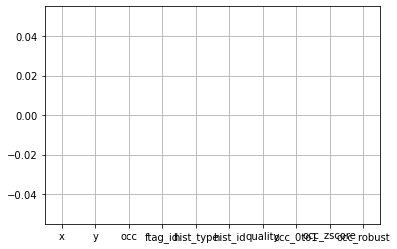

1 23


<IPython.core.display.Javascript object>

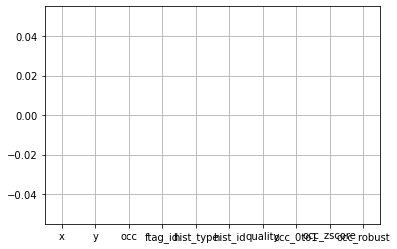

1 24


<IPython.core.display.Javascript object>

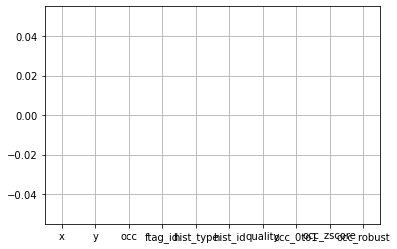

1 25


<IPython.core.display.Javascript object>

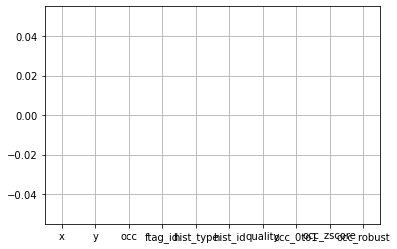

1 26


<IPython.core.display.Javascript object>

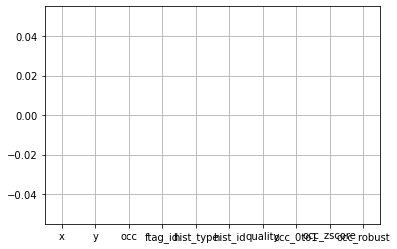

1 27


<IPython.core.display.Javascript object>

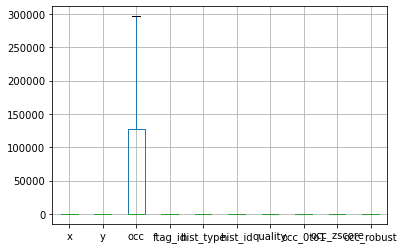

1 28


<IPython.core.display.Javascript object>

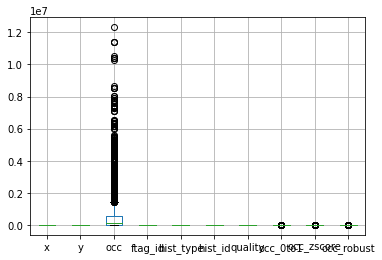

1 29


<IPython.core.display.Javascript object>

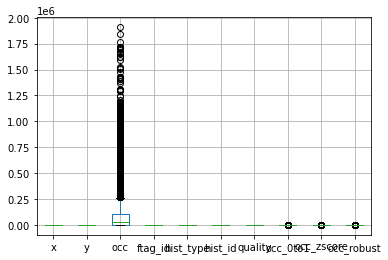

1 30


<IPython.core.display.Javascript object>

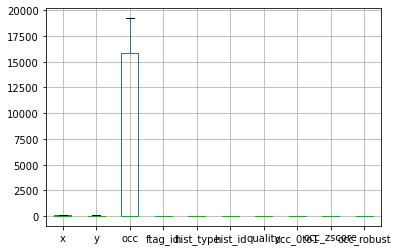

1 31


<IPython.core.display.Javascript object>

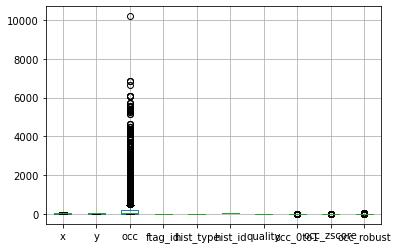

1 32


<IPython.core.display.Javascript object>

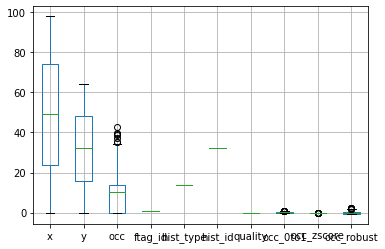

1 33


<IPython.core.display.Javascript object>

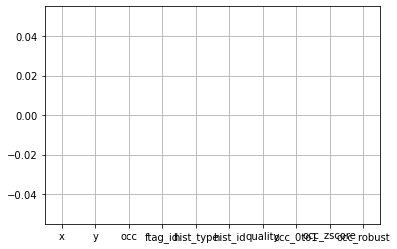

1 34


<IPython.core.display.Javascript object>

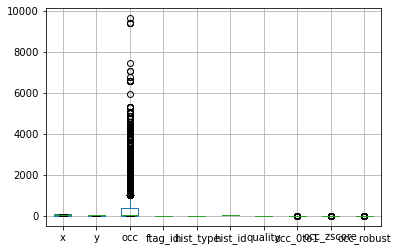

1 35


<IPython.core.display.Javascript object>

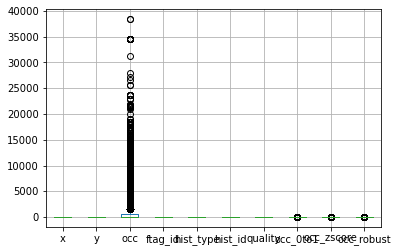

1 36


<IPython.core.display.Javascript object>

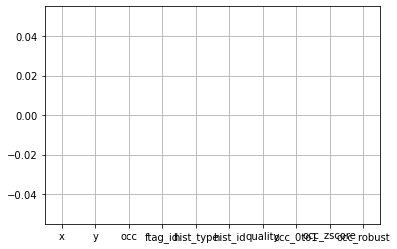

1 37


<IPython.core.display.Javascript object>

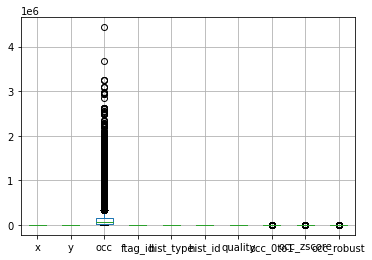

1 38


<IPython.core.display.Javascript object>

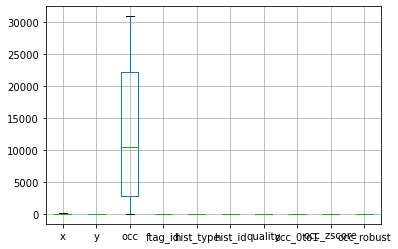

1 39


<IPython.core.display.Javascript object>

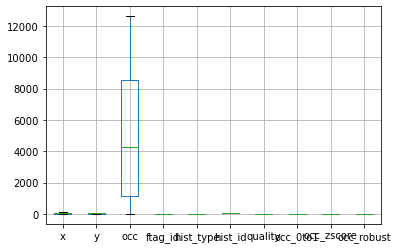

1 40


<IPython.core.display.Javascript object>

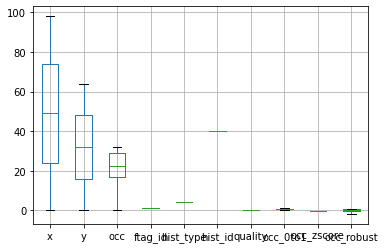

1 41


<IPython.core.display.Javascript object>

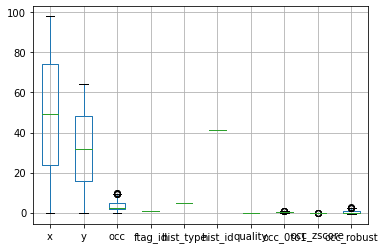

1 42


<IPython.core.display.Javascript object>

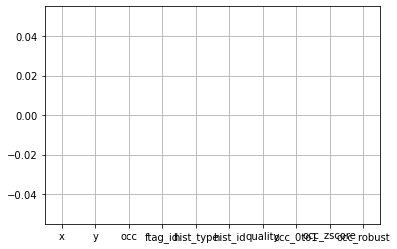

1 43


<IPython.core.display.Javascript object>

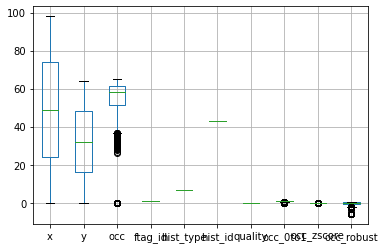

1 44


<IPython.core.display.Javascript object>

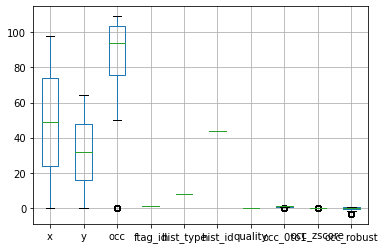

1 45


<IPython.core.display.Javascript object>

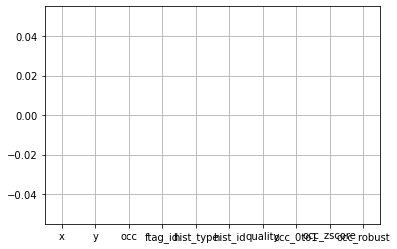

1 46


<IPython.core.display.Javascript object>

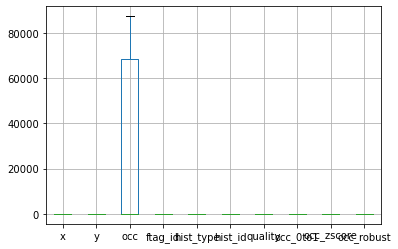

1 47


<IPython.core.display.Javascript object>

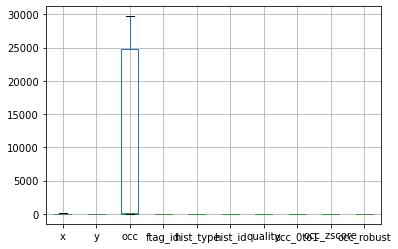

1 48


<IPython.core.display.Javascript object>

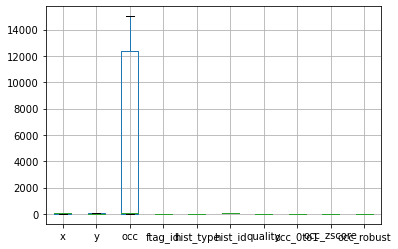

1 49


<IPython.core.display.Javascript object>

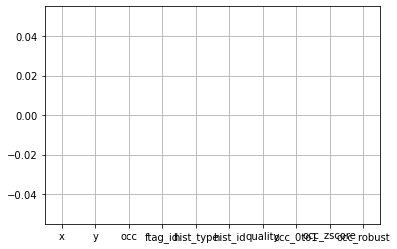

1 50


<IPython.core.display.Javascript object>

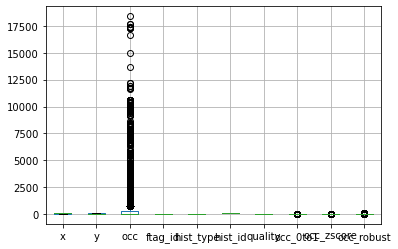

1 51


<IPython.core.display.Javascript object>

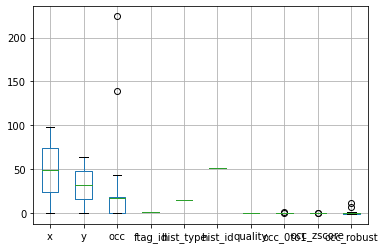

1 52


<IPython.core.display.Javascript object>

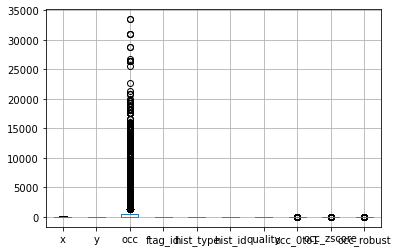

1 53


<IPython.core.display.Javascript object>

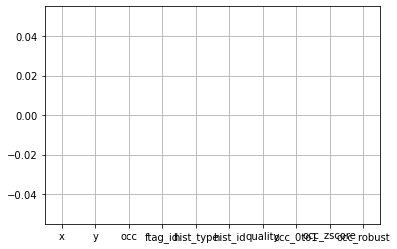

1 54


<IPython.core.display.Javascript object>

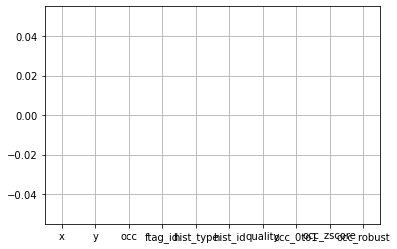

1 55


<IPython.core.display.Javascript object>

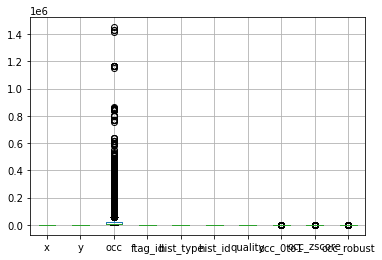

1 56


<IPython.core.display.Javascript object>

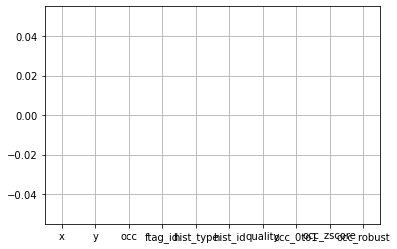

1 57


<IPython.core.display.Javascript object>

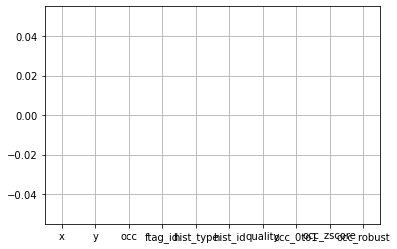

1 58


<IPython.core.display.Javascript object>

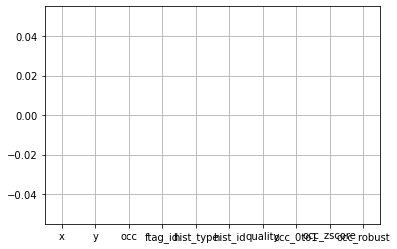

1 59


<IPython.core.display.Javascript object>

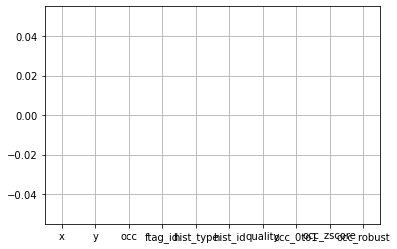

1 60


<IPython.core.display.Javascript object>

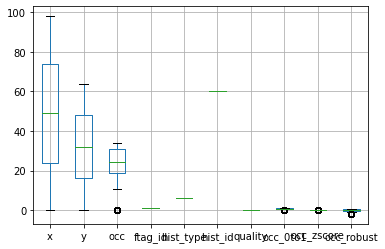

1 61


<IPython.core.display.Javascript object>

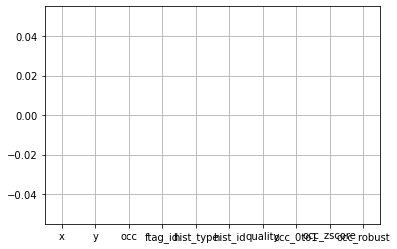

1 62


<IPython.core.display.Javascript object>

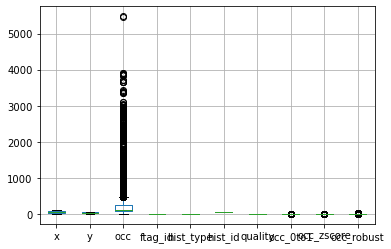

1 63


<IPython.core.display.Javascript object>

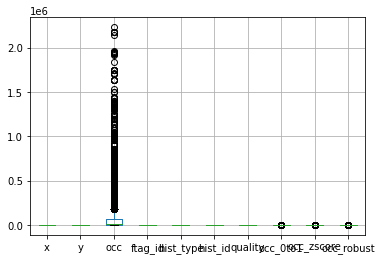

1 64


<IPython.core.display.Javascript object>

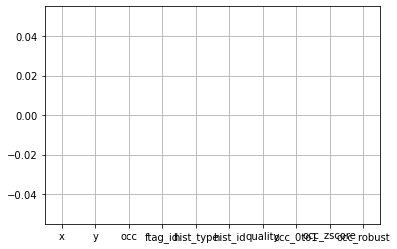

1 65


<IPython.core.display.Javascript object>

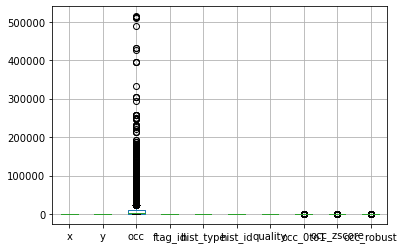

1 66


<IPython.core.display.Javascript object>

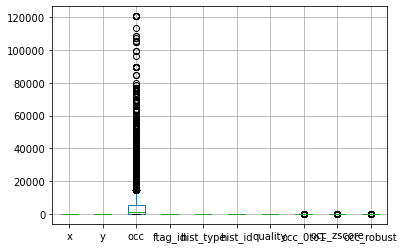

1 67


<IPython.core.display.Javascript object>

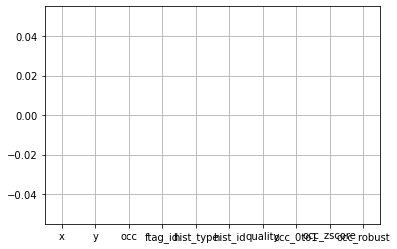

1 68


<IPython.core.display.Javascript object>

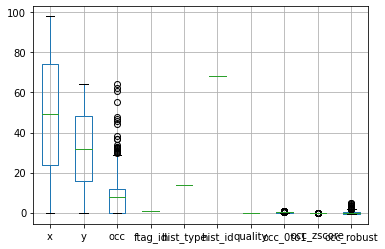

1 69


<IPython.core.display.Javascript object>

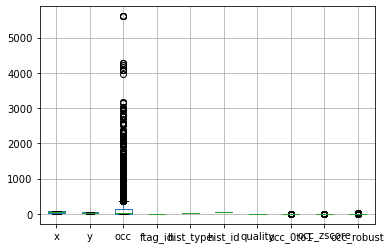

1 70


<IPython.core.display.Javascript object>

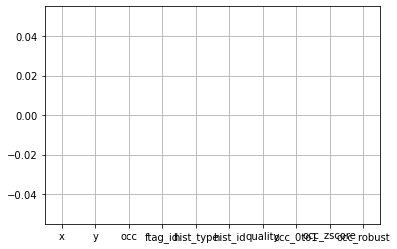

1 71


<IPython.core.display.Javascript object>

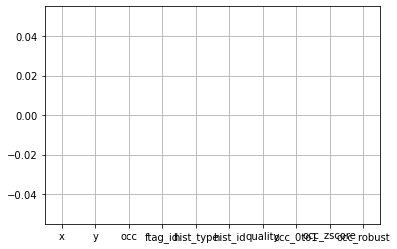

1 72


<IPython.core.display.Javascript object>

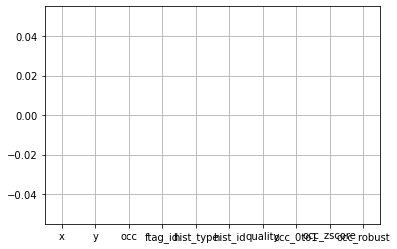

1 73


<IPython.core.display.Javascript object>

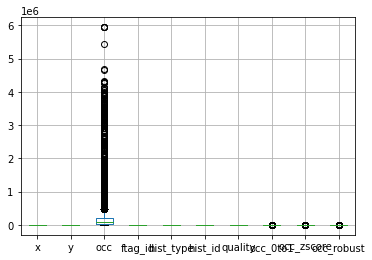

1 74


<IPython.core.display.Javascript object>

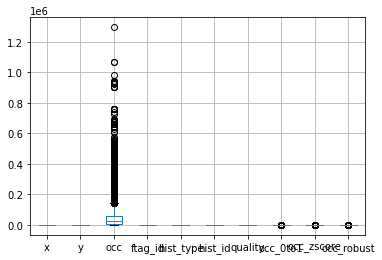

1 75


<IPython.core.display.Javascript object>

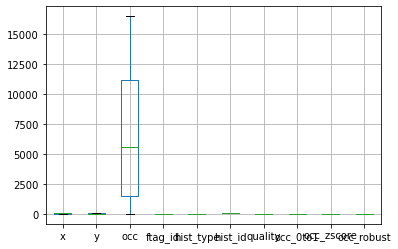

1 76


<IPython.core.display.Javascript object>

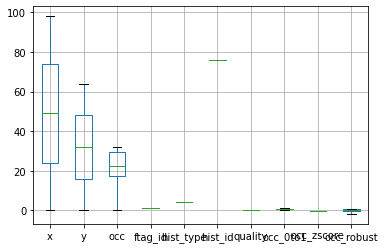

1 77


<IPython.core.display.Javascript object>

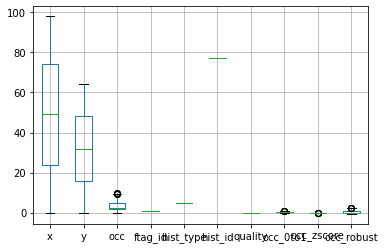

1 78


<IPython.core.display.Javascript object>

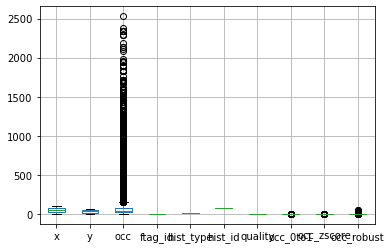

1 79


<IPython.core.display.Javascript object>

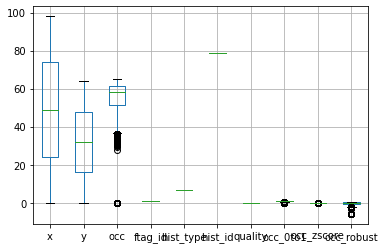

1 80


<IPython.core.display.Javascript object>

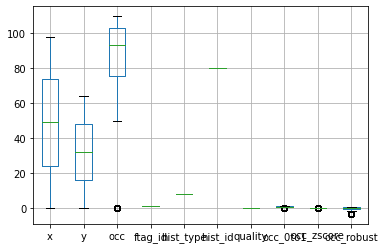

1 81


<IPython.core.display.Javascript object>

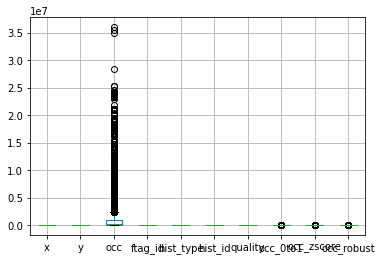

1 82


<IPython.core.display.Javascript object>

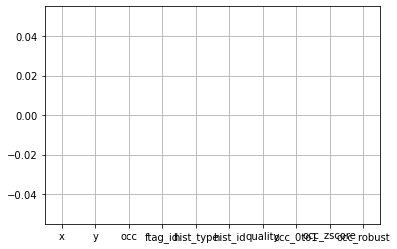

1 83


<IPython.core.display.Javascript object>

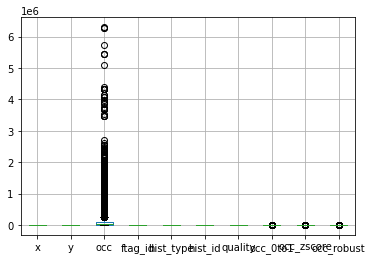

1 84


<IPython.core.display.Javascript object>

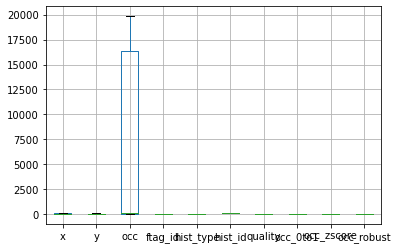

1 85


<IPython.core.display.Javascript object>

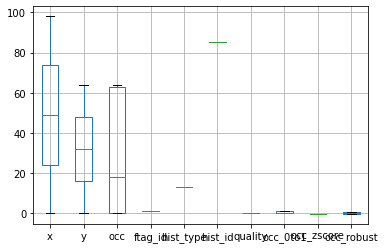

1 86


<IPython.core.display.Javascript object>

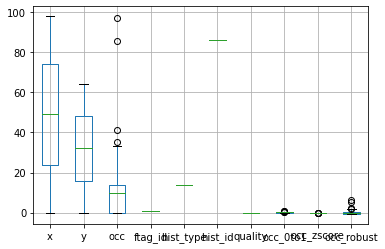

1 87


<IPython.core.display.Javascript object>

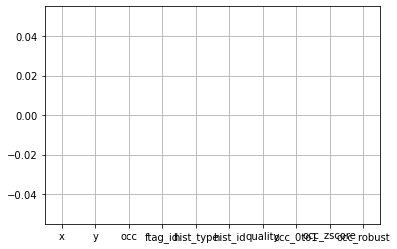

1 88


<IPython.core.display.Javascript object>

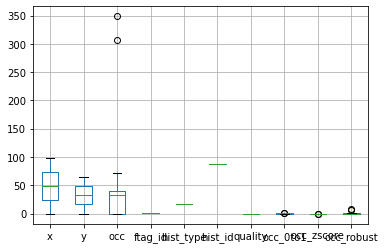

1 89


<IPython.core.display.Javascript object>

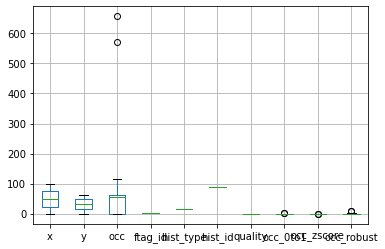

1 90


<IPython.core.display.Javascript object>

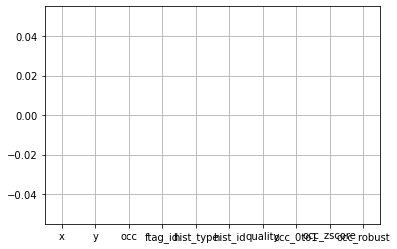

1 91


<IPython.core.display.Javascript object>

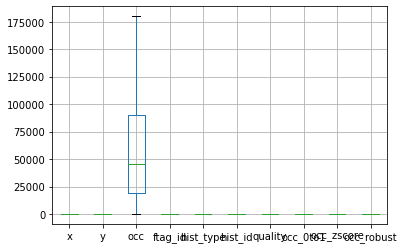

1 92


<IPython.core.display.Javascript object>

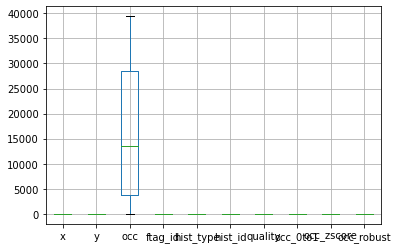

1 93


<IPython.core.display.Javascript object>

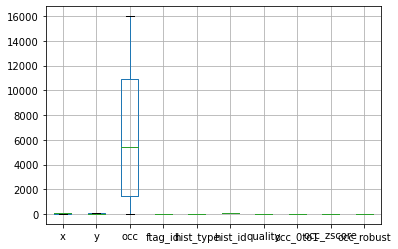

1 94


<IPython.core.display.Javascript object>

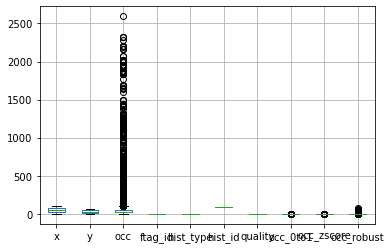

1 95


<IPython.core.display.Javascript object>

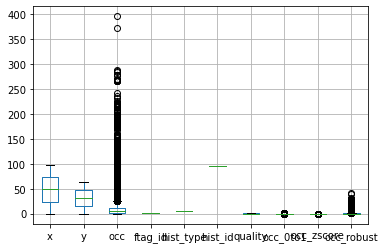

1 96


<IPython.core.display.Javascript object>

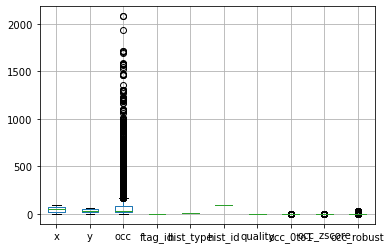

1 97


<IPython.core.display.Javascript object>

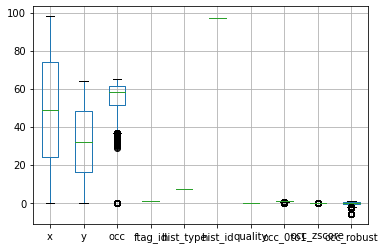

1 98


<IPython.core.display.Javascript object>

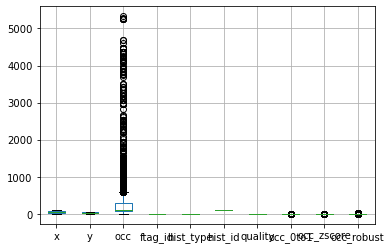

1 99


<IPython.core.display.Javascript object>

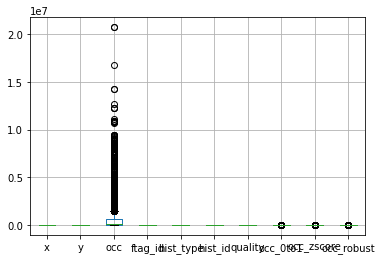

1 100


<IPython.core.display.Javascript object>

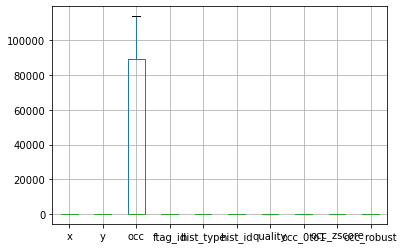

1 101


<IPython.core.display.Javascript object>

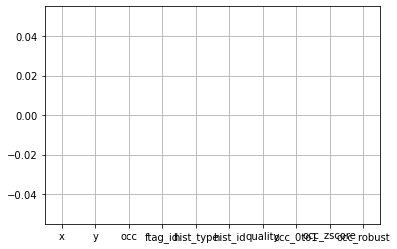

1 102


<IPython.core.display.Javascript object>

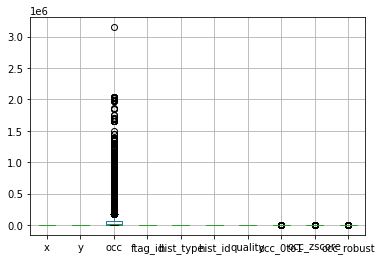

1 103


<IPython.core.display.Javascript object>

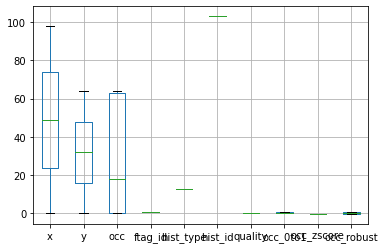

1 104


<IPython.core.display.Javascript object>

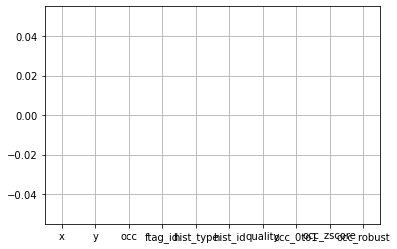

1 105


<IPython.core.display.Javascript object>

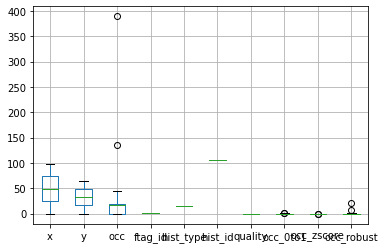

1 106


<IPython.core.display.Javascript object>

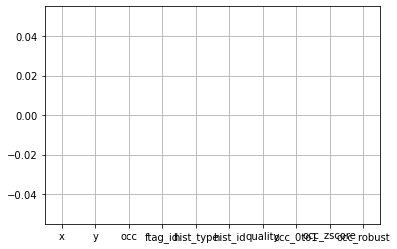

1 107


<IPython.core.display.Javascript object>

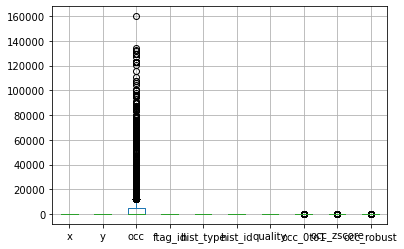

1 108


<IPython.core.display.Javascript object>

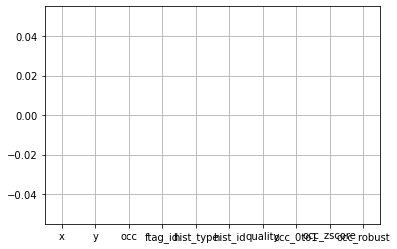

1 109


<IPython.core.display.Javascript object>

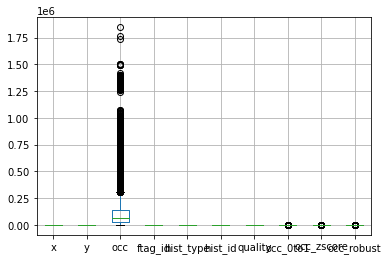

1 110


<IPython.core.display.Javascript object>

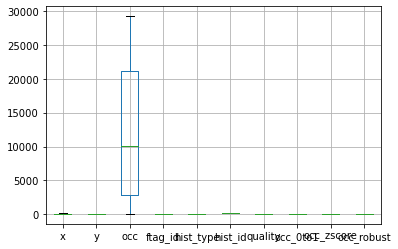

1 111


<IPython.core.display.Javascript object>

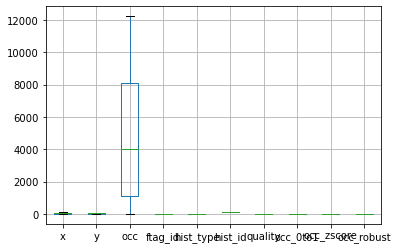

1 112


<IPython.core.display.Javascript object>

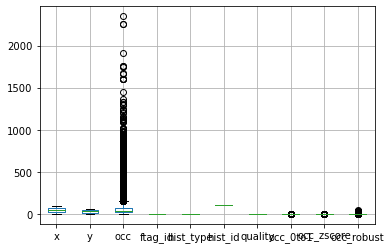

1 113


<IPython.core.display.Javascript object>

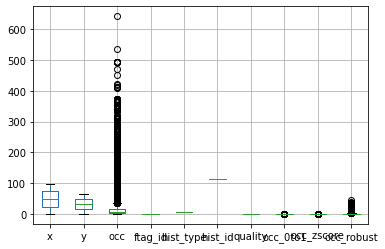

1 114


<IPython.core.display.Javascript object>

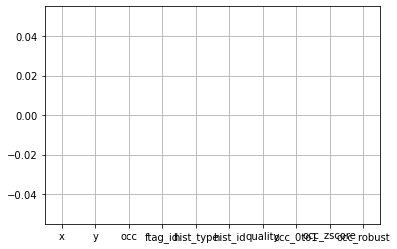

1 115


<IPython.core.display.Javascript object>

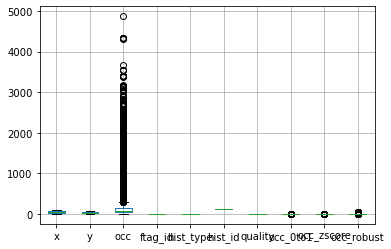

1 116


<IPython.core.display.Javascript object>

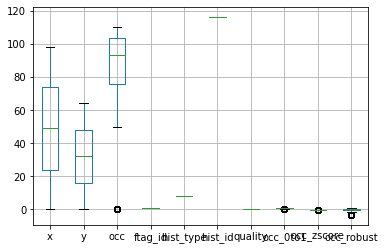

1 117


<IPython.core.display.Javascript object>

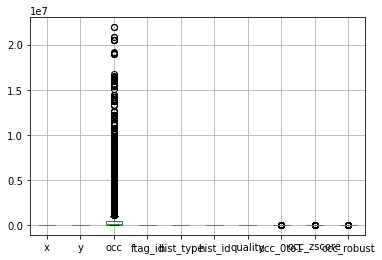

1 118


<IPython.core.display.Javascript object>

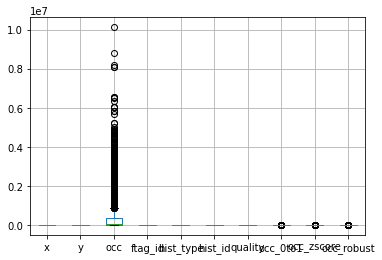

1 119


<IPython.core.display.Javascript object>

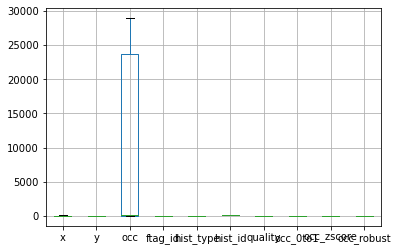

1 120


<IPython.core.display.Javascript object>

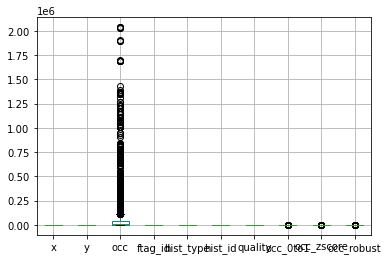

1 121


<IPython.core.display.Javascript object>

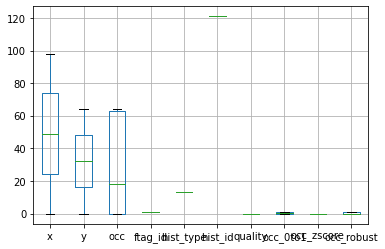

1 122


<IPython.core.display.Javascript object>

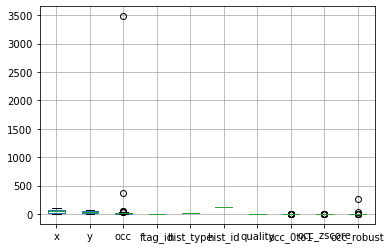

1 123


<IPython.core.display.Javascript object>

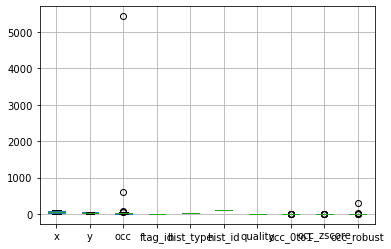

1 124


<IPython.core.display.Javascript object>

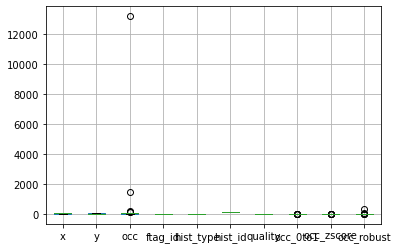

1 125


<IPython.core.display.Javascript object>

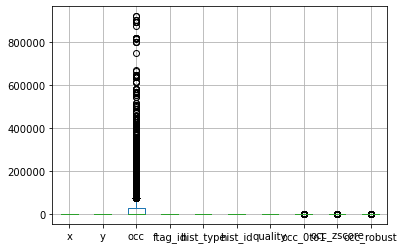

1 126


<IPython.core.display.Javascript object>

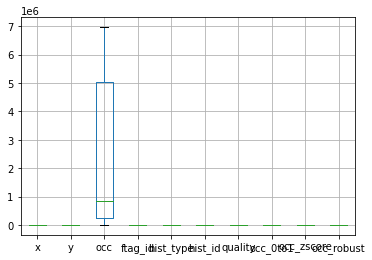

1 127


<IPython.core.display.Javascript object>

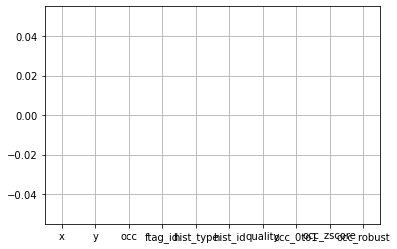

1 128


<IPython.core.display.Javascript object>

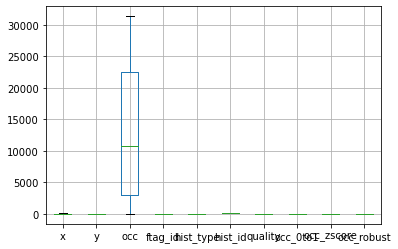

1 129


<IPython.core.display.Javascript object>

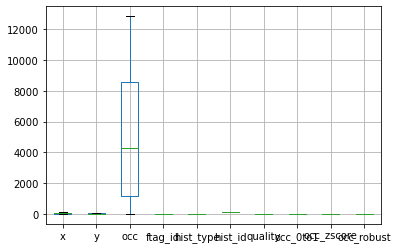

1 130


<IPython.core.display.Javascript object>

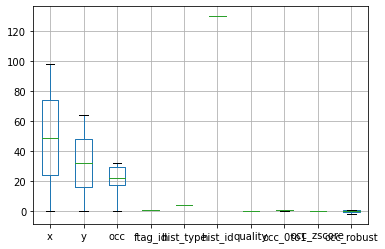

1 131


<IPython.core.display.Javascript object>

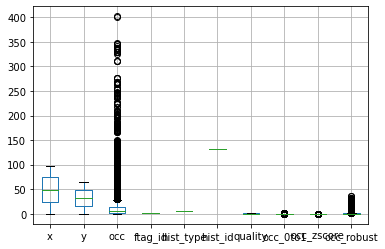

1 132


<IPython.core.display.Javascript object>

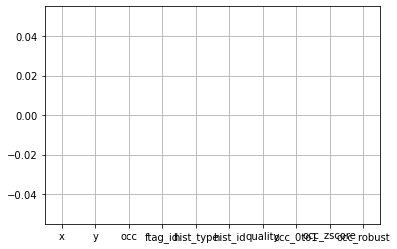

1 133


<IPython.core.display.Javascript object>

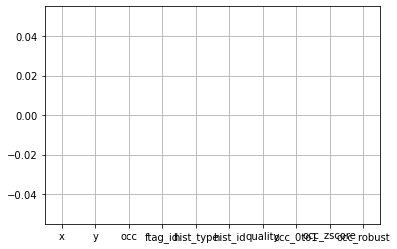

1 134


<IPython.core.display.Javascript object>

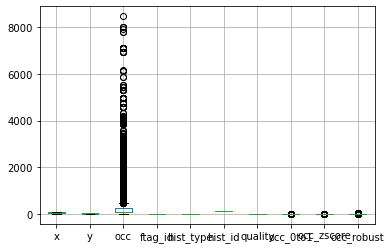

1 135


<IPython.core.display.Javascript object>

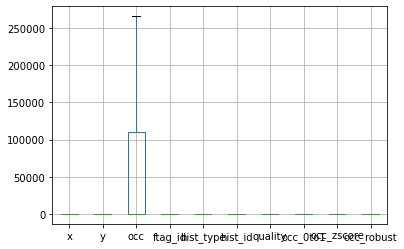

1 136


<IPython.core.display.Javascript object>

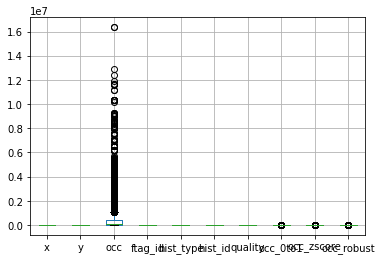

1 137


<IPython.core.display.Javascript object>

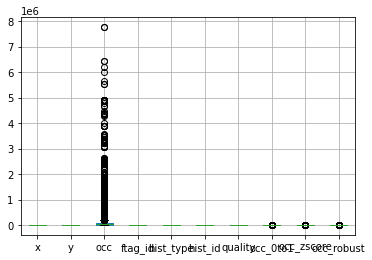

1 138


<IPython.core.display.Javascript object>

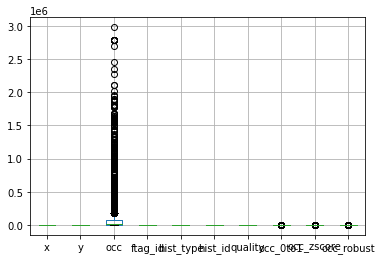

1 139


<IPython.core.display.Javascript object>

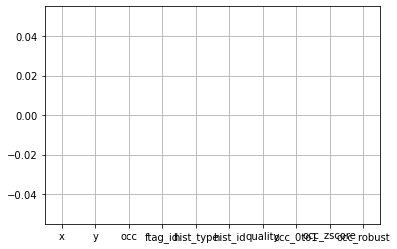

1 140


<IPython.core.display.Javascript object>

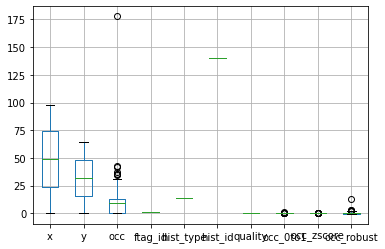

1 141


<IPython.core.display.Javascript object>

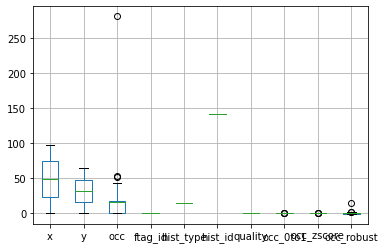

1 142


<IPython.core.display.Javascript object>

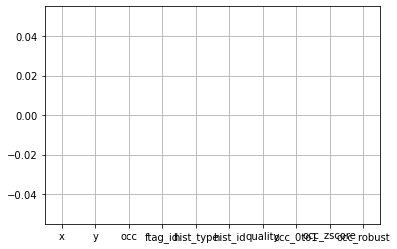

1 143


<IPython.core.display.Javascript object>

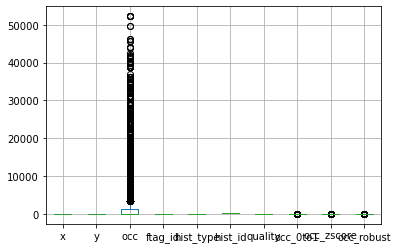

1 144


<IPython.core.display.Javascript object>

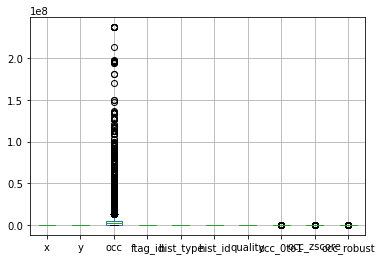

1 145


<IPython.core.display.Javascript object>

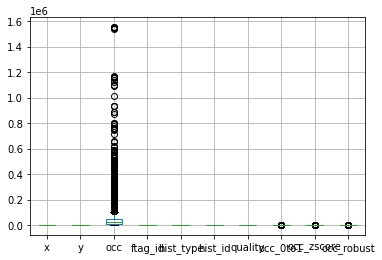

1 146


<IPython.core.display.Javascript object>

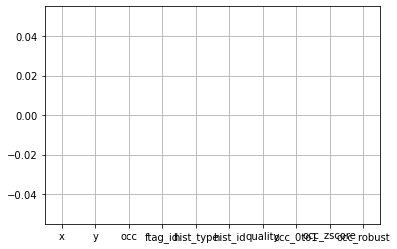

1 147


<IPython.core.display.Javascript object>

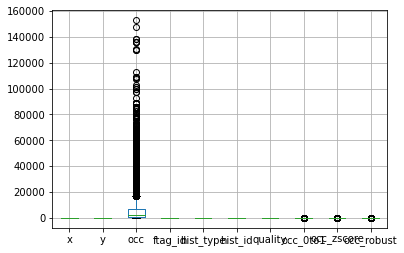

1 148


<IPython.core.display.Javascript object>

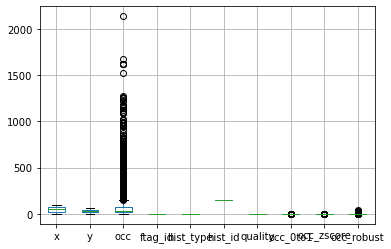

1 149


<IPython.core.display.Javascript object>

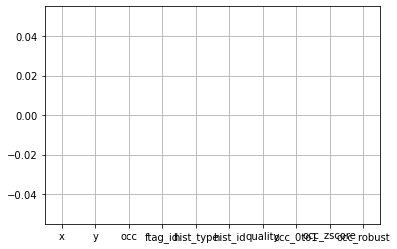

1 150


<IPython.core.display.Javascript object>

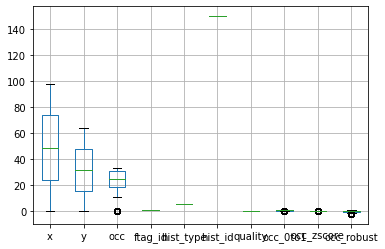

1 151


<IPython.core.display.Javascript object>

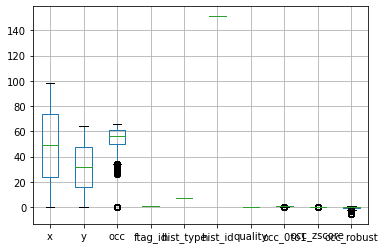

1 152


<IPython.core.display.Javascript object>

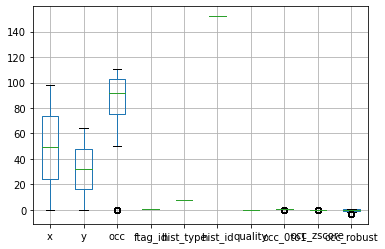

1 153


<IPython.core.display.Javascript object>

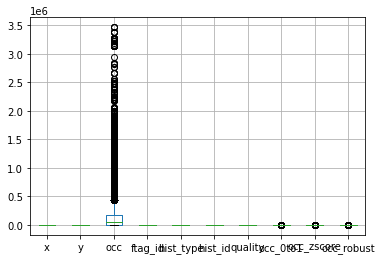

1 154


<IPython.core.display.Javascript object>

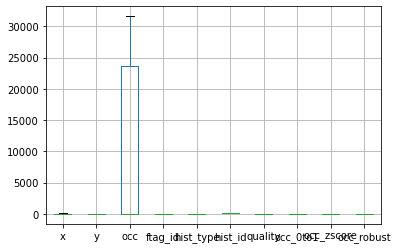

1 155


<IPython.core.display.Javascript object>

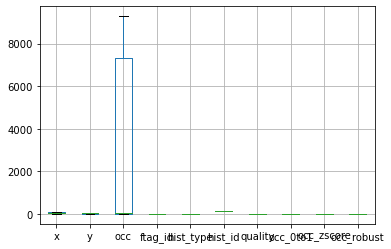

1 156


<IPython.core.display.Javascript object>

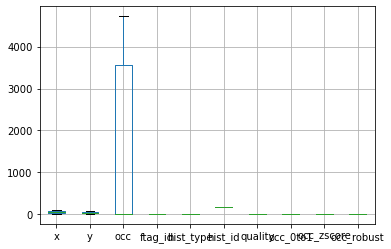

1 157


<IPython.core.display.Javascript object>

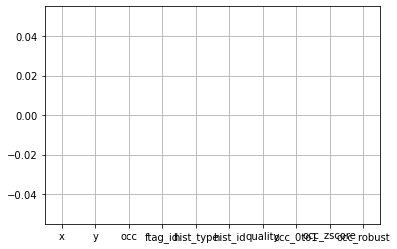

1 158


<IPython.core.display.Javascript object>

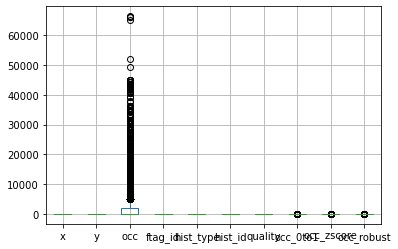

1 159


<IPython.core.display.Javascript object>

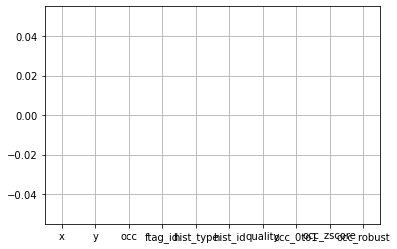

1 160


<IPython.core.display.Javascript object>

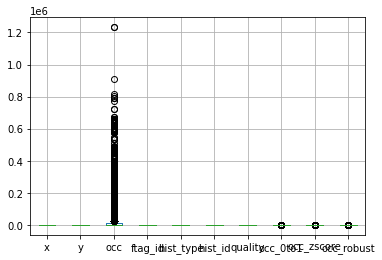

1 161


<IPython.core.display.Javascript object>

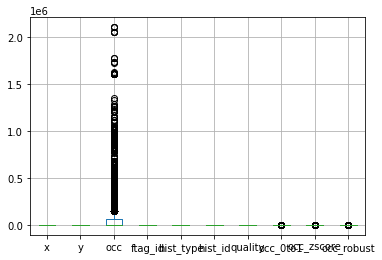

1 162


<IPython.core.display.Javascript object>

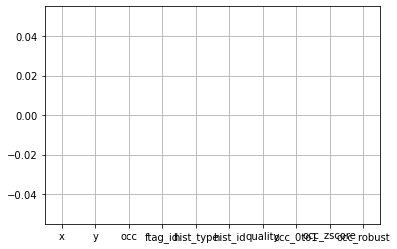

1 163


<IPython.core.display.Javascript object>

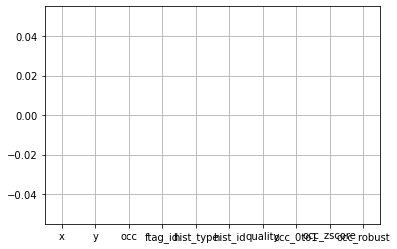

1 164


<IPython.core.display.Javascript object>

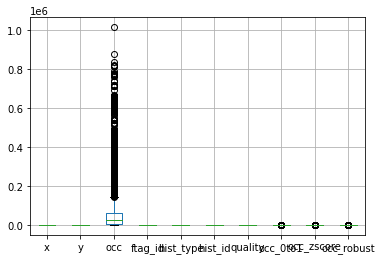

1 165


<IPython.core.display.Javascript object>

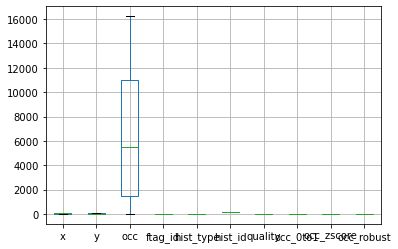

1 166


<IPython.core.display.Javascript object>

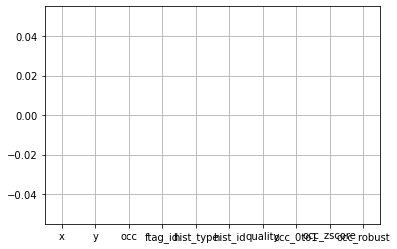

1 167


<IPython.core.display.Javascript object>

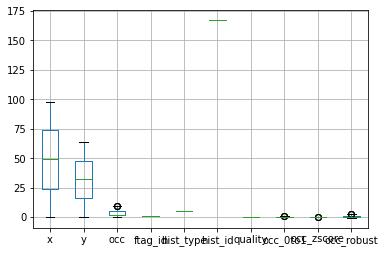

1 168


<IPython.core.display.Javascript object>

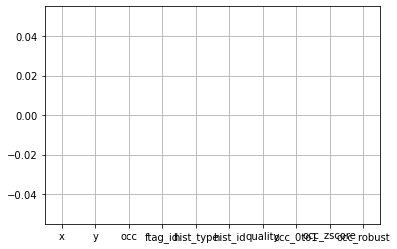

1 169


<IPython.core.display.Javascript object>

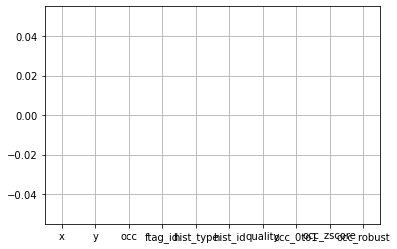

1 170


<IPython.core.display.Javascript object>

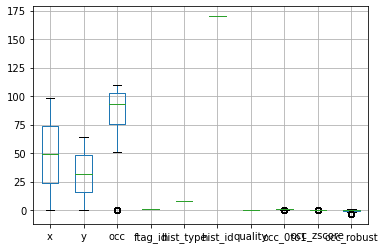

1 171


<IPython.core.display.Javascript object>

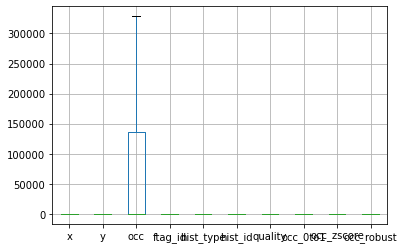

1 172


<IPython.core.display.Javascript object>

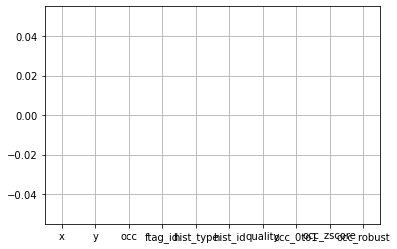

1 173


<IPython.core.display.Javascript object>

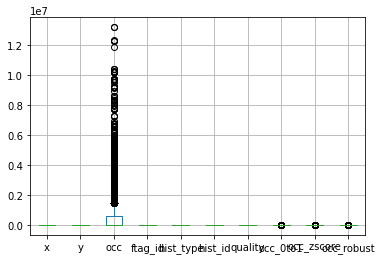

1 174


<IPython.core.display.Javascript object>

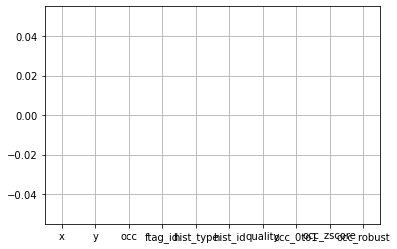

1 175


<IPython.core.display.Javascript object>

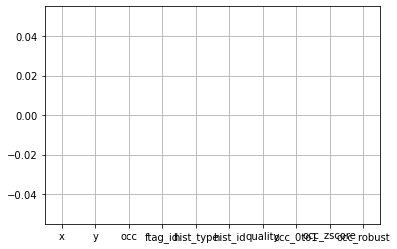

1 176


<IPython.core.display.Javascript object>

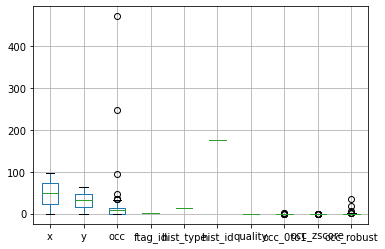

1 177


<IPython.core.display.Javascript object>

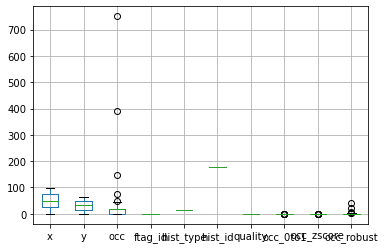

1 178


<IPython.core.display.Javascript object>

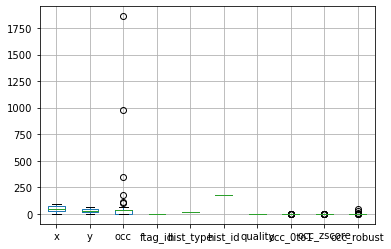

1 179


<IPython.core.display.Javascript object>

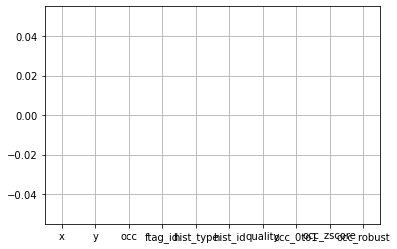

1 180


<IPython.core.display.Javascript object>

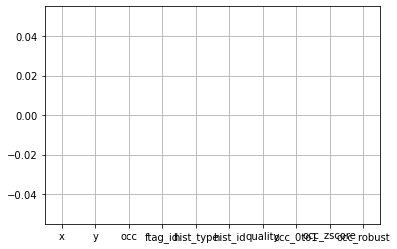

1 181


<IPython.core.display.Javascript object>

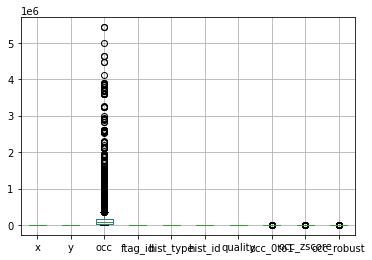

1 182


<IPython.core.display.Javascript object>

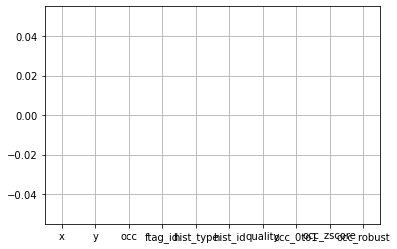

1 183


<IPython.core.display.Javascript object>

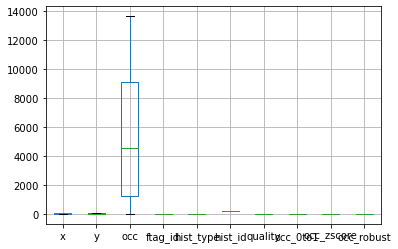

1 184


<IPython.core.display.Javascript object>

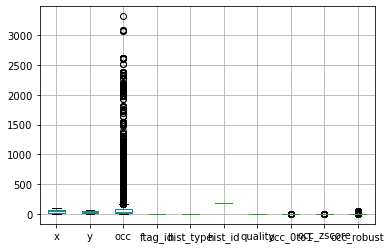

1 185


<IPython.core.display.Javascript object>

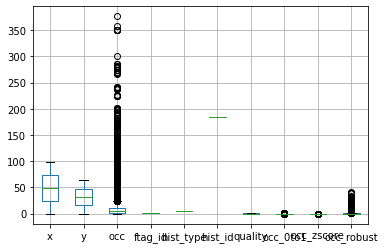

1 186


<IPython.core.display.Javascript object>

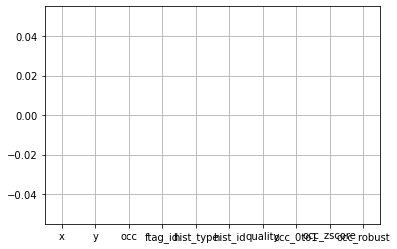

1 187


<IPython.core.display.Javascript object>

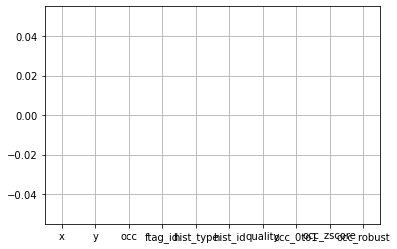

1 188


<IPython.core.display.Javascript object>

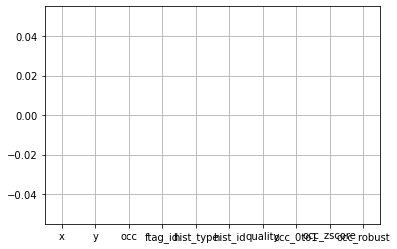

1 189


<IPython.core.display.Javascript object>

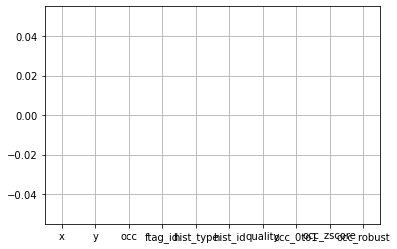

1 190


<IPython.core.display.Javascript object>

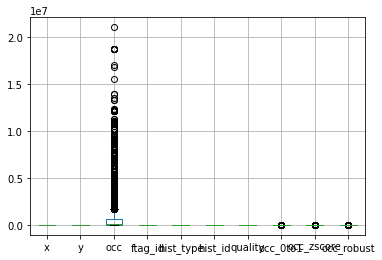

1 191


<IPython.core.display.Javascript object>

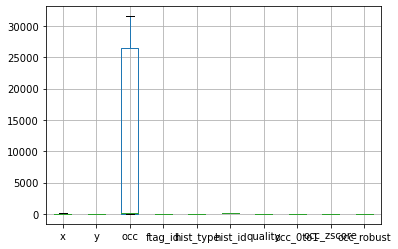

1 192


<IPython.core.display.Javascript object>

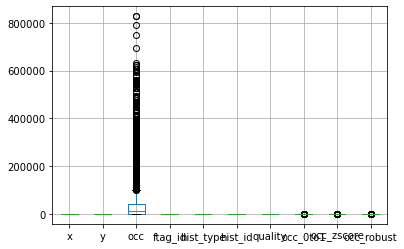

1 193


<IPython.core.display.Javascript object>

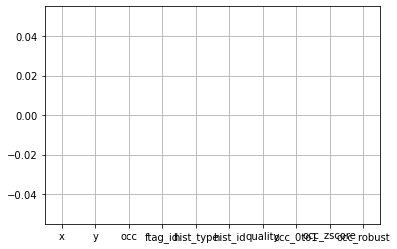

1 194


<IPython.core.display.Javascript object>

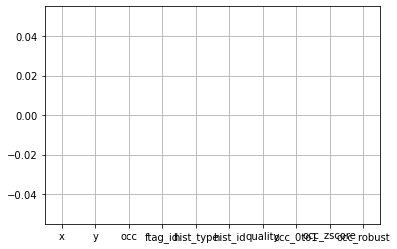

1 195


<IPython.core.display.Javascript object>

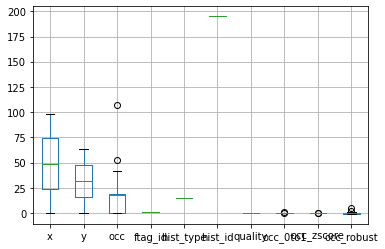

2 0


<IPython.core.display.Javascript object>

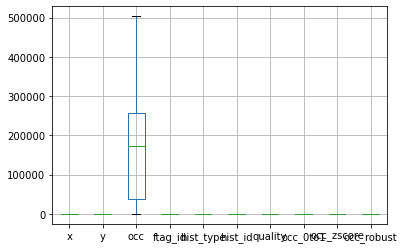

2 1


<IPython.core.display.Javascript object>

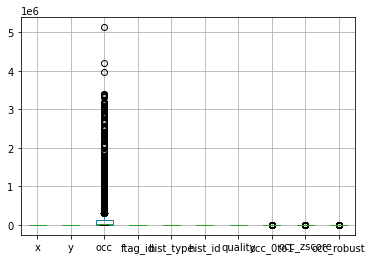

2 2


<IPython.core.display.Javascript object>

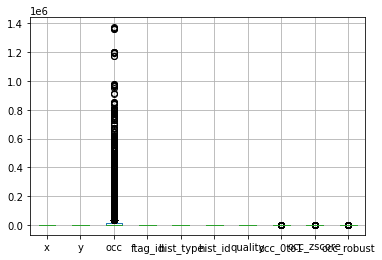

2 3


<IPython.core.display.Javascript object>

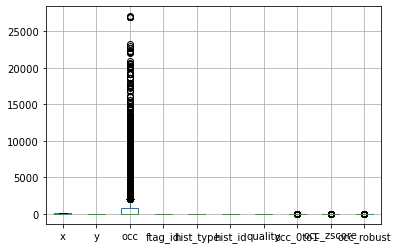

2 4


<IPython.core.display.Javascript object>

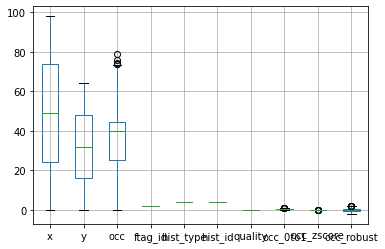

2 5


<IPython.core.display.Javascript object>

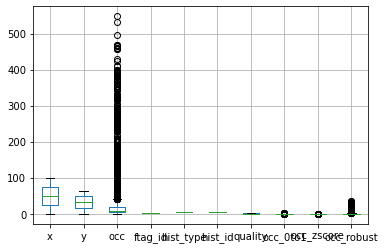

2 6


<IPython.core.display.Javascript object>

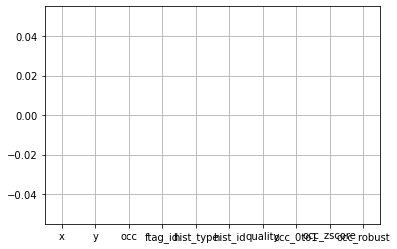

2 7


<IPython.core.display.Javascript object>

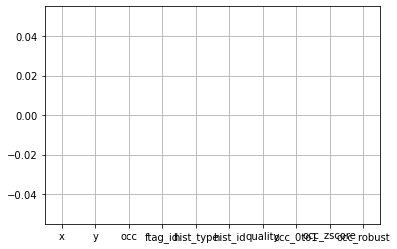

2 8


<IPython.core.display.Javascript object>

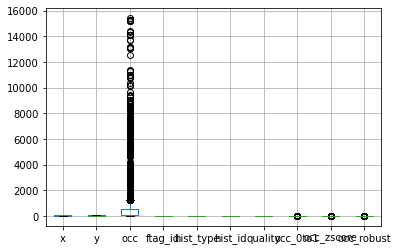

2 9


<IPython.core.display.Javascript object>

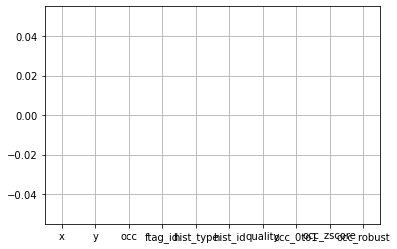

2 10


<IPython.core.display.Javascript object>

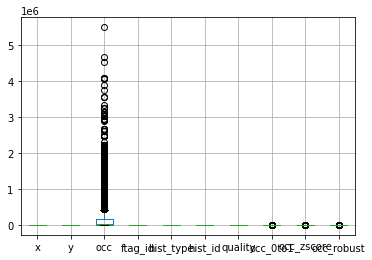

2 11


<IPython.core.display.Javascript object>

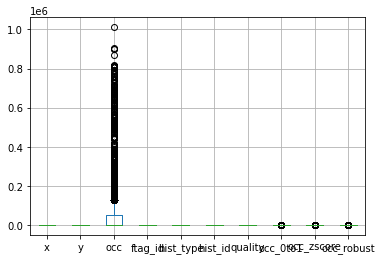

2 12


<IPython.core.display.Javascript object>

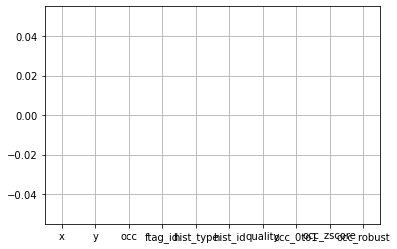

2 13


<IPython.core.display.Javascript object>

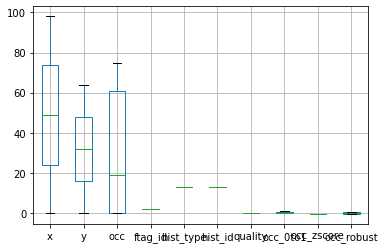

2 14


<IPython.core.display.Javascript object>

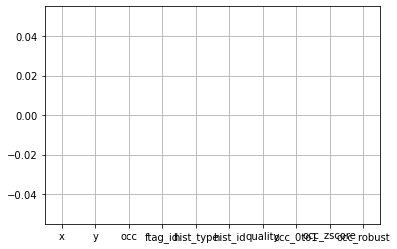

2 15


<IPython.core.display.Javascript object>

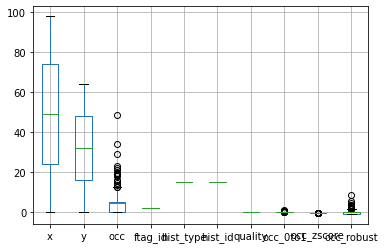

2 16


<IPython.core.display.Javascript object>

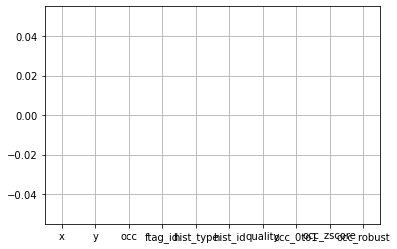

3 0


<IPython.core.display.Javascript object>

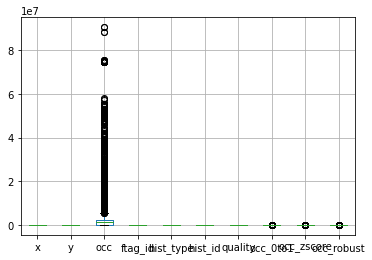

3 1
3 2


<IPython.core.display.Javascript object>

3 3


<IPython.core.display.Javascript object>

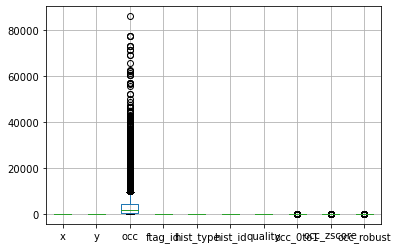

3 4
3 5
3 6


<IPython.core.display.Javascript object>

3 7
3 8


<IPython.core.display.Javascript object>

3 9
3 10


<IPython.core.display.Javascript object>

3 11


<IPython.core.display.Javascript object>

3 12


<IPython.core.display.Javascript object>

3 13


<IPython.core.display.Javascript object>

3 14
3 15


<IPython.core.display.Javascript object>

3 16
4 0


<IPython.core.display.Javascript object>

4 1


<IPython.core.display.Javascript object>

4 2


<IPython.core.display.Javascript object>

4 3
4 4


<IPython.core.display.Javascript object>

4 5


<IPython.core.display.Javascript object>

4 6


<IPython.core.display.Javascript object>

4 7
4 8


<IPython.core.display.Javascript object>

4 9


<IPython.core.display.Javascript object>

4 10


<IPython.core.display.Javascript object>

4 11


<IPython.core.display.Javascript object>

AttributeError: draw_path

<Figure size 432x288 with 1 Axes>

4 12


<IPython.core.display.Javascript object>

4 13
4 14


<IPython.core.display.Javascript object>

4 15


<IPython.core.display.Javascript object>

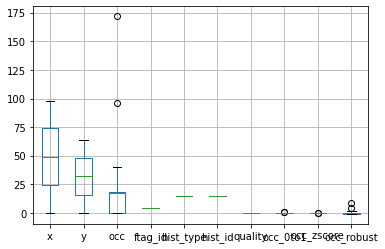

4 16


<IPython.core.display.Javascript object>

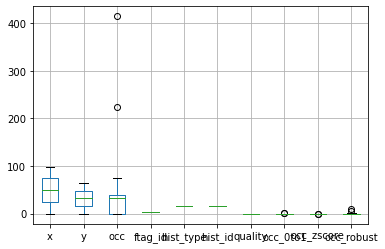

5 0


<IPython.core.display.Javascript object>

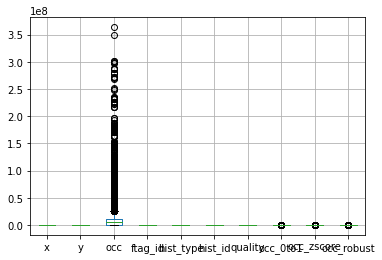

5 1


<IPython.core.display.Javascript object>

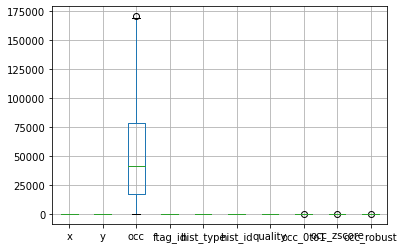

5 2


<IPython.core.display.Javascript object>

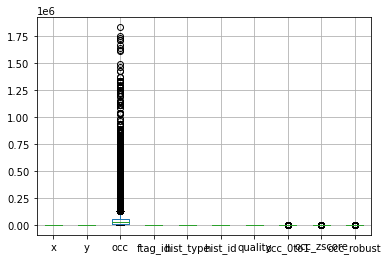

5 3


<IPython.core.display.Javascript object>

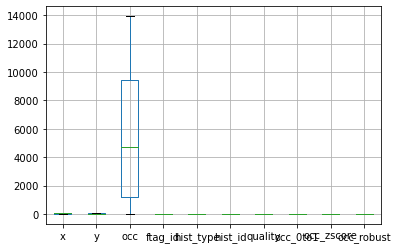

5 4


<IPython.core.display.Javascript object>

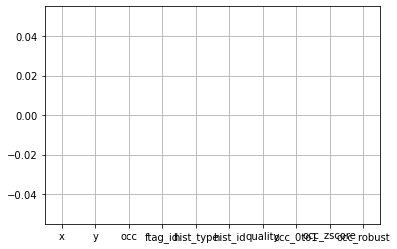

5 5


<IPython.core.display.Javascript object>

5 6


<IPython.core.display.Javascript object>

5 7
5 8
5 9
5 10
5 11


<IPython.core.display.Javascript object>

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7feb1f5c80d0>
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


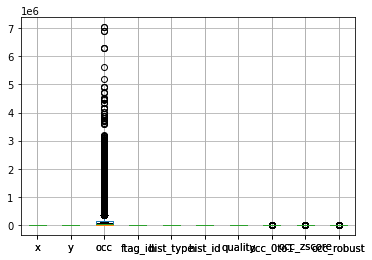

5 12
5 13


<IPython.core.display.Javascript object>

5 14
5 15


<IPython.core.display.Javascript object>

5 16


<IPython.core.display.Javascript object>

6 0


<IPython.core.display.Javascript object>

6 1
6 2


<IPython.core.display.Javascript object>

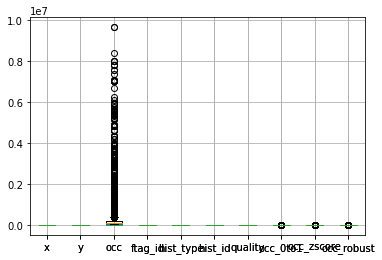

6 3


<IPython.core.display.Javascript object>

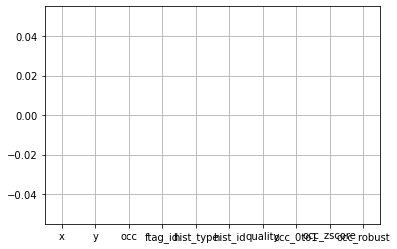

6 4


<IPython.core.display.Javascript object>

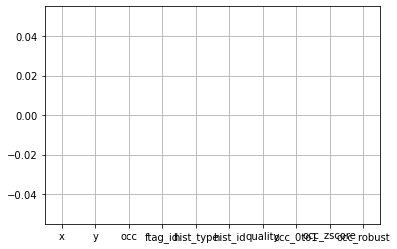

6 5


<IPython.core.display.Javascript object>

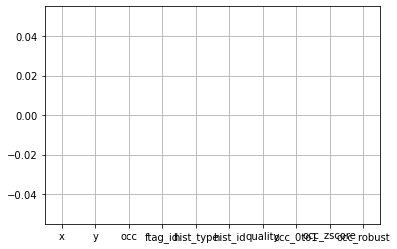

6 6
6 7


<IPython.core.display.Javascript object>

6 8


<IPython.core.display.Javascript object>

6 9


<IPython.core.display.Javascript object>

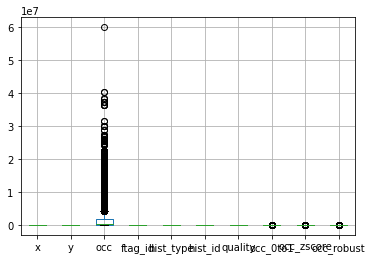

6 10
6 11


<IPython.core.display.Javascript object>

6 12


<IPython.core.display.Javascript object>

6 13


<IPython.core.display.Javascript object>

6 14


<IPython.core.display.Javascript object>

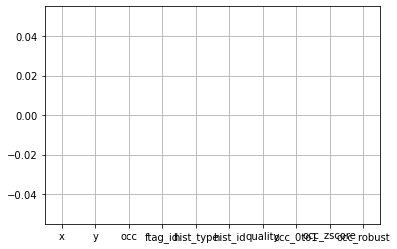

6 15
6 16
7 0


<IPython.core.display.Javascript object>

7 1


<IPython.core.display.Javascript object>

7 2
7 3


<IPython.core.display.Javascript object>

7 4


<IPython.core.display.Javascript object>

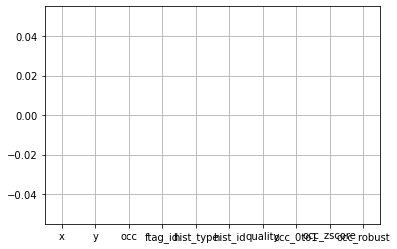

7 5
7 6


<IPython.core.display.Javascript object>

7 7


<IPython.core.display.Javascript object>

7 8


<IPython.core.display.Javascript object>

7 9


<IPython.core.display.Javascript object>

7 10


<IPython.core.display.Javascript object>

7 11


<IPython.core.display.Javascript object>

7 12


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1270: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1271: RuntimeWarning: invalid value encounter

<IPython.core.display.Javascript object>

7 13


<IPython.core.display.Javascript object>

7 14


<IPython.core.display.Javascript object>

7 15


<IPython.core.display.Javascript object>

7 16


<IPython.core.display.Javascript object>

8 0


<IPython.core.display.Javascript object>

8 1


<IPython.core.display.Javascript object>

8 2


<IPython.core.display.Javascript object>

8 3


<IPython.core.display.Javascript object>

8 4


<IPython.core.display.Javascript object>

8 5


<IPython.core.display.Javascript object>

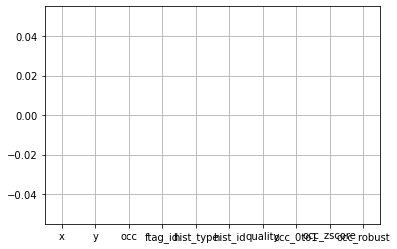

8 6
8 7


<IPython.core.display.Javascript object>

8 8


<IPython.core.display.Javascript object>

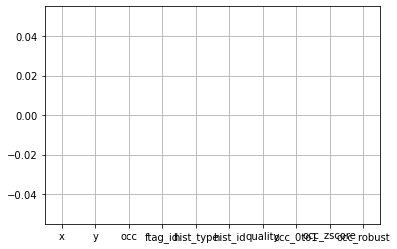

8 9
8 10


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1270: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1271: RuntimeWarning: invalid value encounter

<IPython.core.display.Javascript object>

8 11


<IPython.core.display.Javascript object>

8 12


<IPython.core.display.Javascript object>

8 13
8 14


<IPython.core.display.Javascript object>

8 15


<IPython.core.display.Javascript object>

9 0
9 1


<IPython.core.display.Javascript object>

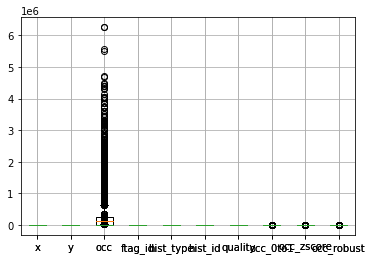

9 2


<IPython.core.display.Javascript object>

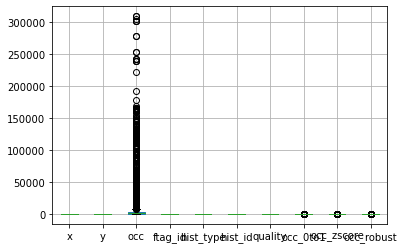

9 3


<IPython.core.display.Javascript object>

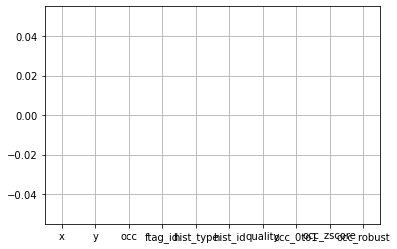

9 4


<IPython.core.display.Javascript object>

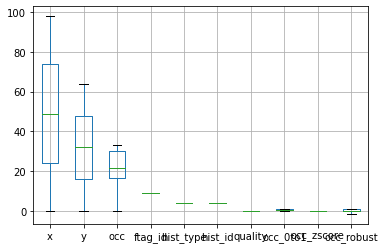

9 5


<IPython.core.display.Javascript object>

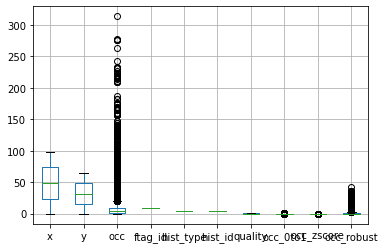

9 6


<IPython.core.display.Javascript object>

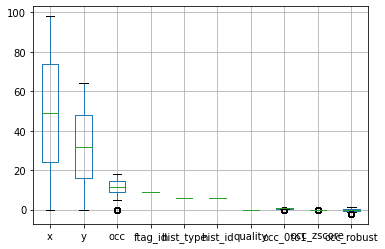

9 7


<IPython.core.display.Javascript object>

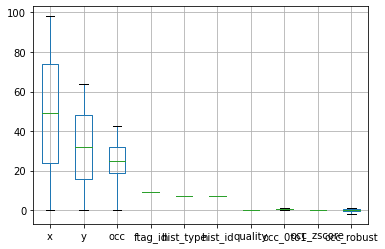

9 8


<IPython.core.display.Javascript object>

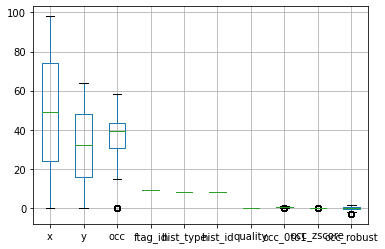

9 9


<IPython.core.display.Javascript object>

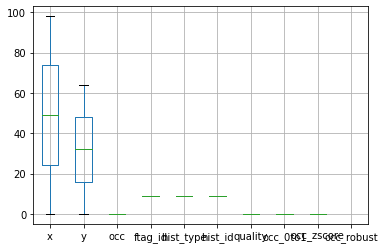

9 10


<IPython.core.display.Javascript object>

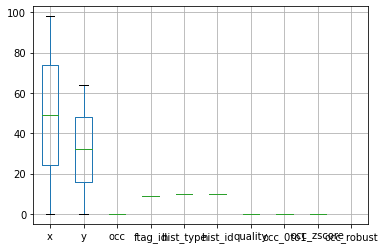

9 11


<IPython.core.display.Javascript object>

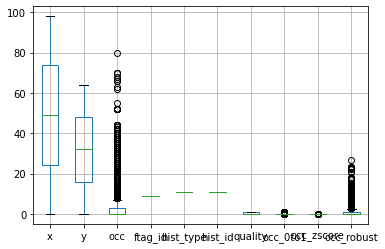

9 12


<IPython.core.display.Javascript object>

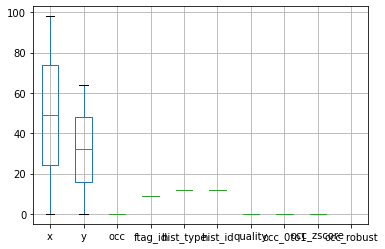

9 13


<IPython.core.display.Javascript object>

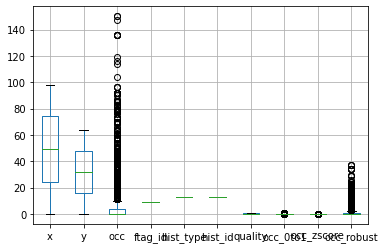

9 14


<IPython.core.display.Javascript object>

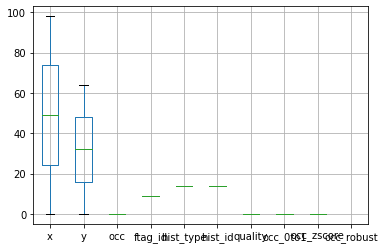

9 15


<IPython.core.display.Javascript object>

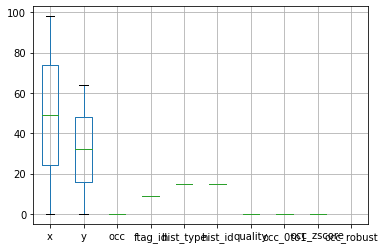

9 16


<IPython.core.display.Javascript object>

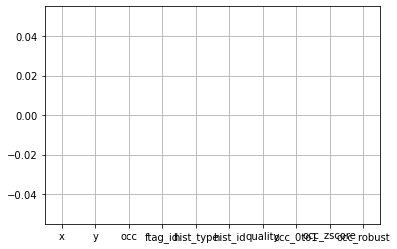

9 17


<IPython.core.display.Javascript object>

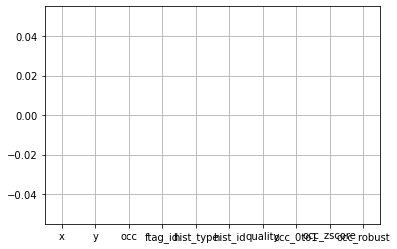

9 18


<IPython.core.display.Javascript object>

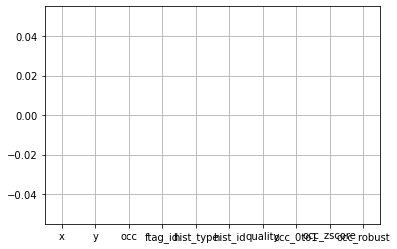

9 19


<IPython.core.display.Javascript object>

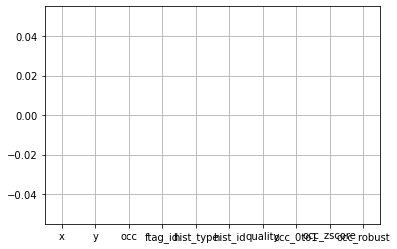

9 20


<IPython.core.display.Javascript object>

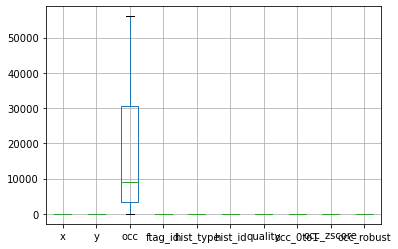

9 21


<IPython.core.display.Javascript object>

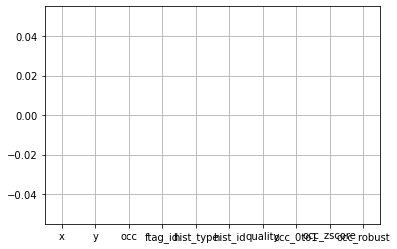

9 22


<IPython.core.display.Javascript object>

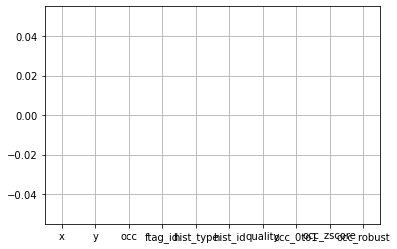

9 23


<IPython.core.display.Javascript object>

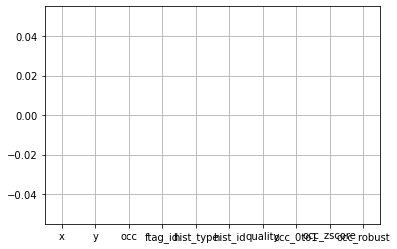

9 24


<IPython.core.display.Javascript object>

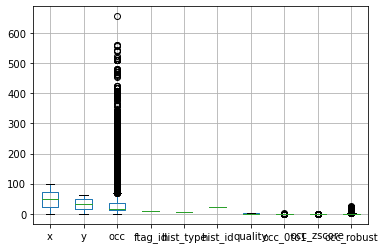

9 25


<IPython.core.display.Javascript object>

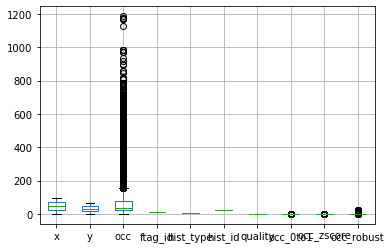

9 26


<IPython.core.display.Javascript object>

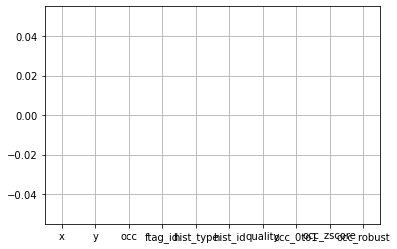

9 27


<IPython.core.display.Javascript object>

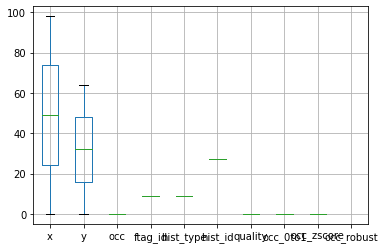

9 28


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1270: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1271: RuntimeWarning: invalid value encounter

<IPython.core.display.Javascript object>

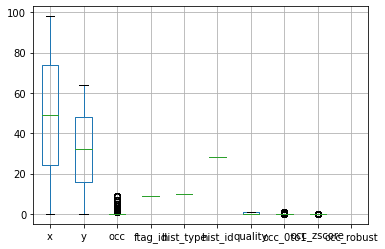

9 29


<IPython.core.display.Javascript object>

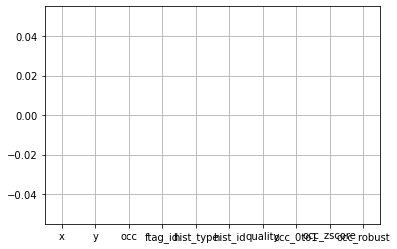

9 30


<IPython.core.display.Javascript object>

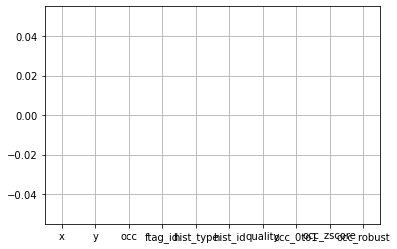

9 31


<IPython.core.display.Javascript object>

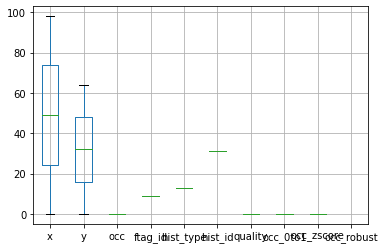

9 32


<IPython.core.display.Javascript object>

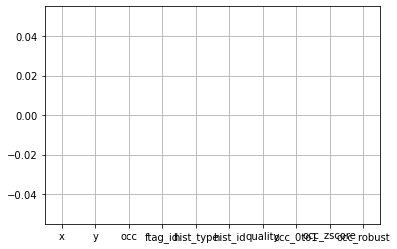

9 33


<IPython.core.display.Javascript object>

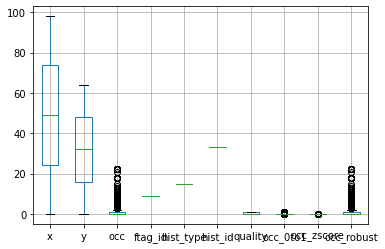

9 34


<IPython.core.display.Javascript object>

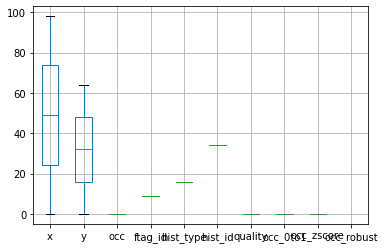

10 0


<IPython.core.display.Javascript object>

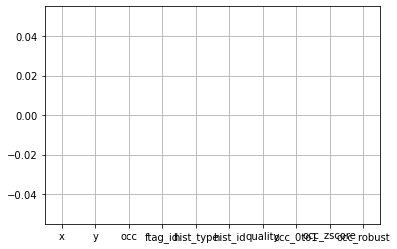

10 1


<IPython.core.display.Javascript object>

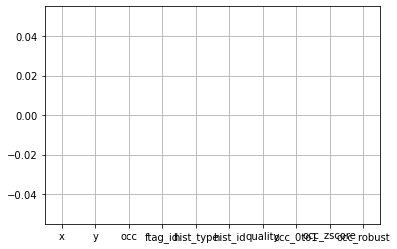

10 2


<IPython.core.display.Javascript object>

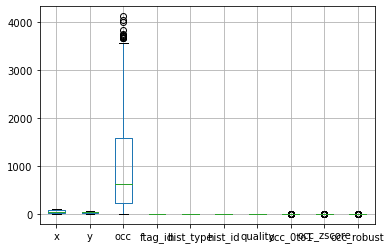

10 3


<IPython.core.display.Javascript object>

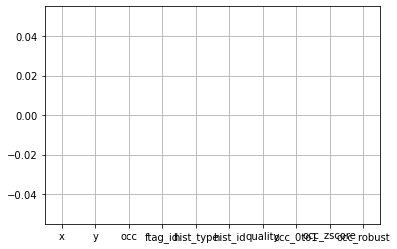

10 4


<IPython.core.display.Javascript object>

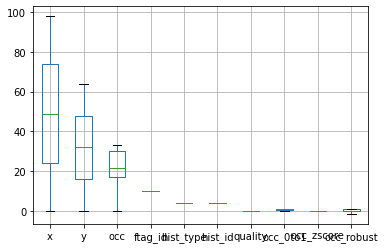

10 5


<IPython.core.display.Javascript object>

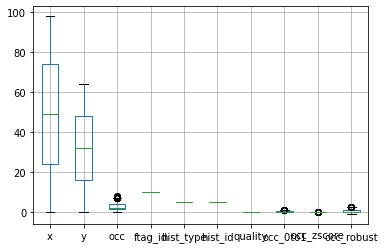

10 6


<IPython.core.display.Javascript object>

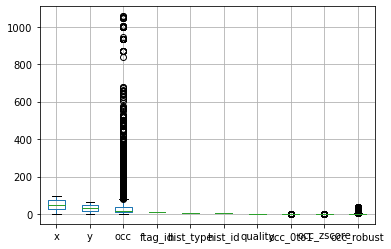

10 7


<IPython.core.display.Javascript object>

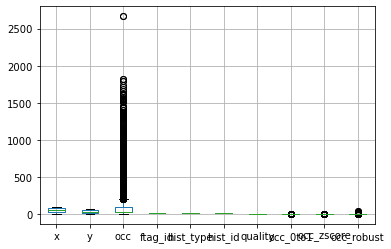

10 8


<IPython.core.display.Javascript object>

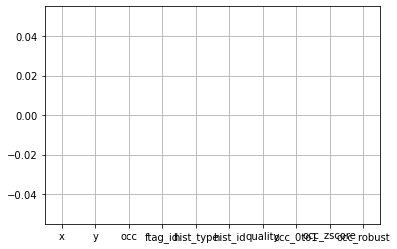

10 9


<IPython.core.display.Javascript object>

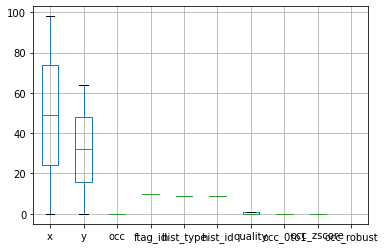

10 10


<IPython.core.display.Javascript object>

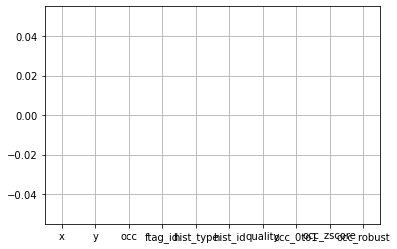

10 11


<IPython.core.display.Javascript object>

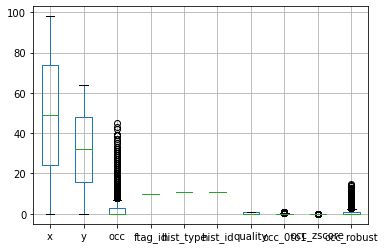

10 12


<IPython.core.display.Javascript object>

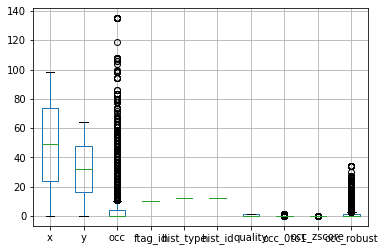

10 13


<IPython.core.display.Javascript object>

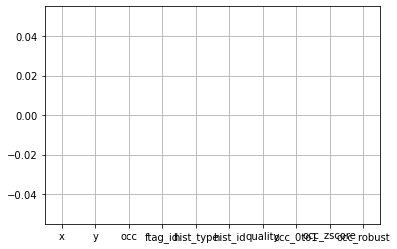

10 14


<IPython.core.display.Javascript object>

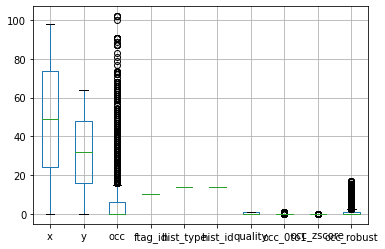

10 15


<IPython.core.display.Javascript object>

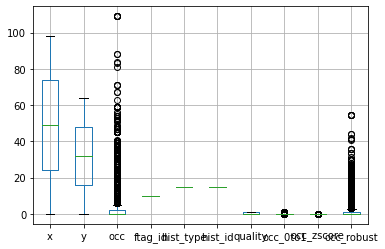

10 16


<IPython.core.display.Javascript object>

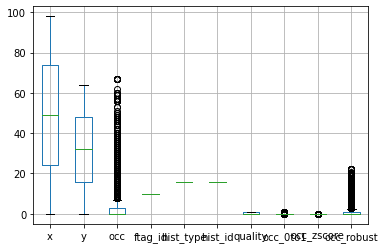

11 0


<IPython.core.display.Javascript object>

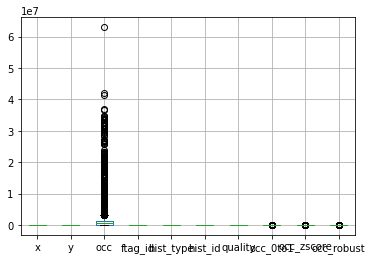

11 1


<IPython.core.display.Javascript object>

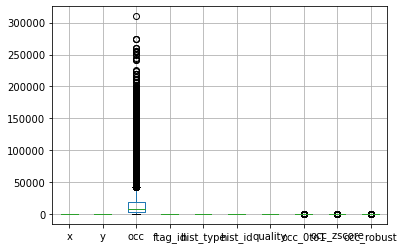

11 2


<IPython.core.display.Javascript object>

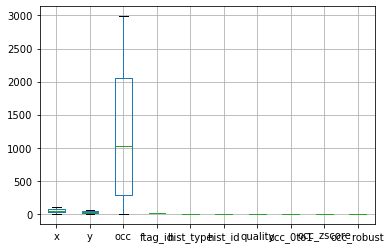

11 3


<IPython.core.display.Javascript object>

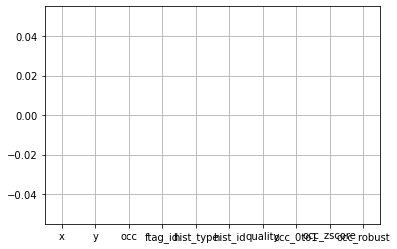

11 4


<IPython.core.display.Javascript object>

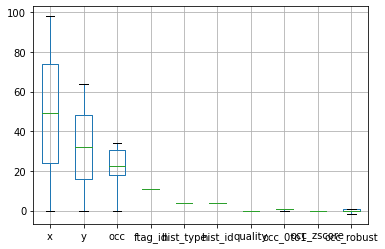

11 5


<IPython.core.display.Javascript object>

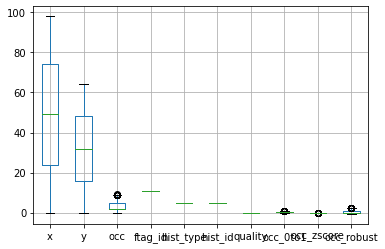

11 6


<IPython.core.display.Javascript object>

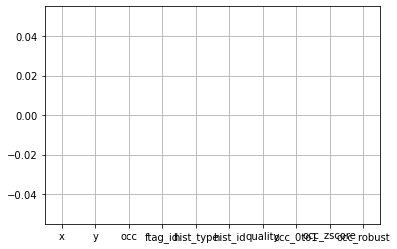

11 7


<IPython.core.display.Javascript object>

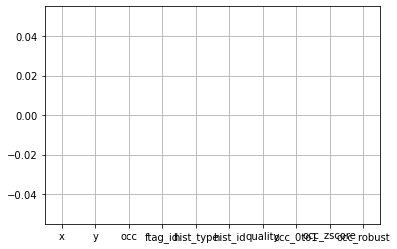

11 8


<IPython.core.display.Javascript object>

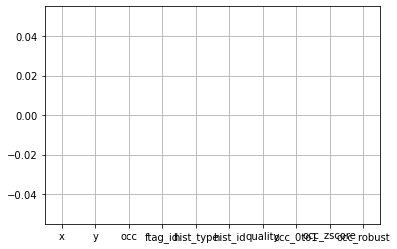

11 9


<IPython.core.display.Javascript object>

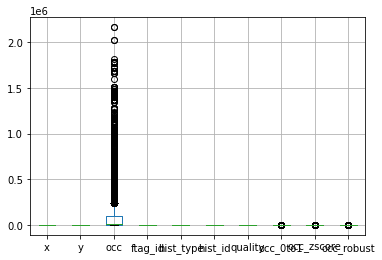

11 10


<IPython.core.display.Javascript object>

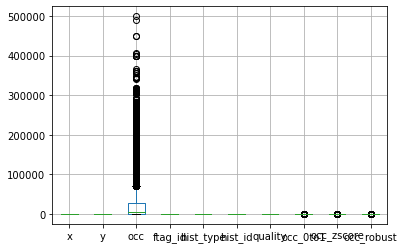

11 11


<IPython.core.display.Javascript object>

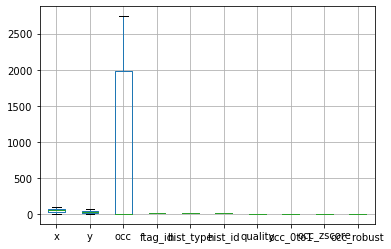

11 12


<IPython.core.display.Javascript object>

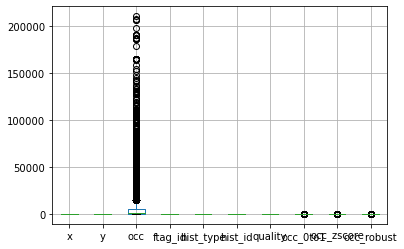

11 13


<IPython.core.display.Javascript object>

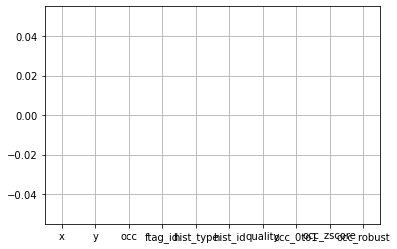

11 14


<IPython.core.display.Javascript object>

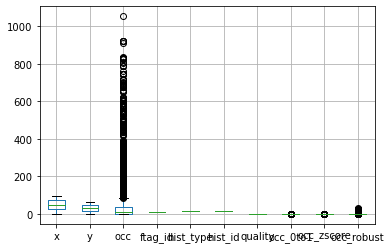

11 15


<IPython.core.display.Javascript object>

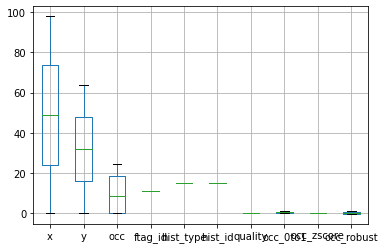

11 16


<IPython.core.display.Javascript object>

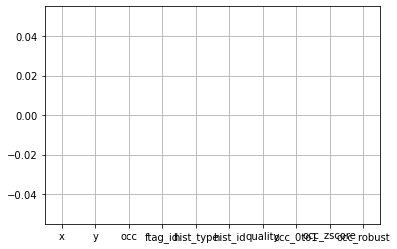

12 0


<IPython.core.display.Javascript object>

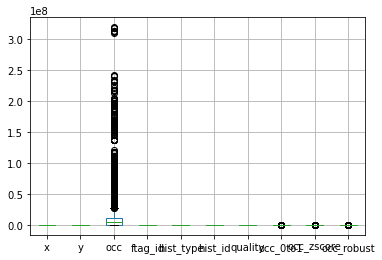

12 1


<IPython.core.display.Javascript object>

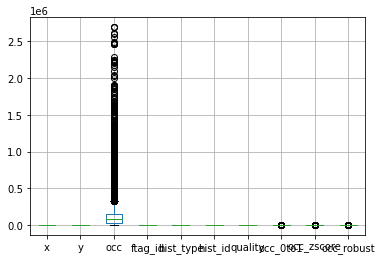

12 2


<IPython.core.display.Javascript object>

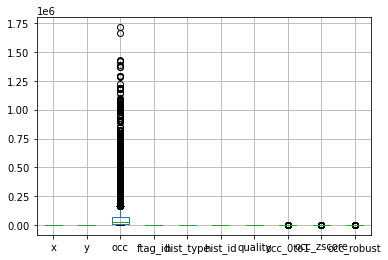

12 3


<IPython.core.display.Javascript object>

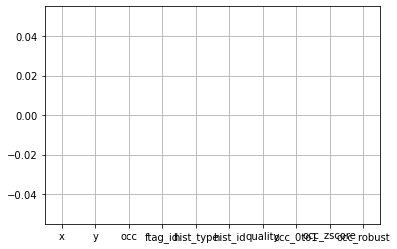

12 4


<IPython.core.display.Javascript object>

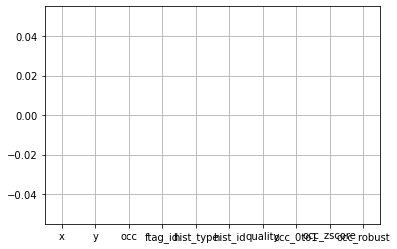

12 5


<IPython.core.display.Javascript object>

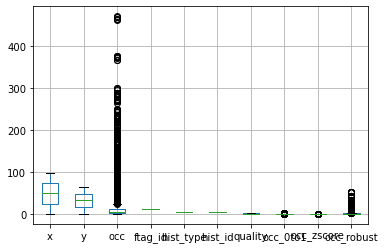

12 6


<IPython.core.display.Javascript object>

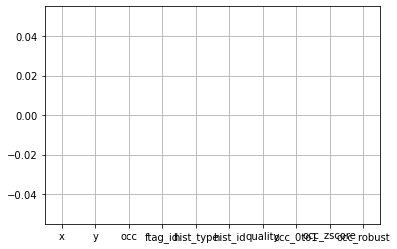

12 7


<IPython.core.display.Javascript object>

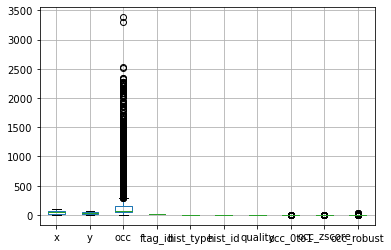

12 8


<IPython.core.display.Javascript object>

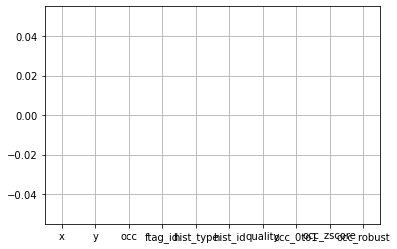

12 9


<IPython.core.display.Javascript object>

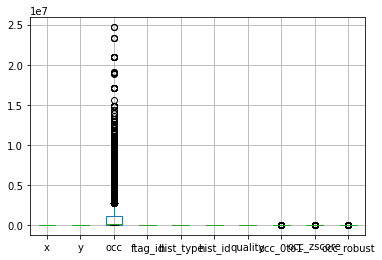

12 10


<IPython.core.display.Javascript object>

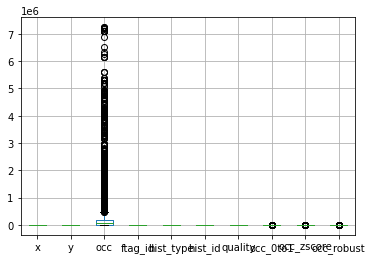

12 11


<IPython.core.display.Javascript object>

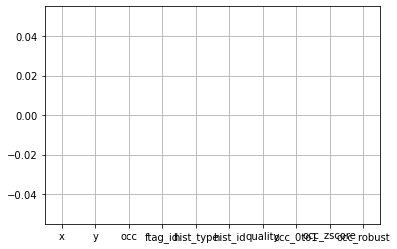

12 12


<IPython.core.display.Javascript object>

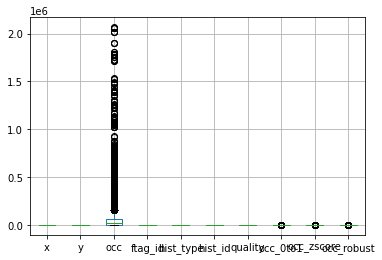

12 13


<IPython.core.display.Javascript object>

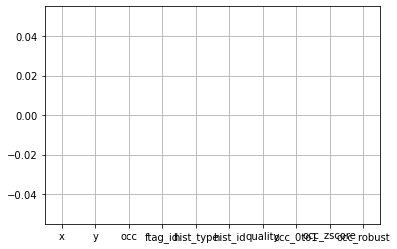

12 14


<IPython.core.display.Javascript object>

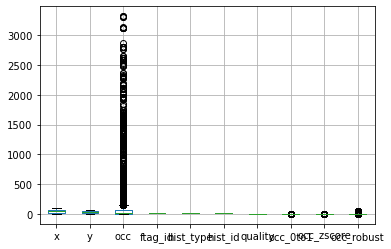

12 15


<IPython.core.display.Javascript object>

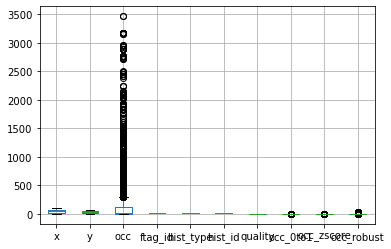

12 16


<IPython.core.display.Javascript object>

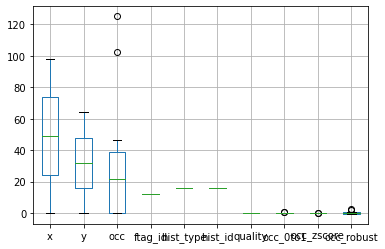

13 0


<IPython.core.display.Javascript object>

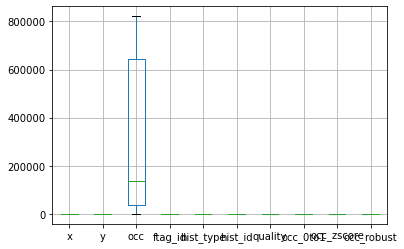

13 1


<IPython.core.display.Javascript object>

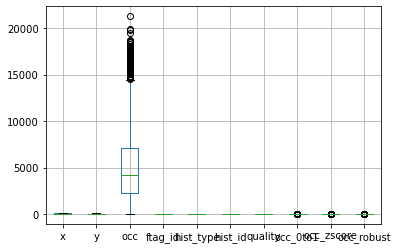

13 2


<IPython.core.display.Javascript object>

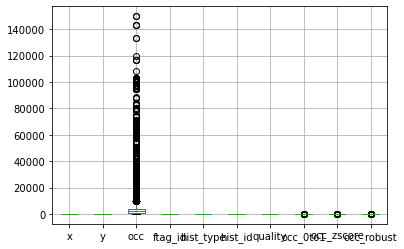

13 3


<IPython.core.display.Javascript object>

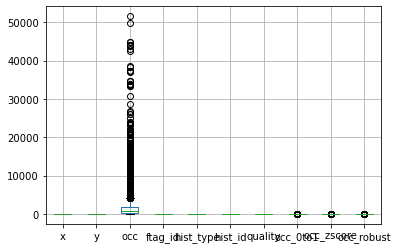

13 4


<IPython.core.display.Javascript object>

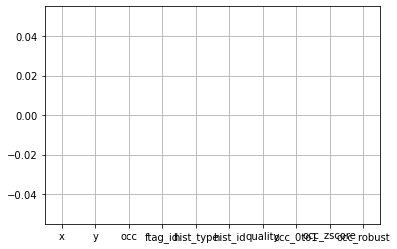

13 5


<IPython.core.display.Javascript object>

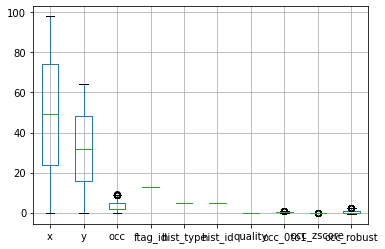

13 6


<IPython.core.display.Javascript object>

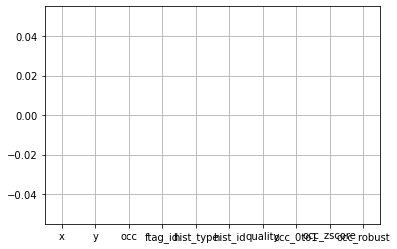

13 7


<IPython.core.display.Javascript object>

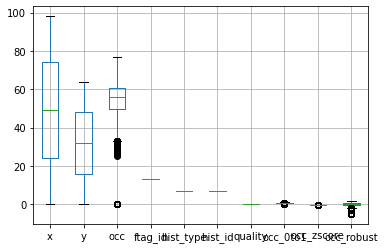

13 8


<IPython.core.display.Javascript object>

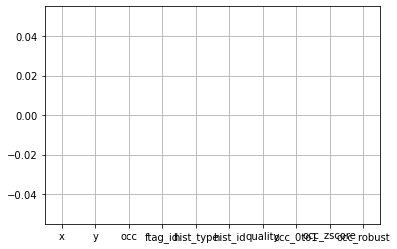

13 9


<IPython.core.display.Javascript object>

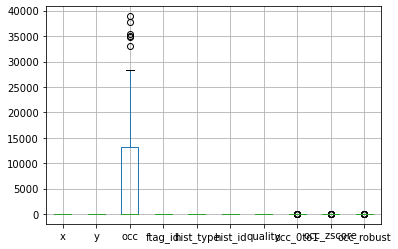

13 10


<IPython.core.display.Javascript object>

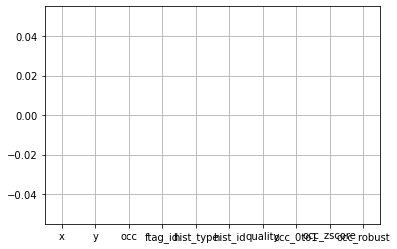

13 11


<IPython.core.display.Javascript object>

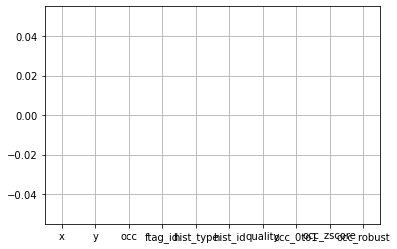

13 12


<IPython.core.display.Javascript object>

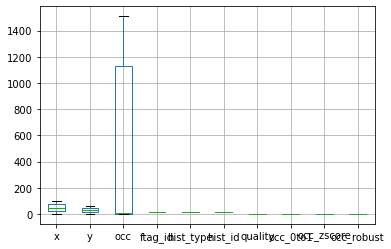

13 13


<IPython.core.display.Javascript object>

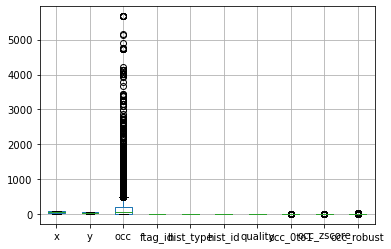

13 14


<IPython.core.display.Javascript object>

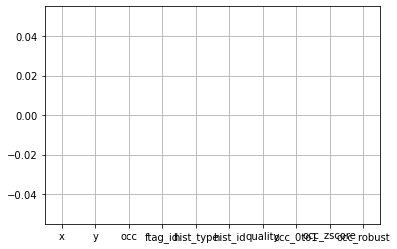

13 15


<IPython.core.display.Javascript object>

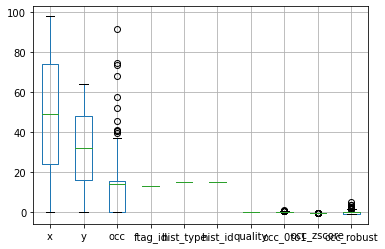

13 16


<IPython.core.display.Javascript object>

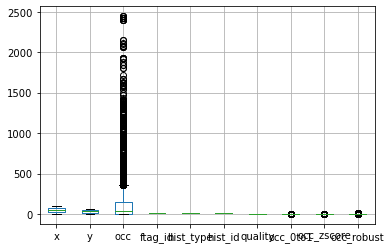

14 0
14 1


<IPython.core.display.Javascript object>

14 2


<IPython.core.display.Javascript object>

14 3


<IPython.core.display.Javascript object>

14 4


<IPython.core.display.Javascript object>

14 5


<IPython.core.display.Javascript object>

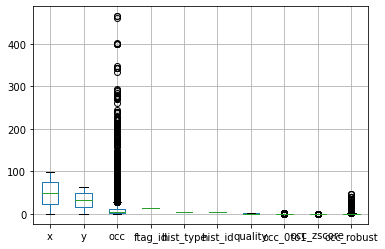

14 6
14 7


<IPython.core.display.Javascript object>

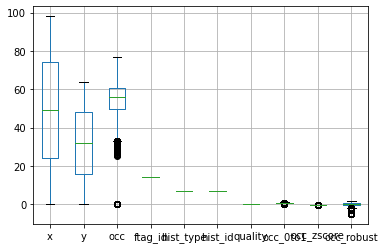

14 8


<IPython.core.display.Javascript object>

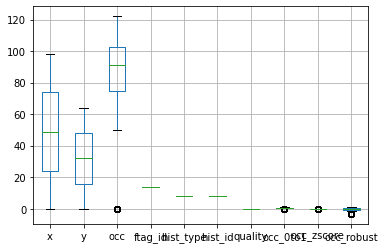

14 9


<IPython.core.display.Javascript object>

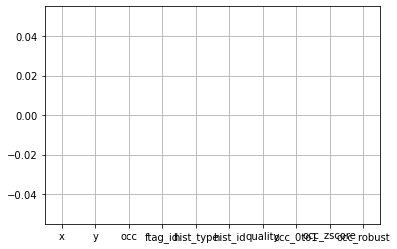

14 10


<IPython.core.display.Javascript object>

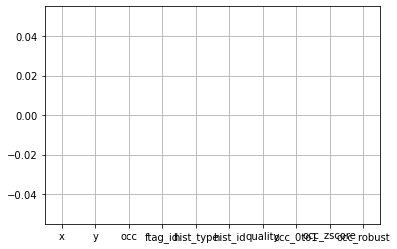

14 11


<IPython.core.display.Javascript object>

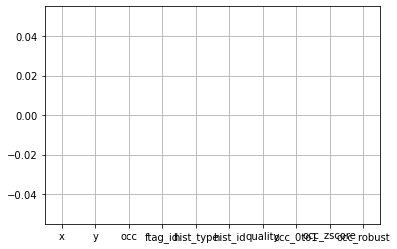

14 12


<IPython.core.display.Javascript object>

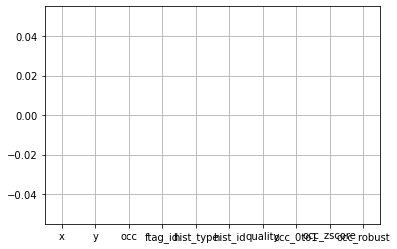

14 13


<IPython.core.display.Javascript object>

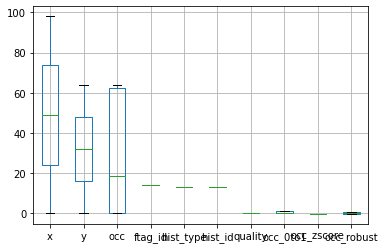

14 14


<IPython.core.display.Javascript object>

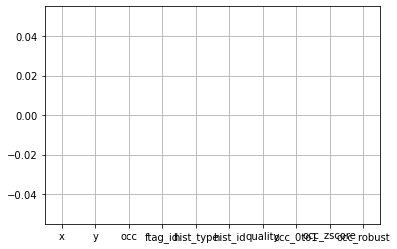

14 15


<IPython.core.display.Javascript object>

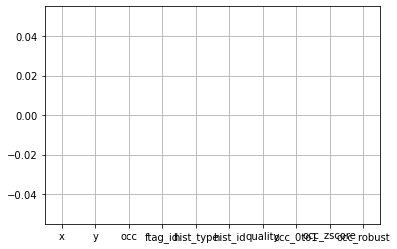

14 16


<IPython.core.display.Javascript object>

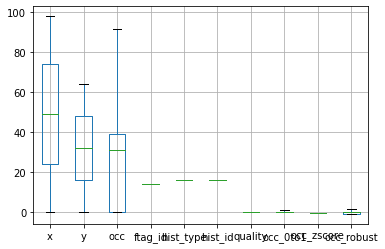

ValueError: zero-size array to reduction operation maximum which has no identity

In [12]:
for ftag in range(91):
    for hid in range(df[df['ftag_id']==ftag]['hist_id'].unique().max()):
        print(ftag,hid)
        try:
            tmp = df[df['ftag_id']==ftag]
            tmp2 = tmp[tmp['hist_id']==hid]
            tmp2.boxplot()
            plt.show()
        except:
            pass

In [16]:
tmp = tmp[tmp['hist_id']==tmp['hist_id'].unique()[0]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

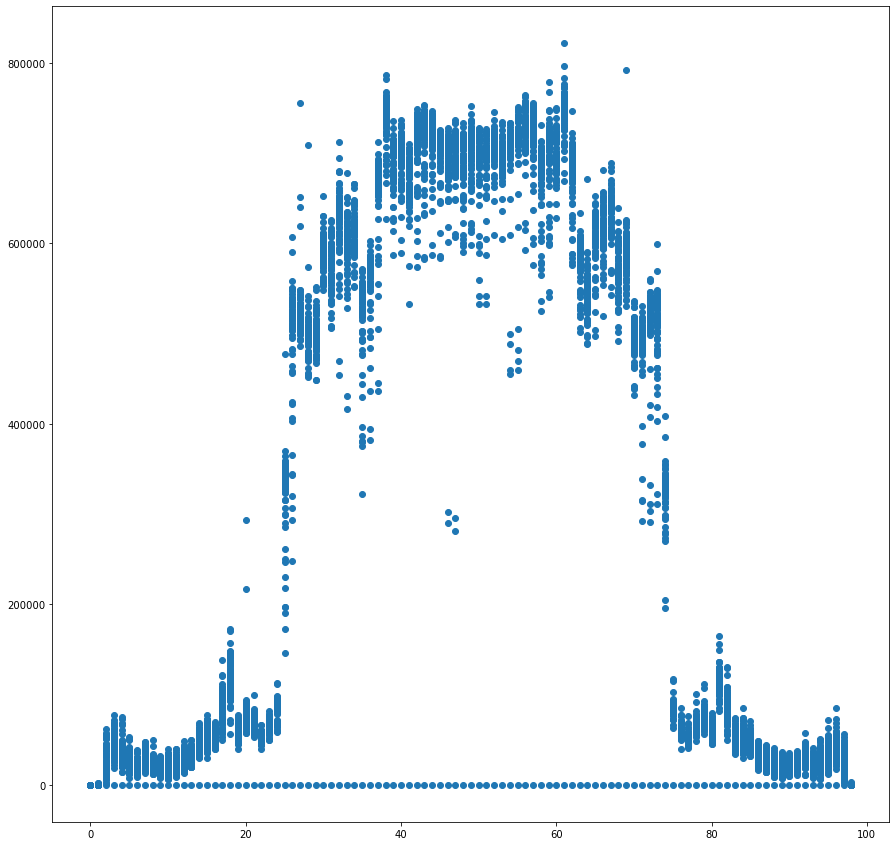

In [17]:
# All horizontal strips
plt.figure(figsize=(15,15))
plt.scatter(tmp['x'],tmp['occ'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

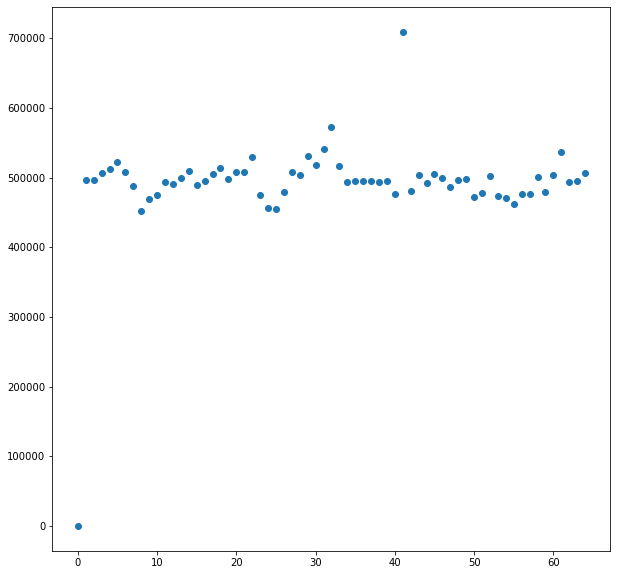

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(tmp[tmp['x']==28]['y'],tmp[tmp['x']==28]['occ'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

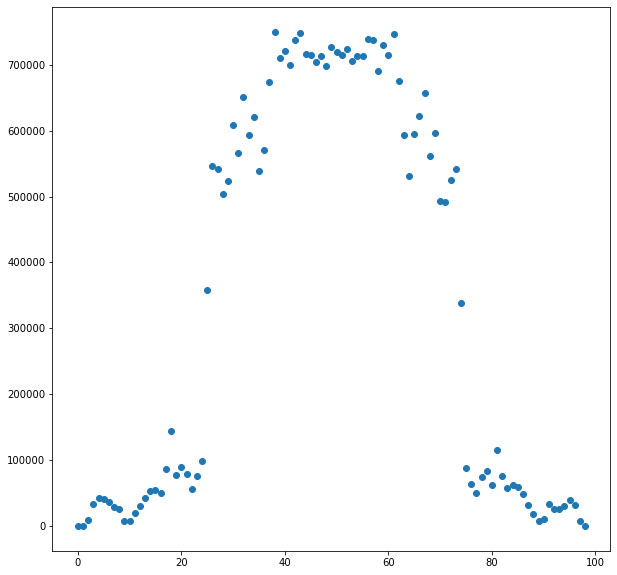

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(tmp[tmp['y']==28]['x'],tmp[tmp['y']==28]['occ'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

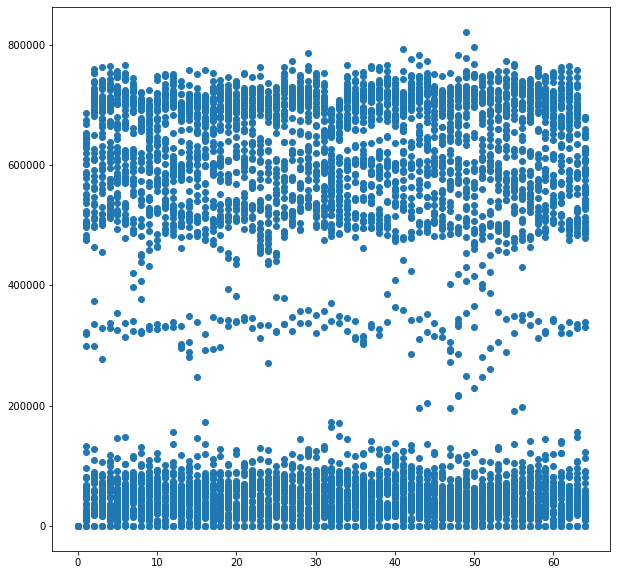

In [20]:
# All strips
plt.figure(figsize=(10,10))
plt.scatter(tmp['y'],tmp['occ'])

In [21]:
df['quality'].value_counts()

0    21501056
1     6092224
Name: quality, dtype: int64

In [22]:
df[df['quality']==1]

paths   x   y  \
2         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   2   
10        run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  10   
21        run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  21   
22        run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  22   
38        run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  38   
...                                                     ...  ..  ..   
27593186  run_360402/CaloMonitoring/ClusterMon/LArCluste...  97  36   
27593207  run_360402/CaloMonitoring/ClusterMon/LArCluste...  97  57   
27593215  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98   0   
27593241  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  26   
27593278  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  63   

                   occ  ftag_id  hist_type  hist_id  quality  occ_0to1  \
2          2454.000000        0          2        2        1  0.032756   
10        11568.000000        0          2        2        1  0.154411   
21         2455.000000        0          2        2        1  0.032770   
22        27192.000000        0          2        2        1  0.362962   
38         5500.000000        0          2        2        1  0.073415   
...                ...      ...        ...      ...      ...       ...   
27593186    155.806473       84         17      233        1  0.012851   
27593207     73.000000       84         17      233        1  0.006021   
27593215    183.806473       84         17      233        1  0.015161   
27593241     90.000000       84         17      233        1  0.007423   
27593278     78.000000       84         17      233        1  0.006434   

          occ_zscore  occ_robust  
2          -0.161290    0.021687  
10         -0.152336    1.770847  
21         -0.161289    0.021879  
22         -0.136987    4.769408  
38         -0.158297    0.606276  
...              ...         ...  
27593186   -0.090678    0.242540  
27593207   -0.090693    0.022894  
27593215   -0.090673    0.316811  
27593241   -0.090690    0.067987  
27593278   -0.090692    0.036157  

[6092224 rows x 11 columns]

In [24]:
tmp = df[df['ftag_id']==0]
tmp = tmp[tmp['hist_id']==tmp['hist_id'].unique()[0]]
tmp[tmp['quality']==1]

paths   x   y      occ  \
2     run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   2   2454.0   
10    run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  10  11568.0   
21    run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  21   2455.0   
22    run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  22  27192.0   
38    run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0  38   5500.0   
...                                                 ...  ..  ..      ...   
6253  run_363664/CaloMonitoring/ClusterMon/CaloCalTo...  96  13    104.0   
6309  run_363664/CaloMonitoring/ClusterMon/CaloCalTo...  97   4      8.0   
6338  run_363664/CaloMonitoring/ClusterMon/CaloCalTo...  97  33     32.0   
6364  run_363664/CaloMonitoring/ClusterMon/CaloCalTo...  97  59     39.0   
6374  run_363664/CaloMonitoring/ClusterMon/CaloCalTo...  98   4      1.0   

      ftag_id  hist_type  hist_id  quality  occ_0to1  occ_zscore  occ_robust  
2           0          2        2        1  0.032756   -0.161290    0.021687  
10          0          2        2        1  0.154411   -0.152336    1.770847  
21          0          2        2        1  0.032770   -0.161289    0.021879  
22          0          2        2        1  0.362962   -0.136987    4.769408  
38          0          2        2        1  0.073415   -0.158297    0.606276  
...       ...        ...      ...      ...       ...         ...         ...  
6253        0          2        2        1  0.001388   -0.163598   -0.429325  
6309        0          2        2        1  0.000107   -0.163693   -0.447750  
6338        0          2        2        1  0.000427   -0.163669   -0.443144  
6364        0          2        2        1  0.000521   -0.163662   -0.441800  
6374        0          2        2        1  0.000013   -0.163699   -0.449093  

[2944 rows x 11 columns]

<IPython.core.display.Javascript object>

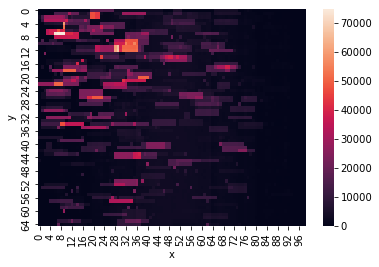

In [27]:
input_heatmap(df,0,2)

<hr>

# x_test_df

In [42]:
df2 = pd.read_csv('x_test_df2.csv', dtype={'x':'int8','y':'int8','ftag_id':'int8','occ':'float32','hist_type':'int8','hist_id':'int16','quality':'int8','occ_0to1':'float32','occ_zscore':'float32','occ_robust':'float32'})
df2

paths   x   y  \
0         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   0   
1         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   1   
2         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   2   
3         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   3   
4         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   4   
...                                                     ...  ..  ..   
13642195  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  60   
13642196  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  61   
13642197  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  62   
13642198  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  63   
13642199  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  64   

                occ  ftag_id  hist_type  hist_id  quality  occ_0to1  \
0         3872943.0        0          0        0        1  0.084320   
1         4551316.0        0          0        0        1  0.099089   
2               0.0        0          0        0        0  0.000000   
3         3610718.0        0          0        0        1  0.078611   
4               0.0        0          0        0        0  0.000000   
...             ...      ...        ...      ...      ...       ...   
13642195        0.0       84         15      231        0  0.000000   
13642196        0.0       84         15      231        0  0.000000   
13642197        0.0       84         15      231        0  0.000000   
13642198        0.0       84         15      231        0  0.000000   
13642199        0.0       84         15      231        0  0.000000   

          occ_zscore  occ_robust  
0           3.641077    1.564232  
1           4.307510    1.903885  
2          -0.163700   -0.374900  
3           3.383467    1.432940  
4          -0.163700   -0.374900  
...              ...         ...  
13642195   -0.090706   -0.920560  
13642196   -0.090706   -0.920560  
13642197   -0.090706   -0.920560  
13642198   -0.090706   -0.920560  
13642199   -0.090706   -0.920560  

[13642200 rows x 11 columns]

In [43]:
df2.shape

(13642200, 11)

In [47]:
len(df2['ftag_id'].unique())

83

In [44]:
df2.describe()

x             y           occ       ftag_id     hist_type  \
count  1.364220e+07  1.364220e+07  1.364220e+07  1.364220e+07  1.364220e+07   
mean   4.900000e+01  3.200000e+01  3.822672e+05  5.998821e+01  8.358019e+00   
std    2.857738e+01  1.876166e+01  5.180630e+06  2.250332e+01  5.120218e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.400000e+01  1.600000e+01  2.036056e+00  5.100000e+01  4.000000e+00   
50%    4.900000e+01  3.200000e+01  5.719989e+01  6.200000e+01  8.000000e+00   
75%    7.400000e+01  4.800000e+01  4.475000e+03  7.800000e+01  1.300000e+01   
max    9.800000e+01  6.400000e+01  1.076746e+09  9.000000e+01  1.700000e+01   

            hist_id       quality      occ_0to1    occ_zscore    occ_robust  
count  1.364220e+07  1.364220e+07  1.364220e+07  1.364220e+07  1.341889e+07  
mean   8.833066e+01  2.238887e-01  2.023601e-01  2.703672e-03           inf  
std    8.373380e+01  4.168484e-01  2.984676e-01  1.049589e+00           NaN  
min    0.000000e+00  0.000000e+00  0.000000e+00 -3.010843e-01 -1.987656e+01  
25%    1.900000e+01  0.000000e+00  1.100200e-03 -9.176925e-02 -1.855222e-01  
50%    6.300000e+01  0.000000e+00  2.381577e-02 -8.214516e-02  0.000000e+00  
75%    1.370000e+02  0.000000e+00  3.245271e-01 -7.429293e-02  6.216216e-01  
max    4.080000e+02  1.000000e+00  1.000000e+00  1.287677e+02           inf

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13642200 entries, 0 to 13642199
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   paths       object 
 1   x           int8   
 2   y           int8   
 3   occ         float32
 4   ftag_id     int8   
 5   hist_type   int8   
 6   hist_id     int16  
 7   quality     int8   
 8   occ_0to1    float32
 9   occ_zscore  float32
 10  occ_robust  float32
dtypes: float32(4), int16(1), int8(5), object(1)
memory usage: 403.3+ MB


In [46]:
# Count the total number of histograms
cnt = 0
for ftag in df2['ftag_id'].unique():
    for hid in df2[df2['ftag_id']==ftag]['hist_id'].unique():
        cnt+=1
cnt

2120

<hr>

# x_train_noanoms_df

In [39]:
df3 = pd.read_csv('x_train_noanom_df.csv', dtype={'x':'int8','y':'int8','ftag_id':'int8','occ':'float32','hist_type':'int8','hist_id':'int16','quality':'int8','occ_0to1':'float32','occ_zscore':'float32','occ_robust':'float32'})
display(df3)

display(df3.shape)

display(df3.describe())

display(df3.info())

# Count the total number of histograms
cnt = 0
for ftag in df3['ftag_id'].unique():
    for hid in df3[df3['ftag_id']==ftag]['hist_id'].unique():
        cnt+=1
display(cnt)

paths   x   y  occ  \
0         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   0  0.0   
1         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   1  0.0   
2         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   2  0.0   
3         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   3  0.0   
4         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   4  0.0   
...                                                     ...  ..  ..  ...   
27593275  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  60  0.0   
27593276  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  61  0.0   
27593277  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  62  0.0   
27593278  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  63  0.0   
27593279  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  64  0.0   

          ftag_id  hist_type  hist_id  occ_0to1  occ_zscore  occ_robust  \
0               0          0        0       0.0   -0.149630   -0.241575   
1               0          0        0       0.0   -0.149630   -0.241575   
2               0          0        0       0.0   -0.149630   -0.241575   
3               0          0        0       0.0   -0.149630   -0.241575   
4               0          0        0       0.0   -0.149630   -0.241575   
...           ...        ...      ...       ...         ...         ...   
27593275       84         16      232       0.0   -0.173805   -0.828277   
27593276       84         16      232       0.0   -0.173805   -0.828277   
27593277       84         16      232       0.0   -0.173805   -0.828277   
27593278       84         16      232       0.0   -0.173805   -0.828277   
27593279       84         16      232       0.0   -0.173805   -0.828277   

          quality  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
27593275        0  
27593276        0  
27593277        0  
27593278        0  
27593279        0  

[27593280 rows x 11 columns]

(27593280, 11)

x             y           occ       ftag_id     hist_type  \
count  2.759328e+07  2.759328e+07  2.759328e+07  2.759328e+07  2.759328e+07   
mean   4.900000e+01  3.200000e+01  9.089365e+04  6.003521e+01  8.479944e+00   
std    2.857738e+01  1.876166e+01  6.018854e+05  2.248246e+01  5.162117e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.400000e+01  1.600000e+01  0.000000e+00  5.100000e+01  4.000000e+00   
50%    4.900000e+01  3.200000e+01  3.077278e+01  6.200000e+01  8.000000e+00   
75%    7.400000e+01  4.800000e+01  1.374000e+03  7.800000e+01  1.300000e+01   
max    9.800000e+01  6.400000e+01  3.601901e+07  9.000000e+01  1.700000e+01   

            hist_id      occ_0to1    occ_zscore    occ_robust     quality  
count  2.759328e+07  2.759328e+07  2.751606e+07  2.668200e+07  27593280.0  
mean   8.903078e+01  3.565369e-01 -3.524022e-03           inf         0.0  
std    8.451417e+01  3.466370e-01  9.955680e-01           NaN         0.0  
min    0.000000e+00  0.000000e+00 -2.433439e-01 -1.878343e+01         0.0  
25%    2.000000e+01  0.000000e+00 -1.722878e-01 -2.973176e-01         0.0  
50%    6.300000e+01  2.551958e-01 -1.600827e-01  0.000000e+00         0.0  
75%    1.360000e+02  6.771546e-01 -1.452002e-01  5.590974e-01         0.0  
max    4.130000e+02  1.000000e+00  3.557204e+01           inf         0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27593280 entries, 0 to 27593279
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   paths       object 
 1   x           int8   
 2   y           int8   
 3   occ         float32
 4   ftag_id     int8   
 5   hist_type   int8   
 6   hist_id     int16  
 7   occ_0to1    float32
 8   occ_zscore  float32
 9   occ_robust  float32
 10  quality     int8   
dtypes: float32(4), int16(1), int8(5), object(1)
memory usage: 815.8+ MB


None

4288

<hr>

# x_test_noanoms_df

In [38]:
df4 = pd.read_csv('x_test_noanom_df.csv', dtype={'x':'int8','y':'int8','ftag_id':'int8','occ':'float32','hist_type':'int8','hist_id':'int16','quality':'int8','occ_0to1':'float32','occ_zscore':'float32','occ_robust':'float32'})
display(df4)

display(df4.shape)

display(df4.describe())

display(df4.info())

# Count the total number of histograms
cnt = 0
for ftag in df4['ftag_id'].unique():
    for hid in df4[df4['ftag_id']==ftag]['hist_id'].unique():
        cnt+=1
display(cnt)

paths   x   y  occ  \
0         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   0  0.0   
1         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   1  0.0   
2         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   2  0.0   
3         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   3  0.0   
4         run_363664/CaloMonitoring/ClusterMon/CaloCalTo...   0   4  0.0   
...                                                     ...  ..  ..  ...   
13642195  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  60  0.0   
13642196  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  61  0.0   
13642197  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  62  0.0   
13642198  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  63  0.0   
13642199  run_360402/CaloMonitoring/ClusterMon/LArCluste...  98  64  0.0   

          ftag_id  hist_type  hist_id  occ_0to1  occ_zscore  occ_robust  \
0               0          1        1       0.0   -0.149630   -0.971850   
1               0          1        1       0.0   -0.149630   -0.971850   
2               0          1        1       0.0   -0.149630   -0.971850   
3               0          1        1       0.0   -0.149630   -0.971850   
4               0          1        1       0.0   -0.149630   -0.971850   
...           ...        ...      ...       ...         ...         ...   
13642195       84         17      233       0.0   -0.173805   -0.889612   
13642196       84         17      233       0.0   -0.173805   -0.889612   
13642197       84         17      233       0.0   -0.173805   -0.889612   
13642198       84         17      233       0.0   -0.173805   -0.889612   
13642199       84         17      233       0.0   -0.173805   -0.889612   

          quality  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
13642195        0  
13642196        0  
13642197        0  
13642198        0  
13642199        0  

[13642200 rows x 11 columns]

(13642200, 11)

x             y           occ       ftag_id     hist_type  \
count  1.364220e+07  1.364220e+07  1.364220e+07  1.364220e+07  1.364220e+07   
mean   4.900000e+01  3.200000e+01  9.166473e+04  5.998821e+01  8.540566e+00   
std    2.857738e+01  1.876166e+01  5.740309e+05  2.250332e+01  5.240108e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.400000e+01  1.600000e+01  0.000000e+00  5.100000e+01  4.000000e+00   
50%    4.900000e+01  3.200000e+01  3.081940e+01  6.200000e+01  9.000000e+00   
75%    7.400000e+01  4.800000e+01  1.556000e+03  7.800000e+01  1.300000e+01   
max    9.800000e+01  6.400000e+01  1.529834e+07  9.000000e+01  1.700000e+01   

            hist_id      occ_0to1    occ_zscore    occ_robust     quality  
count  1.364220e+07  1.364220e+07  1.360359e+07  1.321195e+07  13642200.0  
mean   8.830943e+01  3.520395e-01  7.128087e-03           inf         0.0  
std    8.411951e+01  3.443741e-01  1.008864e+00           NaN         0.0  
min    0.000000e+00  0.000000e+00 -2.433439e-01 -2.174239e+01         0.0  
25%    1.900000e+01  0.000000e+00 -1.736556e-01 -2.987022e-01         0.0  
50%    6.400000e+01  2.492244e-01 -1.600827e-01  0.000000e+00         0.0  
75%    1.340000e+02  6.658382e-01 -1.441812e-01  5.577611e-01         0.0  
max    4.120000e+02  1.000000e+00  3.569491e+01           inf         0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13642200 entries, 0 to 13642199
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   paths       object 
 1   x           int8   
 2   y           int8   
 3   occ         float32
 4   ftag_id     int8   
 5   hist_type   int8   
 6   hist_id     int16  
 7   occ_0to1    float32
 8   occ_zscore  float32
 9   occ_robust  float32
 10  quality     int8   
dtypes: float32(4), int16(1), int8(5), object(1)
memory usage: 403.3+ MB


None

2120

In [40]:
4288+2120

6408